## Business Problem:
#### CredX is a leading credit card provider that gets thousands of credit card applications every year. But in the past few years, it has experienced an increase in credit loss. The CEO believes that the best strategy to mitigate credit risk is to ‘acquire the right customers’.

## Objective:
#### Our objective is to help CredX in identifying the right customers using predictive models. We need to use past data of the bank’s applicants to determine the factors affecting credit risk and create strategies to mitigate the acquisition risk and assess the financial benefit of your project.

##### There are two data sets in this project: demographic and credit bureau data.  

 - Demographic/application data: This is obtained from the information provided by the applicants at the time of credit card application. It contains customer-level information on age, gender, income, marital status, etc.
 - Credit bureau: This is taken from the credit bureau and contains variables such as 'number of times 30 DPD or worse in last 3/6/12 months', 'outstanding balance', 'number of trades', etc.

### Tasks needs to perform to achieve the obective:

 - Create a master file with all the relevant variables and perform the necessary data quality checks and cleaning. In credit risk analytics, the weight of evidence (WOE) (and, equivalently, information value analysis) is often used to identify the important variables. Apart from assessing variable importance, WOE is also used to impute missing values from the data. You’ll note that some variables contain a significant number of missing values. Replace the actual values of all the variables by the corresponding WOE value and store the data in a separate file (e.g. woe_data) for further analysis.   

### Model-building

#### The two types of models you need to build are as follows:

 - Demographic data model: Build a model to predict the likelihood of default using only the demographic data. This will give you a good idea about the predictive power of the application data. Obviously, the final model will use the credit bureau data as well, though this model is an important part of understanding the predictive power of application data.

 - Model using both demographic and credit bureau data: Build a model to predict default using both the data sets. You may choose any type of model, though it is recommended to start with a logistic regression model first. Further, you can choose any type of model.

 

#### Model evaluation
 - Evaluate the models using relevant metrics and report the results. As part of model validation, predict the likelihood of default for the rejected candidates and assess whether the results correspond to your expectations. 

 

#### Application scorecard
 - Build an application scorecard with the good to bad odds of 10 to 1 at a score of 400 doubling every 20 points.

 - For the rejected population, calculate the application scores and assess the results. Compare the scores of the rejected population with the approved candidates and comment on the observations.

 - On the basis of the scorecard, identify the cut-off score below which you would not grant credit cards to applicants.
 

### Assessing the financial benefit of your project
- You need to assess and explain the potential financial benefit of your project to the bank's management. From a P&L perspective, identify the metrics you are trying to optimise, explain (in simple terms) how the analysis and the model work, and share the results of the model. Finally, assess the financial benefit of the model and report the following:

 - The implications of using the model for auto-approval or rejection, i.e., how many applicants on an average would the model automatically approve or reject

 - The potential credit loss avoided with the help of the model

 - Assumptions based on which the model was built 


 - Make appropriate assumptions about the numbers wherever needed (e.g., the potential average credit loss per default, etc.). Present your analysis and recommendations in a PowerPoint presentation.  
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Import the Demographic Data

In [2]:
demographic = pd.read_csv("Demographic data.csv")
demographic.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [3]:
# Let's take a look at the shape of data.
demographic.shape

(71295, 12)

In [4]:
# Let's take a look at the numeric variables
demographic.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [5]:
# Let's take a look at column names
print("Columns Name:",demographic.columns)

Columns Name: Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')


In [6]:
# Here Coluumn "Profession " seems to have an extra space. Let's remove that extra space.
demographic = demographic.rename(columns = {"Profession " : "Profession"})

# Let's rename 'Marital Status (at the time of application)' to Marital Status.
demographic = demographic.rename(columns = {"Marital Status (at the time of application)" : "Marital Status"})

print("\nColumns Names after renaming:",demographic.columns)


Columns Names after renaming: Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents',
       'Income', 'Education', 'Profession', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')


In [7]:
# checking number of unique values for all the variables
print("No. of unique values (Column wise):\n",demographic.nunique())

No. of unique values (Column wise):
 Application ID                       71292
Age                                     53
Gender                                   2
Marital Status                           2
No of dependents                         5
Income                                  63
Education                                5
Profession                               3
Type of residence                        5
No of months in current residence      121
No of months in current company         83
Performance Tag                          2
dtype: int64


In [8]:
# Check if there are any duplicate entry (using application ID)
dup_app_id = demographic["Application ID"]
dup_customers = demographic[dup_app_id.isin(dup_app_id[dup_app_id.duplicated()])]
dup_customers.sort_values(by='Application ID')

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
5243,653287861,26,M,Married,3.0,25.0,Bachelor,SAL,Rented,112,58,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
48602,671989187,27,M,Married,2.0,35.0,Professional,SAL,Living with Parents,108,7,0.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0
24386,765011468,57,M,Single,4.0,4.5,Bachelor,SAL,Company provided,6,56,0.0
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0


In [9]:
# Even though application ID is same, records are totally different.
# We will drop 2nd record with same application ID, assuming that they are invalid entries.
demographic.drop_duplicates("Application ID",inplace = True)

#check the shape of the dataset:
print ("Shape of the dataset after dropping duplicates values:",demographic.shape)

Shape of the dataset after dropping duplicates values: (71292, 12)


#### Null and Invalid Values

In [10]:
# Check the column-wise info of Data Set
demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71294
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Application ID                     71292 non-null  int64  
 1   Age                                71292 non-null  int64  
 2   Gender                             71290 non-null  object 
 3   Marital Status                     71286 non-null  object 
 4   No of dependents                   71289 non-null  float64
 5   Income                             71292 non-null  float64
 6   Education                          71173 non-null  object 
 7   Profession                         71278 non-null  object 
 8   Type of residence                  71284 non-null  object 
 9   No of months in current residence  71292 non-null  int64  
 10  No of months in current company    71292 non-null  int64  
 11  Performance Tag                    69867 non-null  flo

##### Here we can see that some columns have null values. Let's explore null values in detail.

In [11]:
demographic.isnull().sum().sort_values(ascending = False)

Performance Tag                      1425
Education                             119
Profession                             14
Type of residence                       8
Marital Status                          6
No of dependents                        3
Gender                                  2
No of months in current company         0
No of months in current residence       0
Income                                  0
Age                                     0
Application ID                          0
dtype: int64

In [12]:
# Let's take a look at the % of null values.
(round(100*(demographic.isnull().sum()/len(demographic.index)), 2)).sort_values(ascending = False)

Performance Tag                      2.00
Education                            0.17
Profession                           0.02
Type of residence                    0.01
Marital Status                       0.01
No of months in current company      0.00
No of months in current residence    0.00
Income                               0.00
No of dependents                     0.00
Gender                               0.00
Age                                  0.00
Application ID                       0.00
dtype: float64

## Data Preparation & EDA on Demographic Data Set

In [13]:
# To treat the missing/null/invalid values let's first take a look at unique values of all colmns(Except Applicaion ID)
cols = demographic.drop("Application ID",axis = 1)

print('\nUnique values - column wise:')
for i in cols:
    print(i,demographic[i].unique(),'\n')


Unique values - column wise:
Age [48 31 32 43 35 20 42 34 30 22 37 41 38 33 45 51 36 29 40 19 25 28 50 27
 26 49 47 39 17 44 23 46 52 53 24 18 15 21 16 64 56 55 60 59 54 58 62 65
 61 57 63  0 -3] 

Gender ['F' 'M' nan] 

Marital Status ['Married' 'Single' nan] 

No of dependents [ 2.  4.  1.  5.  3. nan] 

Income [40.  55.  46.  53.  44.  39.  49.  48.  38.  43.  51.  54.  50.  28.
 52.  27.  37.  36.  42.  32.  24.  25.  47.  31.  33.  35.  26.  34.
 41.  45.  13.  19.  29.  18.   7.  30.  23.  21.  14.   2.  22.   3.
  6.  15.  16.  20.  11.  17.  12.   5.   4.  10.   9.  -0.5  8.   1.
  0.   4.5 60.  57.  59.  58.  56. ] 

Education ['Bachelor' 'Professional' 'Masters' 'Phd' 'Others' nan] 

Profession ['SAL' 'SE_PROF' 'SE' nan] 

Type of residence ['Rented' nan 'Owned' 'Others' 'Living with Parents' 'Company provided'] 

No of months in current residence [113 112 104  94 116 108 115 111  90  83 106  81 100 107  96  92 103  82
  97  80  77  76  86  54  93  98  64  58  91  84  71 101

 - Variable Age have some invalid data (0 ,-3 and values less than 18)
 
 - Variables Gender/Marital Status/No. Of dependents/Education/Profession/Type of residence/Performance Tag have some null values
 
 - Variable Income has a negative value

Lets treat them one by one

In [14]:
# We assume that credit cards are issued to only those who have attained age 18
# So let's replace age less than 18 to 18
demographic.loc[demographic.Age<18,'Age'] = 18
demographic.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129200e+04,71292.000000,71289.000000,71292.000000,71292.000000,71292.000000,69867.000000
mean,4.989518e+08,44.949251,2.865126,27.195758,34.563570,33.957976,0.042180
std,2.885936e+08,9.917618,1.382312,15.514524,36.760345,20.410377,0.201001
min,1.004500e+05,18.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483706e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975655e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495782e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


Describe Gender: count     71290
unique        2
top           M
freq      54453
Name: Gender, dtype: object

No. of Null Values: 2


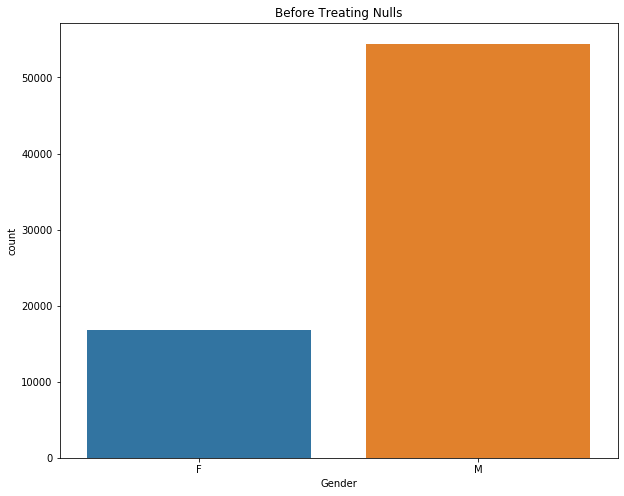

In [15]:
# Now let's move to the Gender Variable
print("Describe Gender:",demographic["Gender"].describe())

fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Gender"])
plt.title("Before Treating Nulls")

print("\nNo. of Null Values:",demographic["Gender"].isnull().sum())

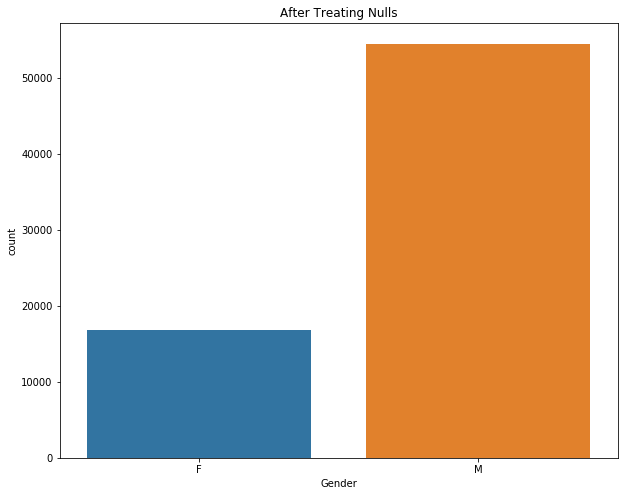

Describe Gender after treating null values: count     71292
unique        2
top           M
freq      54455
Name: Gender, dtype: object

No. of Null Values: 0


In [16]:
# out of 71290 entries, 54453 are Male, which is approx 76% of the total entries
# lets imput null values with "M"
demographic["Gender"] = demographic["Gender"].replace(np.nan,"M")

# plot after treating null values
fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Gender"])
plt.title("After Treating Nulls")
plt.show()

print("Describe Gender after treating null values:",demographic["Gender"].describe())

print("\nNo. of Null Values:",demographic["Gender"].isnull().sum())

count       71286
unique          2
top       Married
freq        60727
Name: Marital Status, dtype: object

No. of Null Values: 6


Text(0.5, 1.0, 'Before Treating Nulls')

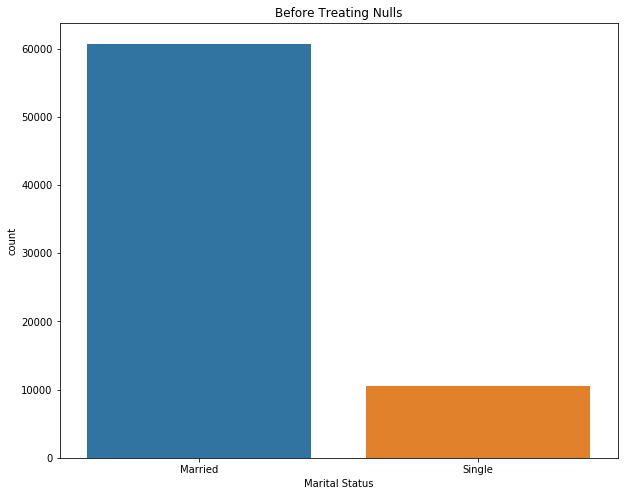

In [17]:
# Now let's move to the Marital Status
print(demographic["Marital Status"].describe())

print("\nNo. of Null Values:",demographic["Marital Status"].isnull().sum())

fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Marital Status"])
plt.title("Before Treating Nulls")

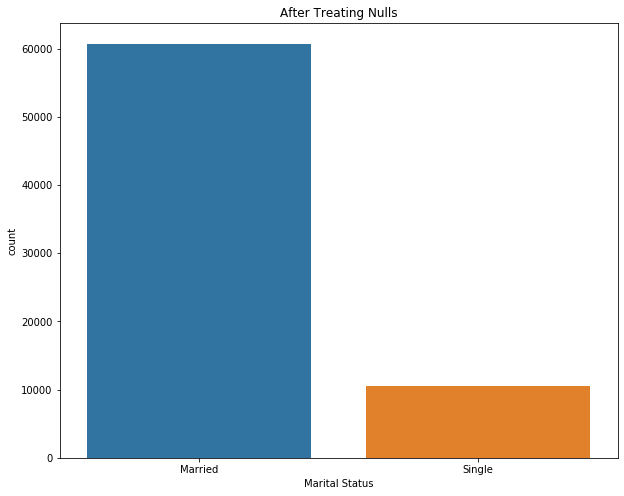

count       71292
unique          2
top       Married
freq        60733
Name: Marital Status, dtype: object

No. of Null Values: 0


In [18]:
# out of 71286 entries, 60727 are Married, lets impute null values with "Married"
demographic["Marital Status"] = demographic["Marital Status"].replace(np.nan,"Married")

# plot after treating null values
fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Marital Status"])
plt.title("After Treating Nulls")
plt.show()

print(demographic["Marital Status"].describe())

print("\nNo. of Null Values:",demographic["Marital Status"].isnull().sum())

count    71289.000000
mean         2.865126
std          1.382312
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: No of dependents, dtype: float64

No. of Null Values: 3


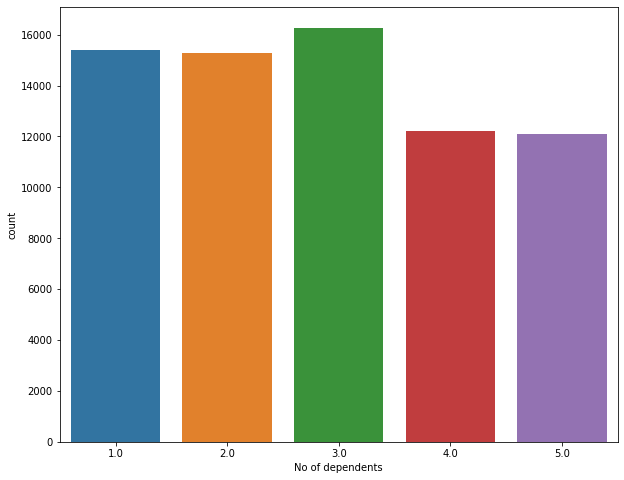

In [19]:
# Now let's move to the No of dependents Variable
print(demographic["No of dependents"].describe())

print("\nNo. of Null Values:",demographic["No of dependents"].isnull().sum())

fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["No of dependents"])

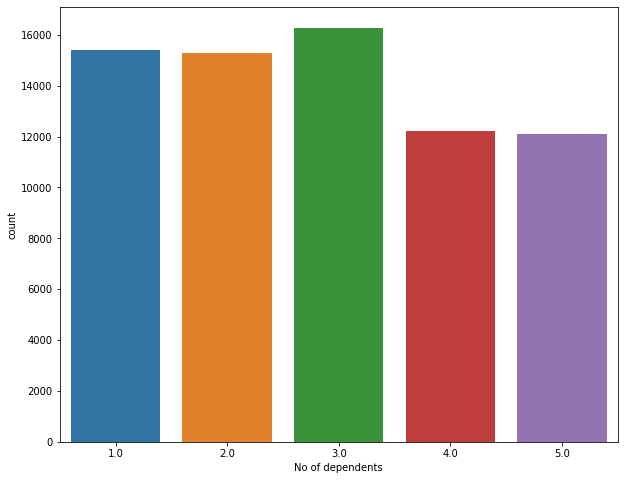


No. of Null Values: 0


In [20]:
# lets impute null values with median
demographic["No of dependents"] = demographic["No of dependents"].replace(np.nan,demographic["No of dependents"].median())

# plot after treating null values
fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["No of dependents"])
plt.show()

print("\nNo. of Null Values:",demographic["No of dependents"].isnull().sum())

In [21]:
# Income
print(demographic["Income"].describe())

count    71292.000000
mean        27.195758
std         15.514524
min         -0.500000
25%         14.000000
50%         27.000000
75%         40.000000
max         60.000000
Name: Income, dtype: float64


In [22]:
# lets impute negatvie values with median
demographic["Income"][demographic["Income"]<0] = demographic["Income"].median()

print(demographic["Income"].describe())

count    71292.000000
mean        27.227003
std         15.486382
min          0.000000
25%         14.000000
50%         27.000000
75%         40.000000
max         60.000000
Name: Income, dtype: float64


count            71173
unique               5
top       Professional
freq             24837
Name: Education, dtype: object

No. of Null Values: 119


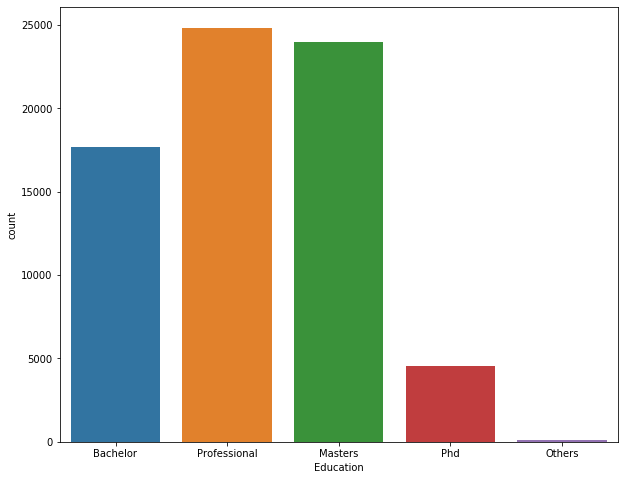

In [23]:
# Now let's take a look at Education
print(demographic["Education"].describe())

print("\nNo. of Null Values:",demographic["Education"].isnull().sum())

fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Education"])

In [24]:
# out of 71173 entries, max is 24837, which  belongs to "Professional", Which can't be used replace null values directly

# lets check the count of each value for Education
print(demographic["Education"].value_counts())


Professional    24837
Masters         23970
Bachelor        17697
Phd              4548
Others            121
Name: Education, dtype: int64


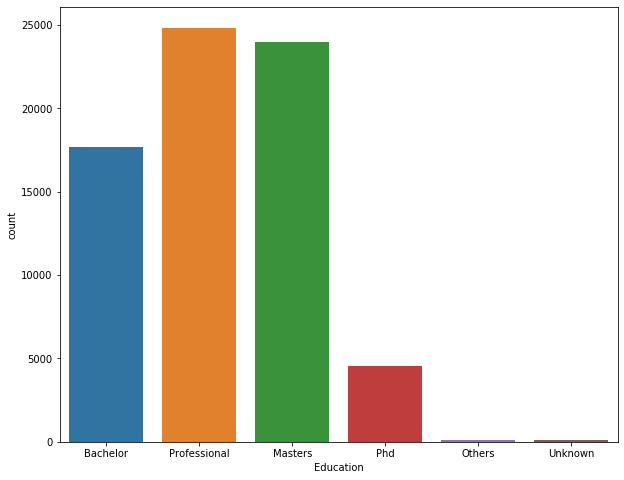

In [25]:
# since the frequency some values for the education is very close, we will replace null values with "Unknown"
demographic["Education"] = demographic["Education"].replace(np.nan,"Unknown")

# plot after treating null values
fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Education"])
plt.show()

count     71278
unique        3
top         SAL
freq      40438
Name: Profession, dtype: object

No. of Null Values: 14


Text(0.5, 1.0, 'Before Treating Nulls')

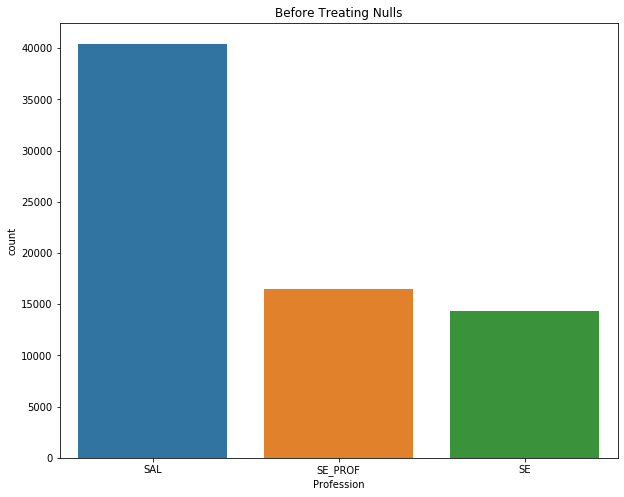

In [26]:
# Now let's check the Profession
print(demographic["Profession"].describe())

print("\nNo. of Null Values:",demographic["Profession"].isnull().sum())

fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Profession"])
plt.title("Before Treating Nulls")


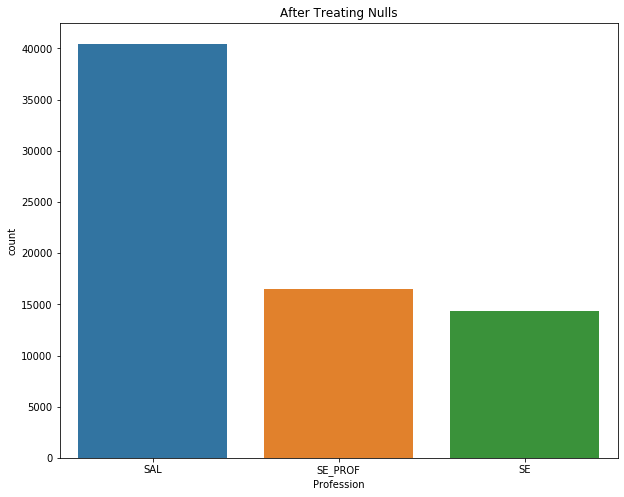

In [27]:
# out of 71278 entries, more than 40000 entries belongs to "SAL",lets imput null values with "SAL"

demographic["Profession"] = demographic["Profession"].replace(np.nan,"SAL")

# plot after treating null values
fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Profession"])
plt.title("After Treating Nulls")
plt.show()


count      71284
unique         5
top       Rented
freq       53394
Name: Type of residence, dtype: object

No. of Null Values: 8


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

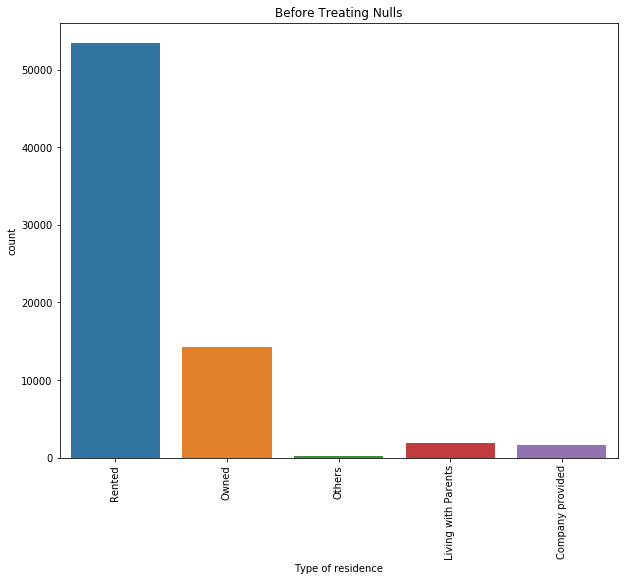

In [28]:
# Now let's check the Residence:
print(demographic["Type of residence"].describe())

print("\nNo. of Null Values:",demographic["Type of residence"].isnull().sum())

fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Type of residence"])
plt.title("Before Treating Nulls")
xticks(rotation = 90)

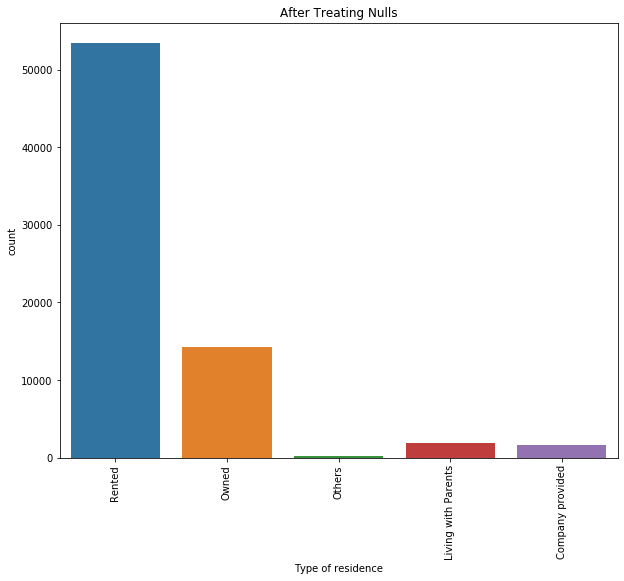

In [29]:
# out of 71278 entries, more than 50000 entries belongs to "Rented",lets imput null values with "Rented"

demographic["Type of residence"] = demographic["Type of residence"].replace(np.nan,"Rented")

# plot after treating null values
fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Type of residence"])
plt.title("After Treating Nulls")
xticks(rotation = 90)
plt.show()


count    69867.000000
mean         0.042180
std          0.201001
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Performance Tag, dtype: float64

No. of Null Values: 1425


(array([0, 1]), <a list of 2 Text xticklabel objects>)

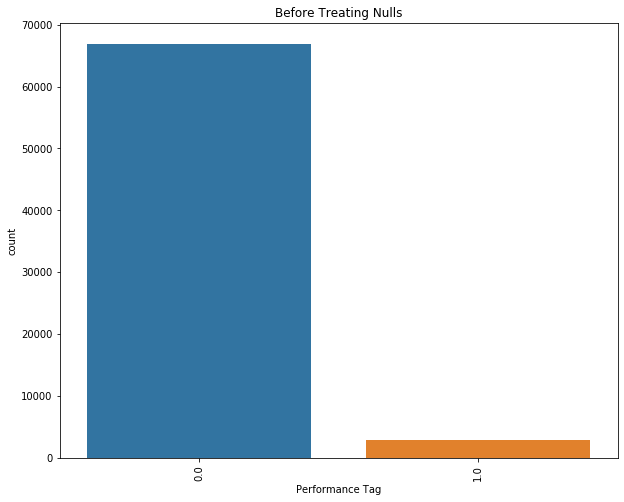

In [30]:
print(demographic["Performance Tag"].describe())

print("\nNo. of Null Values:",demographic["Performance Tag"].isnull().sum())

fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Performance Tag"])
plt.title("Before Treating Nulls")
xticks(rotation = 90)

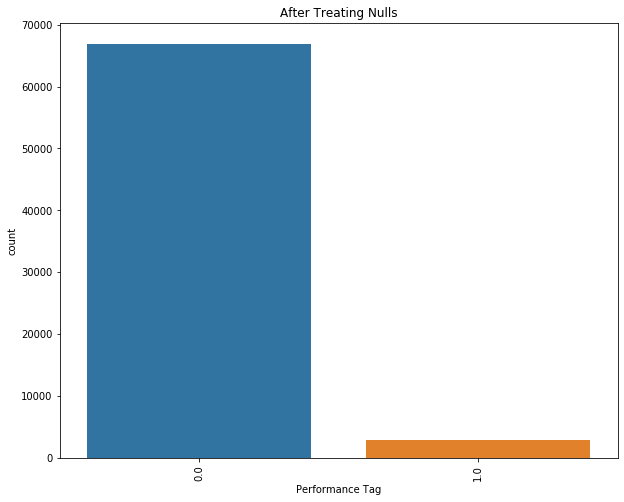

In [31]:
# there are 1425 null values for performance tag, a null value for this field means credit card was never used
# these records belongs to rejected applicants, lets remove them from demographic dataset and also save them in a seperate
# dataset for later use
rejected_demo = demographic[demographic["Performance Tag"].isnull()]
demographic = demographic[~demographic["Performance Tag"].isnull()]

# plot after treating null values
fig = plt.figure(figsize = (10,8))
sns.countplot(demographic["Performance Tag"])
plt.title("After Treating Nulls")
xticks(rotation = 90)
plt.show()

In [32]:
# We have treated all null/incorrect records. Let's check if there are still some null values in the data set.
print(demographic.isnull().sum().sort_values(ascending = False))

Performance Tag                      0
No of months in current company      0
No of months in current residence    0
Type of residence                    0
Profession                           0
Education                            0
Income                               0
No of dependents                     0
Marital Status                       0
Gender                               0
Age                                  0
Application ID                       0
dtype: int64


In [33]:
# There are no null values in the Date set. Let's check the Shape of data set.
print ("\ndimension of the cleaned dataset:",demographic.shape)


dimension of the cleaned dataset: (69867, 12)


In [34]:
#lets display head of the dataset
demographic.head()

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


0.0    66920
1.0     2947
Name: Performance Tag, dtype: int64


Text(0, 0.5, 'Frequency')

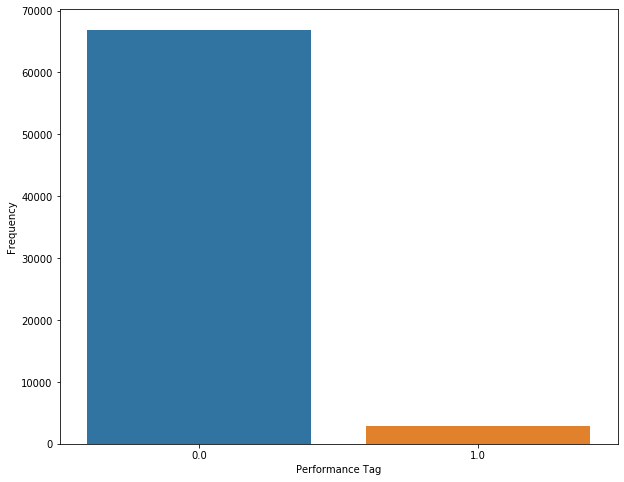

In [35]:
# Let's create a copy of the demographic dataset
demographic_eda = pd.DataFrame(demographic).copy()

# Check the count of different values for performance tag
print(demographic_eda["Performance Tag"].value_counts())

fig = plt.figure(figsize = (10,8))
sns.countplot(demographic_eda["Performance Tag"])
plt.ylabel('Frequency')   

In [36]:
# Here we can see that data set is highly imbalanced as majority of the customers have a performance tag of 0.
# % of good and bad customers in the dataset

print("Bad Customers",(demographic_eda['Performance Tag'].sum()/demographic_eda['Performance Tag'].count())*100)

Bad Customers 4.218014227031359


In [37]:
#seperating numerical and categorical data 

print("Total no. of columns:",len(demographic_eda.columns))

# numerical columns
num_cols =  demographic_eda.select_dtypes(include=[np.number]).columns.tolist()
print("\nNo. of numeric variable:",len(num_cols))

# categorical columns
cat_cols = list(set(demographic_eda.columns) - set(num_cols))
print("\nNo. of categorical variable:",len(cat_cols))

print("\nCategorical variables:",cat_cols)
print("\nNumeric variables:",num_cols)

Total no. of columns: 12

No. of numeric variable: 7

No. of categorical variable: 5

Categorical variables: ['Gender', 'Marital Status', 'Profession', 'Education', 'Type of residence']

Numeric variables: ['Application ID', 'Age', 'No of dependents', 'Income', 'No of months in current residence', 'No of months in current company', 'Performance Tag']


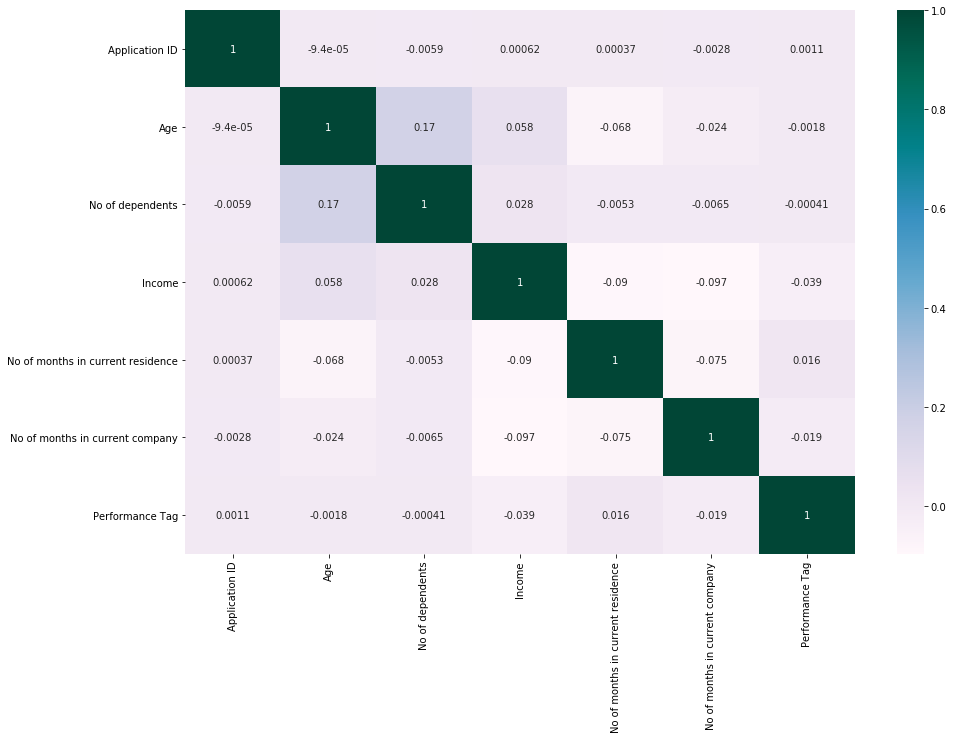

In [38]:
#Correlations between numerical variables
plt.figure(figsize = (15, 10))
sns.heatmap(demographic_eda[num_cols].corr(), annot = True, cmap="PuBuGn")
plt.show()

 - Here we can see that Target variable, Performance Tag is not much dependant with any numerical data

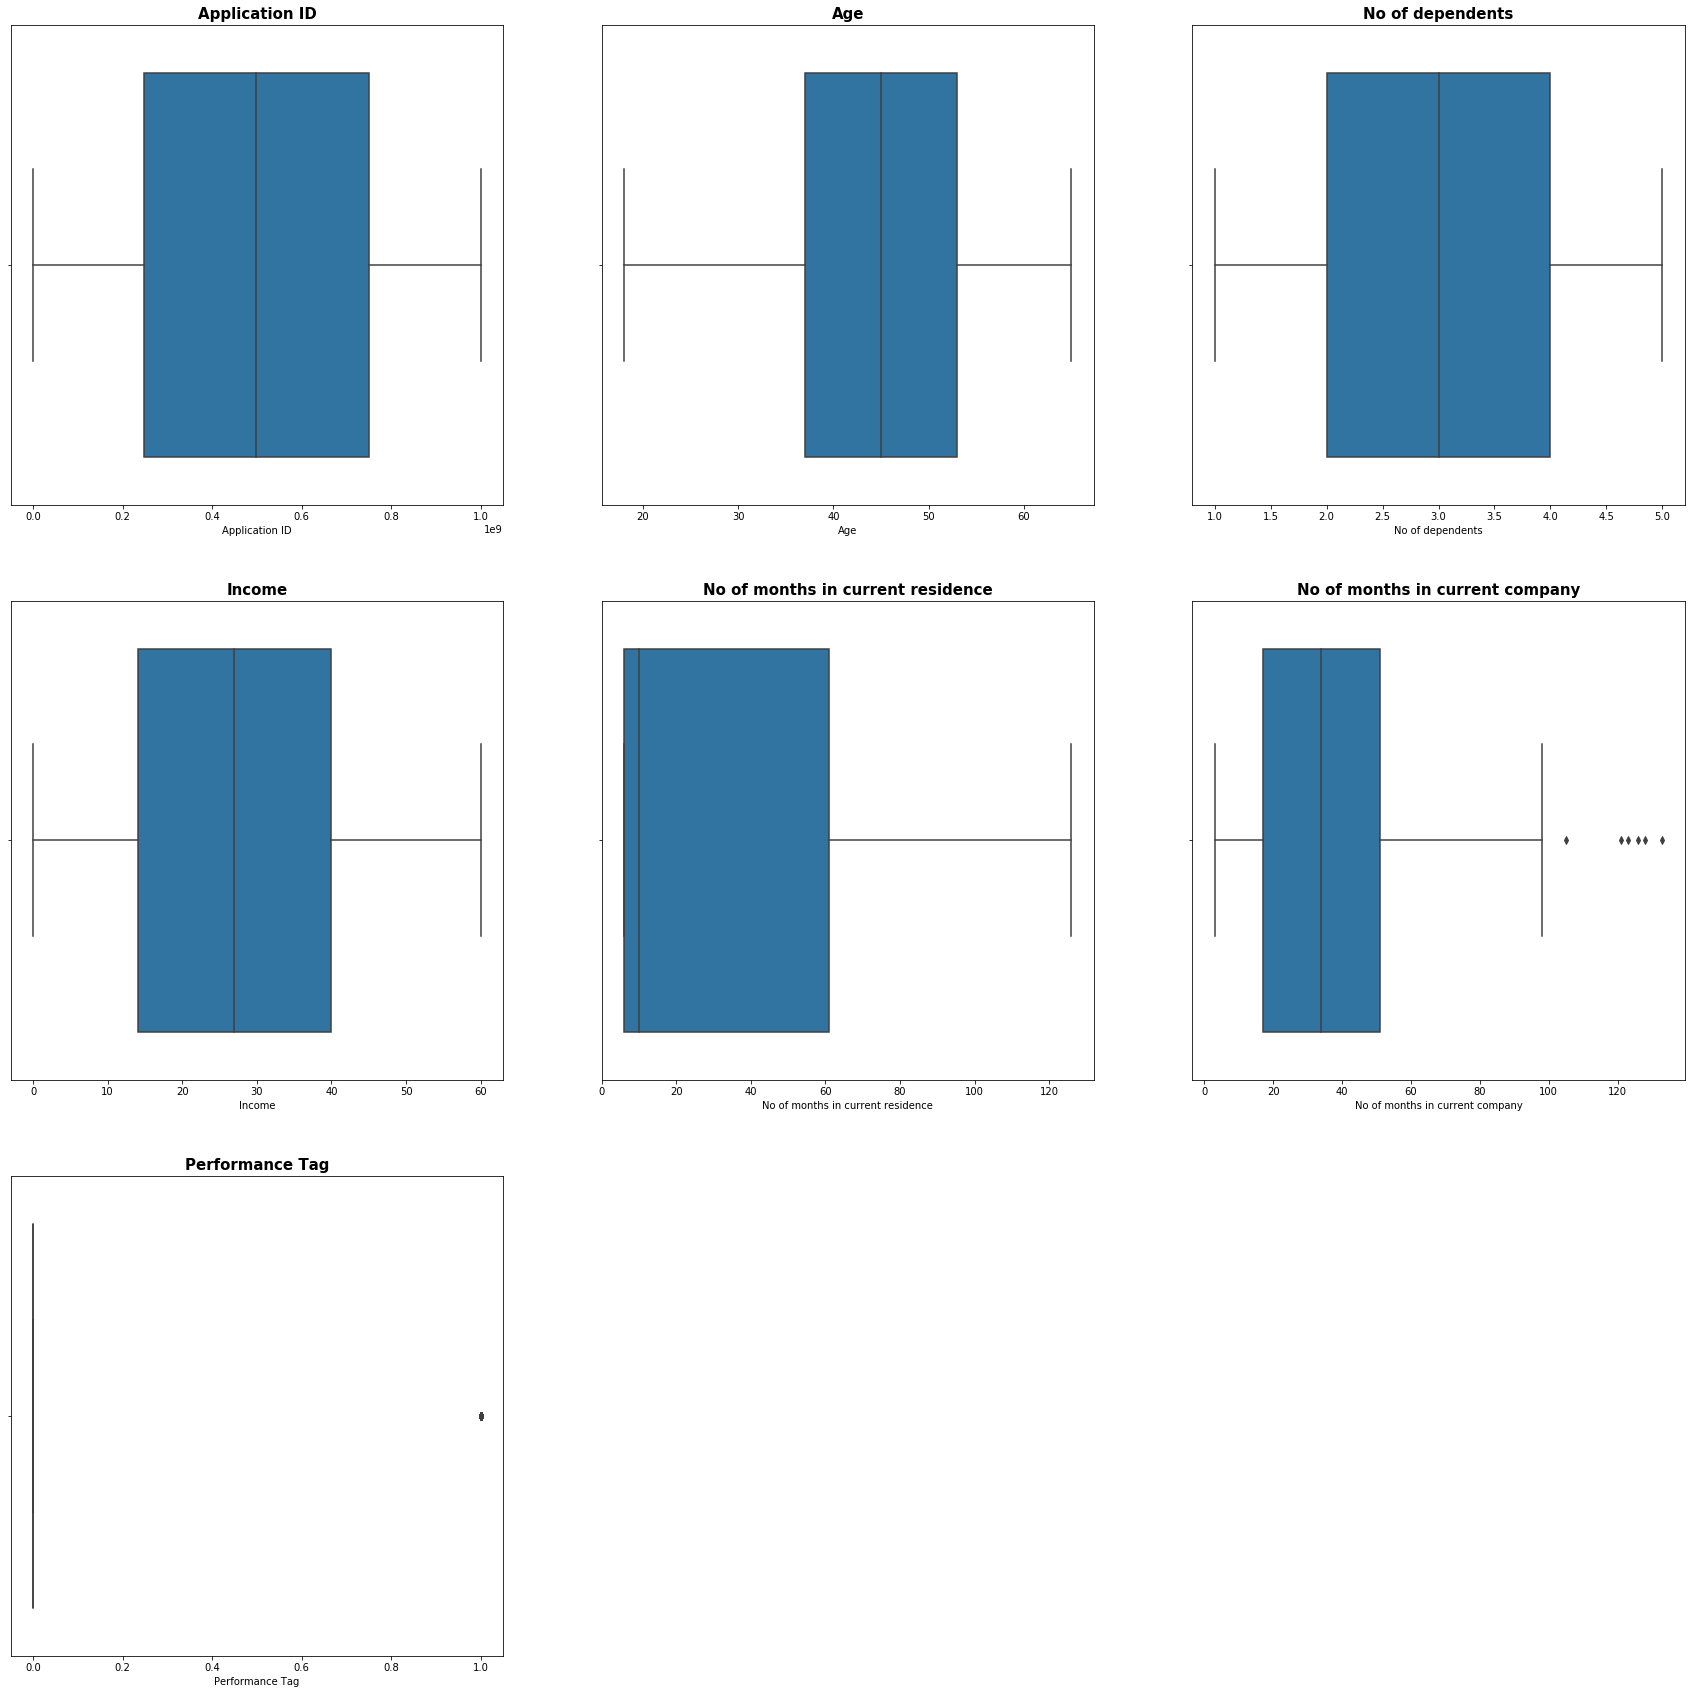

In [39]:
# Let's check for outliers in the demographic dataset
fig= plt.figure(figsize = (30,30))

i = 1
for col in num_cols:
    plt.subplot(3,3,i)
    sns.boxplot(demographic_eda[col])
    plt.title(col,fontsize = 15,fontweight='bold')
    i = i + 1 

plt.show()

There seems to be no outliers in the demographic dataset except for the field "No of months in current company".
Let's check this variable for more informaion

In [40]:
# Lets check the available statistics for the field "No of months in current company"
demographic_eda["No of months in current company"].describe()

count    69867.000000
mean        34.198921
std         20.349768
min          3.000000
25%         17.000000
50%         34.000000
75%         51.000000
max        133.000000
Name: No of months in current company, dtype: float64

As we can see here, Minimum value for the variable "No of months in current company" is 3 and the maximum value is 133, this seems correct as organizations can have new joinees as well as tenured employees, so lets keep the data as it is.

### Bivariate Analysis among the target variable "Performance Tag" and the Predictor variables

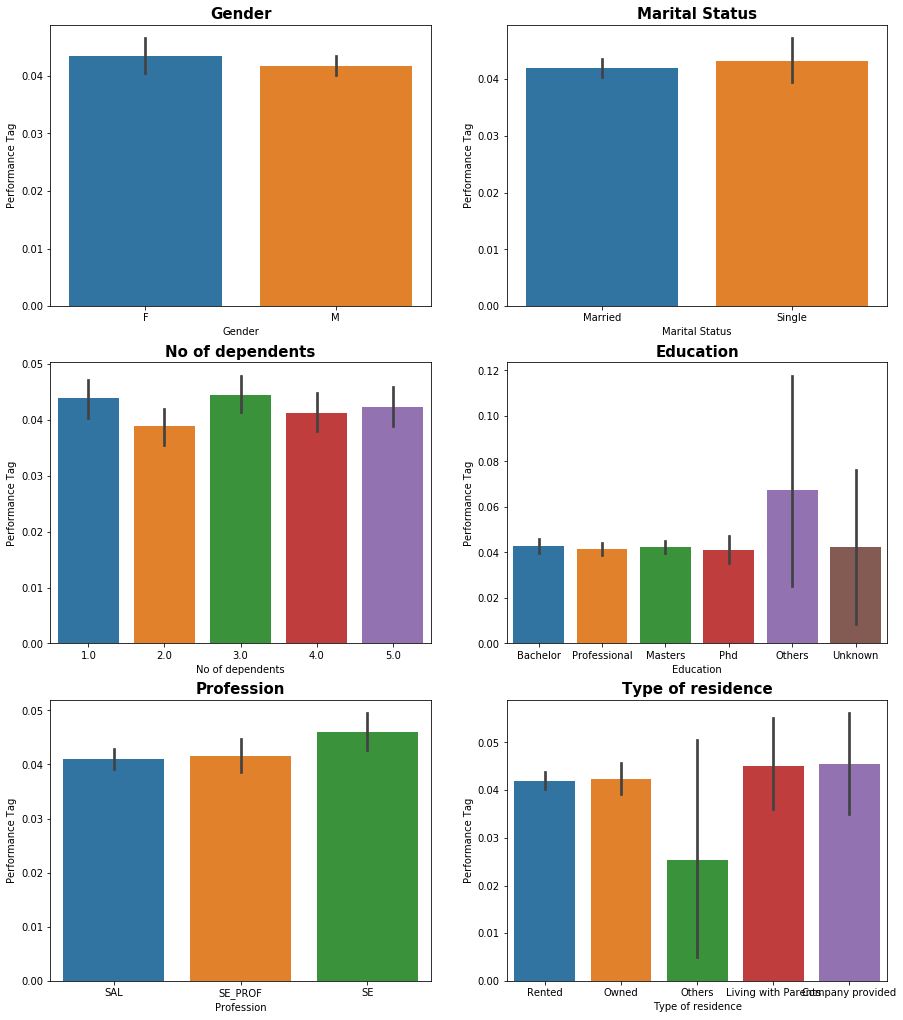

In [41]:
# Let's plot "Performance Tag" against the availabe predictor variables
fig= plt.figure(figsize = (15,30))

# Let's segregate the coulmns and remove few variables for which we have created the variable bins
cols = demographic_eda.drop(["Application ID",
                             "Performance Tag",
                             "Age",
                             "Income",
                             "No of months in current residence",
                             "No of months in current company"], axis = 1)

i = 1
for col in cols:
    plt.subplot(5,2,i)
    bin_col = col + "_bins"
    if demographic_eda[col].nunique() > 15:
        sns.barplot(x = bin_col, y = "Performance Tag", data = demographic_eda) # plot for binned variables
    else:
        sns.barplot(x = col, y = "Performance Tag", data = demographic_eda) # plot for non-binned variables
    plt.title(col,fontsize = 15,fontweight='bold')
    i = i + 1 

plt.show()

Frow the above graph plotes we can see how our target variable "Performance Tag" is related with the predictor variables

## Import the Credit Bureau Data

In [42]:
creditbureau = pd.read_csv("Credit Bureau data.csv")
creditbureau.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [43]:
# let's take look at the dimensions of the dataset
creditbureau.shape

(71295, 19)

In [44]:
# let's take look at the dataset for numeric variables
creditbureau.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


## Data Preparation & EDA on Credit Bureau Data Set

In [45]:
# let's take look for all column names
print("Columns Name:",creditbureau.columns)

Columns Name: Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')


In [46]:
# Let's take a look at the number of unique entries for all the variables
print("No. of unique values - Column wise:\n",creditbureau.nunique())

No. of unique values - Column wise:
 Application ID                                                     71292
No of times 90 DPD or worse in last 6 months                           4
No of times 60 DPD or worse in last 6 months                           6
No of times 30 DPD or worse in last 6 months                           8
No of times 90 DPD or worse in last 12 months                          6
No of times 60 DPD or worse in last 12 months                          8
No of times 30 DPD or worse in last 12 months                         10
Avgas CC Utilization in last 12 months                               114
No of trades opened in last 6 months                                  13
No of trades opened in last 12 months                                 29
No of PL trades opened in last 6 months                                7
No of PL trades opened in last 12 months                              13
No of Inquiries in last 6 months (excluding home & auto loans)        11
No of Inquirie

In [47]:
# Check if there are any duplicate entry (using application ID)
dup_app_id = creditbureau["Application ID"]
dup_customers = creditbureau[dup_app_id.isin(dup_app_id[dup_app_id.duplicated()])]
dup_customers.sort_values(by='Application ID')

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
5243,653287861,0,0,0,0,0,0,15.0,0.0,0,0,0,0,0,0.0,10494.0,2,0,0.0
42637,653287861,1,1,1,2,2,2,113.0,2.0,5,1,3,1,3,0.0,628075.0,6,0,1.0
48602,671989187,1,2,3,2,2,3,63.0,2.0,6,1,4,3,5,0.0,806473.0,7,1,0.0
59022,671989187,0,1,2,0,2,3,76.0,3.0,7,1,4,2,6,0.0,822298.0,7,0,0.0
24386,765011468,0,0,0,0,0,0,11.0,1.0,2,0,1,2,2,0.0,212656.0,3,0,0.0
27586,765011468,0,0,0,0,0,0,11.0,1.0,3,0,0,1,3,0.0,29817.0,6,0,0.0


In [48]:
# Even though application ID is same, records are totally different.
# We will drop 2nd record with same application ID, assuming that they are invalid entries.
creditbureau.drop_duplicates("Application ID",inplace = True)

#check the dimensions of the dataset again
print ("Shape of the dataset after dropping duplicates values:",creditbureau.shape)

Shape of the dataset after dropping duplicates values: (71292, 19)


#### Null and Invalid Values

In [49]:
# Let's have a look at the column-wise info of the dataframe
creditbureau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71294
Data columns (total 19 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Application ID                                                   71292 non-null  int64  
 1   No of times 90 DPD or worse in last 6 months                     71292 non-null  int64  
 2   No of times 60 DPD or worse in last 6 months                     71292 non-null  int64  
 3   No of times 30 DPD or worse in last 6 months                     71292 non-null  int64  
 4   No of times 90 DPD or worse in last 12 months                    71292 non-null  int64  
 5   No of times 60 DPD or worse in last 12 months                    71292 non-null  int64  
 6   No of times 30 DPD or worse in last 12 months                    71292 non-null  int64  
 7   Avgas CC Utilization in last 12 months  

##### Here we can see that some columns have null values. Let's explore null values in detail.

In [50]:
# Let's have a look at the null values column wise
creditbureau.isnull().sum().sort_values(ascending = False)

Performance Tag                                                    1425
Avgas CC Utilization in last 12 months                             1058
Outstanding Balance                                                 272
Presence of open home loan                                          272
No of trades opened in last 6 months                                  1
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
No of trades opened in last 12 months                                 0
Presence of open auto loan                                            0
No of PL trades opened in last 6 months                         

In [51]:
# Let's take a look at the % of null values.
(round(100*(creditbureau.isnull().sum()/len(creditbureau.index)), 2)).sort_values(ascending = False)

Performance Tag                                                    2.00
Avgas CC Utilization in last 12 months                             1.48
Outstanding Balance                                                0.38
Presence of open home loan                                         0.38
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                       0.00
No of times 90 DPD or worse in last 12 months                      0.00
No of times 60 DPD or worse in last 12 months                      0.00
No of times 30 DPD or worse in last 12 months                      0.00
No of trades opened in last 12 months                              0.00
No of trades opened in last 6 months                               0.00
Presence of open auto loan                                         0.00
No of PL trades opened in last 6 months                         

In [52]:
# To treat the missing/null/invalid values let's first take a look at unique values of all columns(Except Applicaion ID)
cols = creditbureau.drop("Application ID",axis = 1)

print('\nUnique values - column wise:')
for i in cols:
    print(i,creditbureau[i].unique(),'\n')


Unique values - column wise:
No of times 90 DPD or worse in last 6 months [0 1 2 3] 

No of times 60 DPD or worse in last 6 months [0 1 2 3 4 5] 

No of times 30 DPD or worse in last 6 months [0 1 2 3 4 5 6 7] 

No of times 90 DPD or worse in last 12 months [0 1 2 3 4 5] 

No of times 60 DPD or worse in last 12 months [0 1 2 3 4 5 6 7] 

No of times 30 DPD or worse in last 12 months [0 1 2 3 4 5 6 7 8 9] 

Avgas CC Utilization in last 12 months [  4.   3.   7.  11.  12.  10.  13.   9.   6.   5.   2.  14.   0.   8.
  nan  15.   1.  16.  19.  18.  17.  20.  26.  24.  23.  22.  21.  27.
  25.  28.  29. 113.  83. 111.  43. 103.  98.  97.  37.  45.  80.  57.
  94.  40.  34.  41. 105.  59.  81.  75.  56.  88.  70.  95.  65. 102.
  85. 112.  32.  73.  58. 104.  77.  35. 100.  49. 110.  96.  79.  68.
  90.  93.  33.  60. 106.  91.  64. 107.  72.  74. 101.  39.  71.  36.
  99.  38.  84.  86.  46.  50.  48.  51.  53.  42.  66.  78.  61.  44.
  54.  92.  62.  82. 109.  76.  31.  55. 108.  87.  6

##### From the above report we can see that there are null values present in the followng variables:

1. Avgas CC Utilization in last 12 months
2. Outstanding Balance
3. Presence of open home loan
4. Performance Tag


#### Let's treat them one by one :

Describe Performance Tag: count    69867.000000
mean         0.042180
std          0.201001
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Performance Tag, dtype: float64

Null Values: 1425


(array([0, 1]), <a list of 2 Text xticklabel objects>)

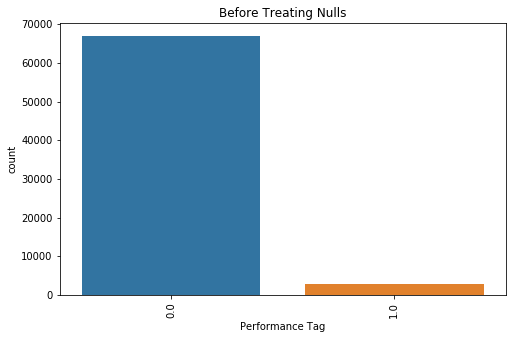

In [53]:
# Let's look for "Performance Tag" variable

print("Describe Performance Tag:",creditbureau["Performance Tag"].describe())

print("\nNull Values:",creditbureau["Performance Tag"].isnull().sum())

fig = plt.figure(figsize = (8,5))
sns.countplot(creditbureau["Performance Tag"])
plt.title("Before Treating Nulls")
xticks(rotation = 90)

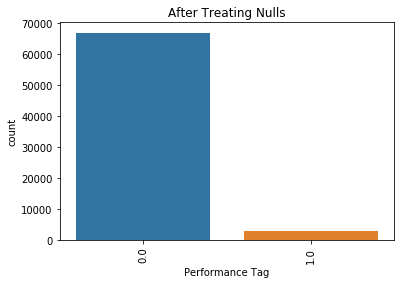

Describe Performance Tag after treating null values: count    69867.000000
mean         0.042180
std          0.201001
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Performance Tag, dtype: float64

Null Values: 0


In [54]:
# There are 1425 null values in performance tag variable, a null value in this variable indicates that the credit card was never used
# and these records belongs to rejected applicants 
# let's drop them from our Credit Bureau data and save them seperately in a  dataset for future use
rejected_creditb = creditbureau[creditbureau["Performance Tag"].isnull()]
creditbureau = creditbureau[~creditbureau["Performance Tag"].isnull()]

# plot after treating null values
sns.countplot(creditbureau["Performance Tag"])
plt.title("After Treating Nulls")
xticks(rotation = 90)
plt.show()

print("Describe Performance Tag after treating null values:",creditbureau["Performance Tag"].describe())

print("\nNull Values:",creditbureau["Performance Tag"].isnull().sum())

Describe No of trades opened in last 6 months: count    69866.000000
mean         2.285117
std          2.081900
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: No of trades opened in last 6 months, dtype: float64

No. of Null Values: 1


Text(0.5, 1.0, 'Before Treating Nulls')

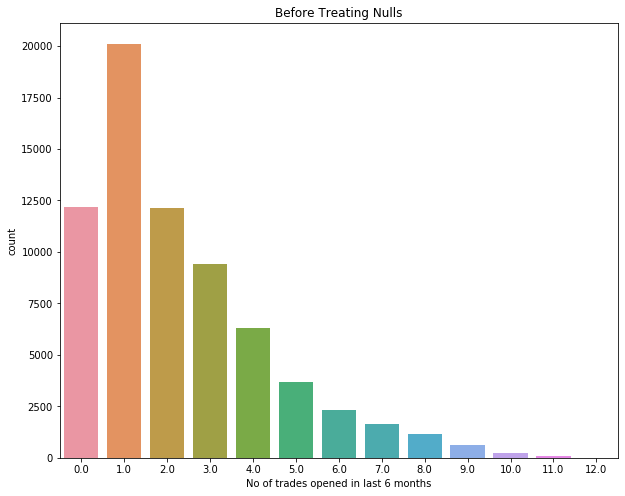

In [55]:
# Let's work on "No of trades opened in last 6 months"

print("Describe No of trades opened in last 6 months:",creditbureau["No of trades opened in last 6 months"].describe())

print("\nNo. of Null Values:",creditbureau["No of trades opened in last 6 months"].isnull().sum())

fig = plt.figure(figsize = (10,8))
sns.countplot(creditbureau["No of trades opened in last 6 months"])
plt.title("Before Treating Nulls")

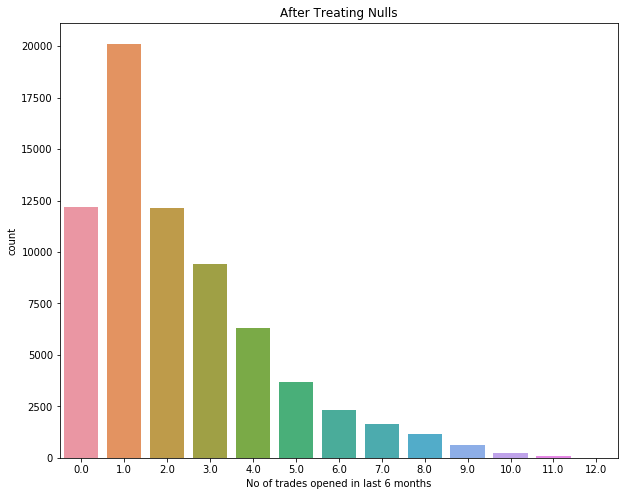

0


In [56]:
# Out of 71291 records, more than 20000 has a value 1.0 (majority), so lets impute the null value with 1.0
creditbureau["No of trades opened in last 6 months"] = creditbureau["No of trades opened in last 6 months"].replace(np.nan,1.0)

# plot after treating null values
fig = plt.figure(figsize = (10,8))
sns.countplot(creditbureau["No of trades opened in last 6 months"])
plt.title("After Treating Nulls")
plt.show()

print(creditbureau["No of trades opened in last 6 months"].isnull().sum())

Presence of open home loan: count    69595.000000
mean         0.259659
std          0.438451
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Presence of open home loan, dtype: float64

Null Values: 272


Text(0.5, 1.0, 'Before Treating Nulls')

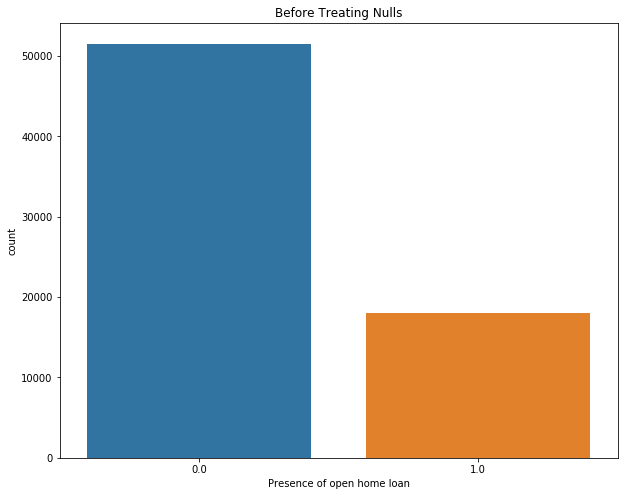

In [57]:
# Let's work on "Presence of open home loan"

print("Presence of open home loan:",creditbureau["Presence of open home loan"].describe())

print("\nNull Values:",creditbureau["Presence of open home loan"].isnull().sum())

fig = plt.figure(figsize = (10,8))
sns.countplot(creditbureau["Presence of open home loan"])
plt.title("Before Treating Nulls")

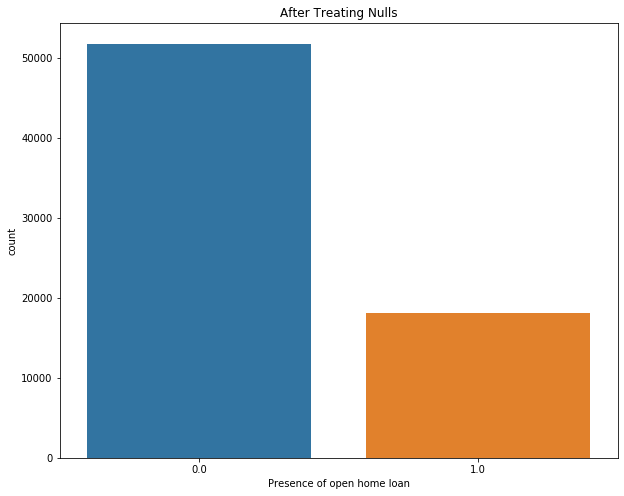

0


In [58]:
# Out of 71020 records, more than 50000 has a value 0(so majority), so lets impute the null value with 0
creditbureau["Presence of open home loan"] = creditbureau["Presence of open home loan"].replace(np.nan,0)

# plot after treating null values
fig = plt.figure(figsize = (10,8))
sns.countplot(creditbureau["Presence of open home loan"])
plt.title("After Treating Nulls")
plt.show()

print(creditbureau["Presence of open home loan"].isnull().sum())

In [59]:
# Let's try to analyse the Avgas CC Utilization in the duration of last 12 months and the Outstanding Balance

# Let's also see the no. of null values for outstanding balance
print("\nNull Values for Outstanding Balance:",creditbureau["Outstanding Balance"].isnull().sum())

# lets check the records where outstanding balance has null values
creditbureau.loc[creditbureau["Outstanding Balance"].isnull()]


Null Values for Outstanding Balance: 272


,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
10509,479431469,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10560,369436570,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10583,198567793,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10594,771962421,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
10763,124126752,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,0.0,NaN,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46419,349780715,0,0,0,0,0,0,NaN,0.0,0,0,0,2,2,0.0,NaN,0,0,0.0
46489,258978659,0,0,0,0,0,0,NaN,0.0,0,0,0,2,3,0.0,NaN,0,0,0.0
49931,141277353,0,0,0,0,0,0,NaN,0.0,0,0,0,2,4,0.0,NaN,0,0,0.0
52026,376991101,0,0,0,0,0,0,NaN,0.0,0,0,0,2,5,0.0,NaN,0,0,0.0


In [60]:
# We can see that "Total no. of trades" is 0 for all the records for which "Outstanding Balance" & "Avgas CC Utilization in last 12 months" 
# has null values. which corresponds that the credit card has never been utilized, so we can safely replace these nan value with 0.

# Let's replace the null values for Avgas CC Utilization in last 12 months & Outstanding Balance to 0
creditbureau.loc[creditbureau["Avgas CC Utilization in last 12 months"].isnull(),"Avgas CC Utilization in last 12 months"] = 0
creditbureau.loc[creditbureau["Outstanding Balance"].isnull(),'Outstanding Balance'] = 0

In [61]:
# lets check the null values again
creditbureau.isnull().sum().sort_values(ascending = False)

Performance Tag                                                    0
No of trades opened in last 6 months                               0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in last 12 months                      0
No of times 60 DPD or worse in last 12 months                      0
No of times 30 DPD or worse in last 12 months                      0
Avgas CC Utilization in last 12 months                             0
No of trades opened in last 12 months                              0
Presence of open auto loan                                         0
No of PL trades opened in last 6 months                            0
No of PL trades opened in last 12 months                           0
No of Inquiries in last 6 months (excluding home & auto loans)     0
No of Inquiries in last 12 months 

In [62]:
# There are no null values in the Date set now. Let's check the dimensions of the cleaned dataset
creditbureau.shape

(69867, 19)

In [63]:
#lets display head of the dataset
creditbureau.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [64]:
# Lets create a copy of the creditbureau dataset to perform EDA
creditbureau_eda = pd.DataFrame(creditbureau).copy()

0.0    66920
1.0     2947
Name: Performance Tag, dtype: int64


Text(0, 0.5, 'Frequency')

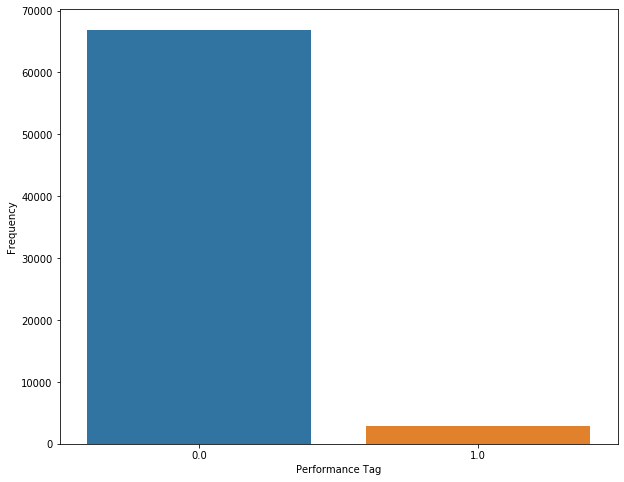

In [65]:
# Check the count of different values for performance tag
print(creditbureau_eda["Performance Tag"].value_counts())

fig = plt.figure(figsize = (10,8))
sns.countplot(creditbureau_eda["Performance Tag"])
plt.ylabel('Frequency')  

In [66]:
# Here we can see that data set is highly imbalanced as majority of the customers have a performance tag of 0.
# Let's check the percentage of defaulters

print((creditbureau_eda['Performance Tag'].sum()/creditbureau_eda['Performance Tag'].count())*100)

4.218014227031359


In [67]:
# Let's check the type of variables present in the dataset
creditbureau_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 71294
Data columns (total 19 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Application ID                                                   69867 non-null  int64  
 1   No of times 90 DPD or worse in last 6 months                     69867 non-null  int64  
 2   No of times 60 DPD or worse in last 6 months                     69867 non-null  int64  
 3   No of times 30 DPD or worse in last 6 months                     69867 non-null  int64  
 4   No of times 90 DPD or worse in last 12 months                    69867 non-null  int64  
 5   No of times 60 DPD or worse in last 12 months                    69867 non-null  int64  
 6   No of times 30 DPD or worse in last 12 months                    69867 non-null  int64  
 7   Avgas CC Utilization in last 12 months  

From the above information we can see that "Credit Bureau" Data Set contains only Numerical variables

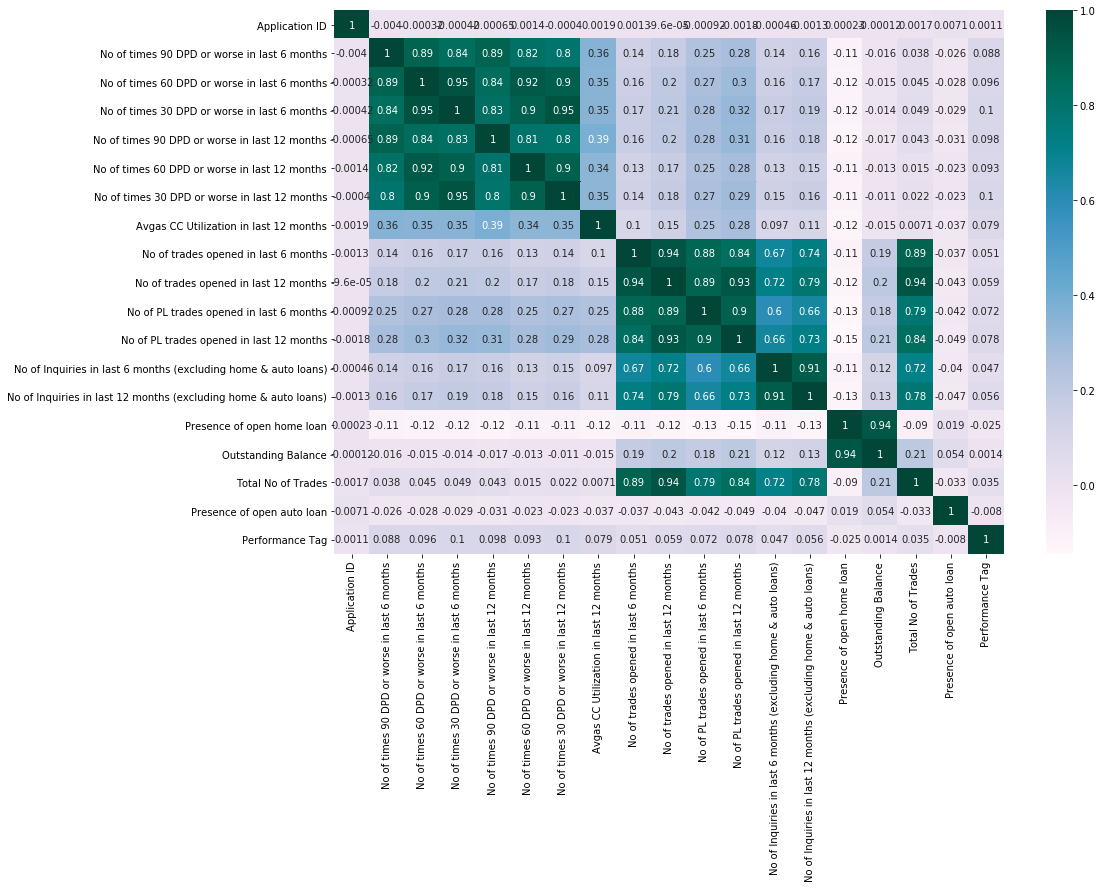

In [68]:
# Let's check the correlations of this numerical data
plt.figure(figsize = (15, 10))
sns.heatmap(creditbureau[creditbureau_eda.columns].corr(), annot = True, cmap="PuBuGn")
plt.show()

 - Here we can see that Target variable, Performance Tag is not much dependant with any numerical data

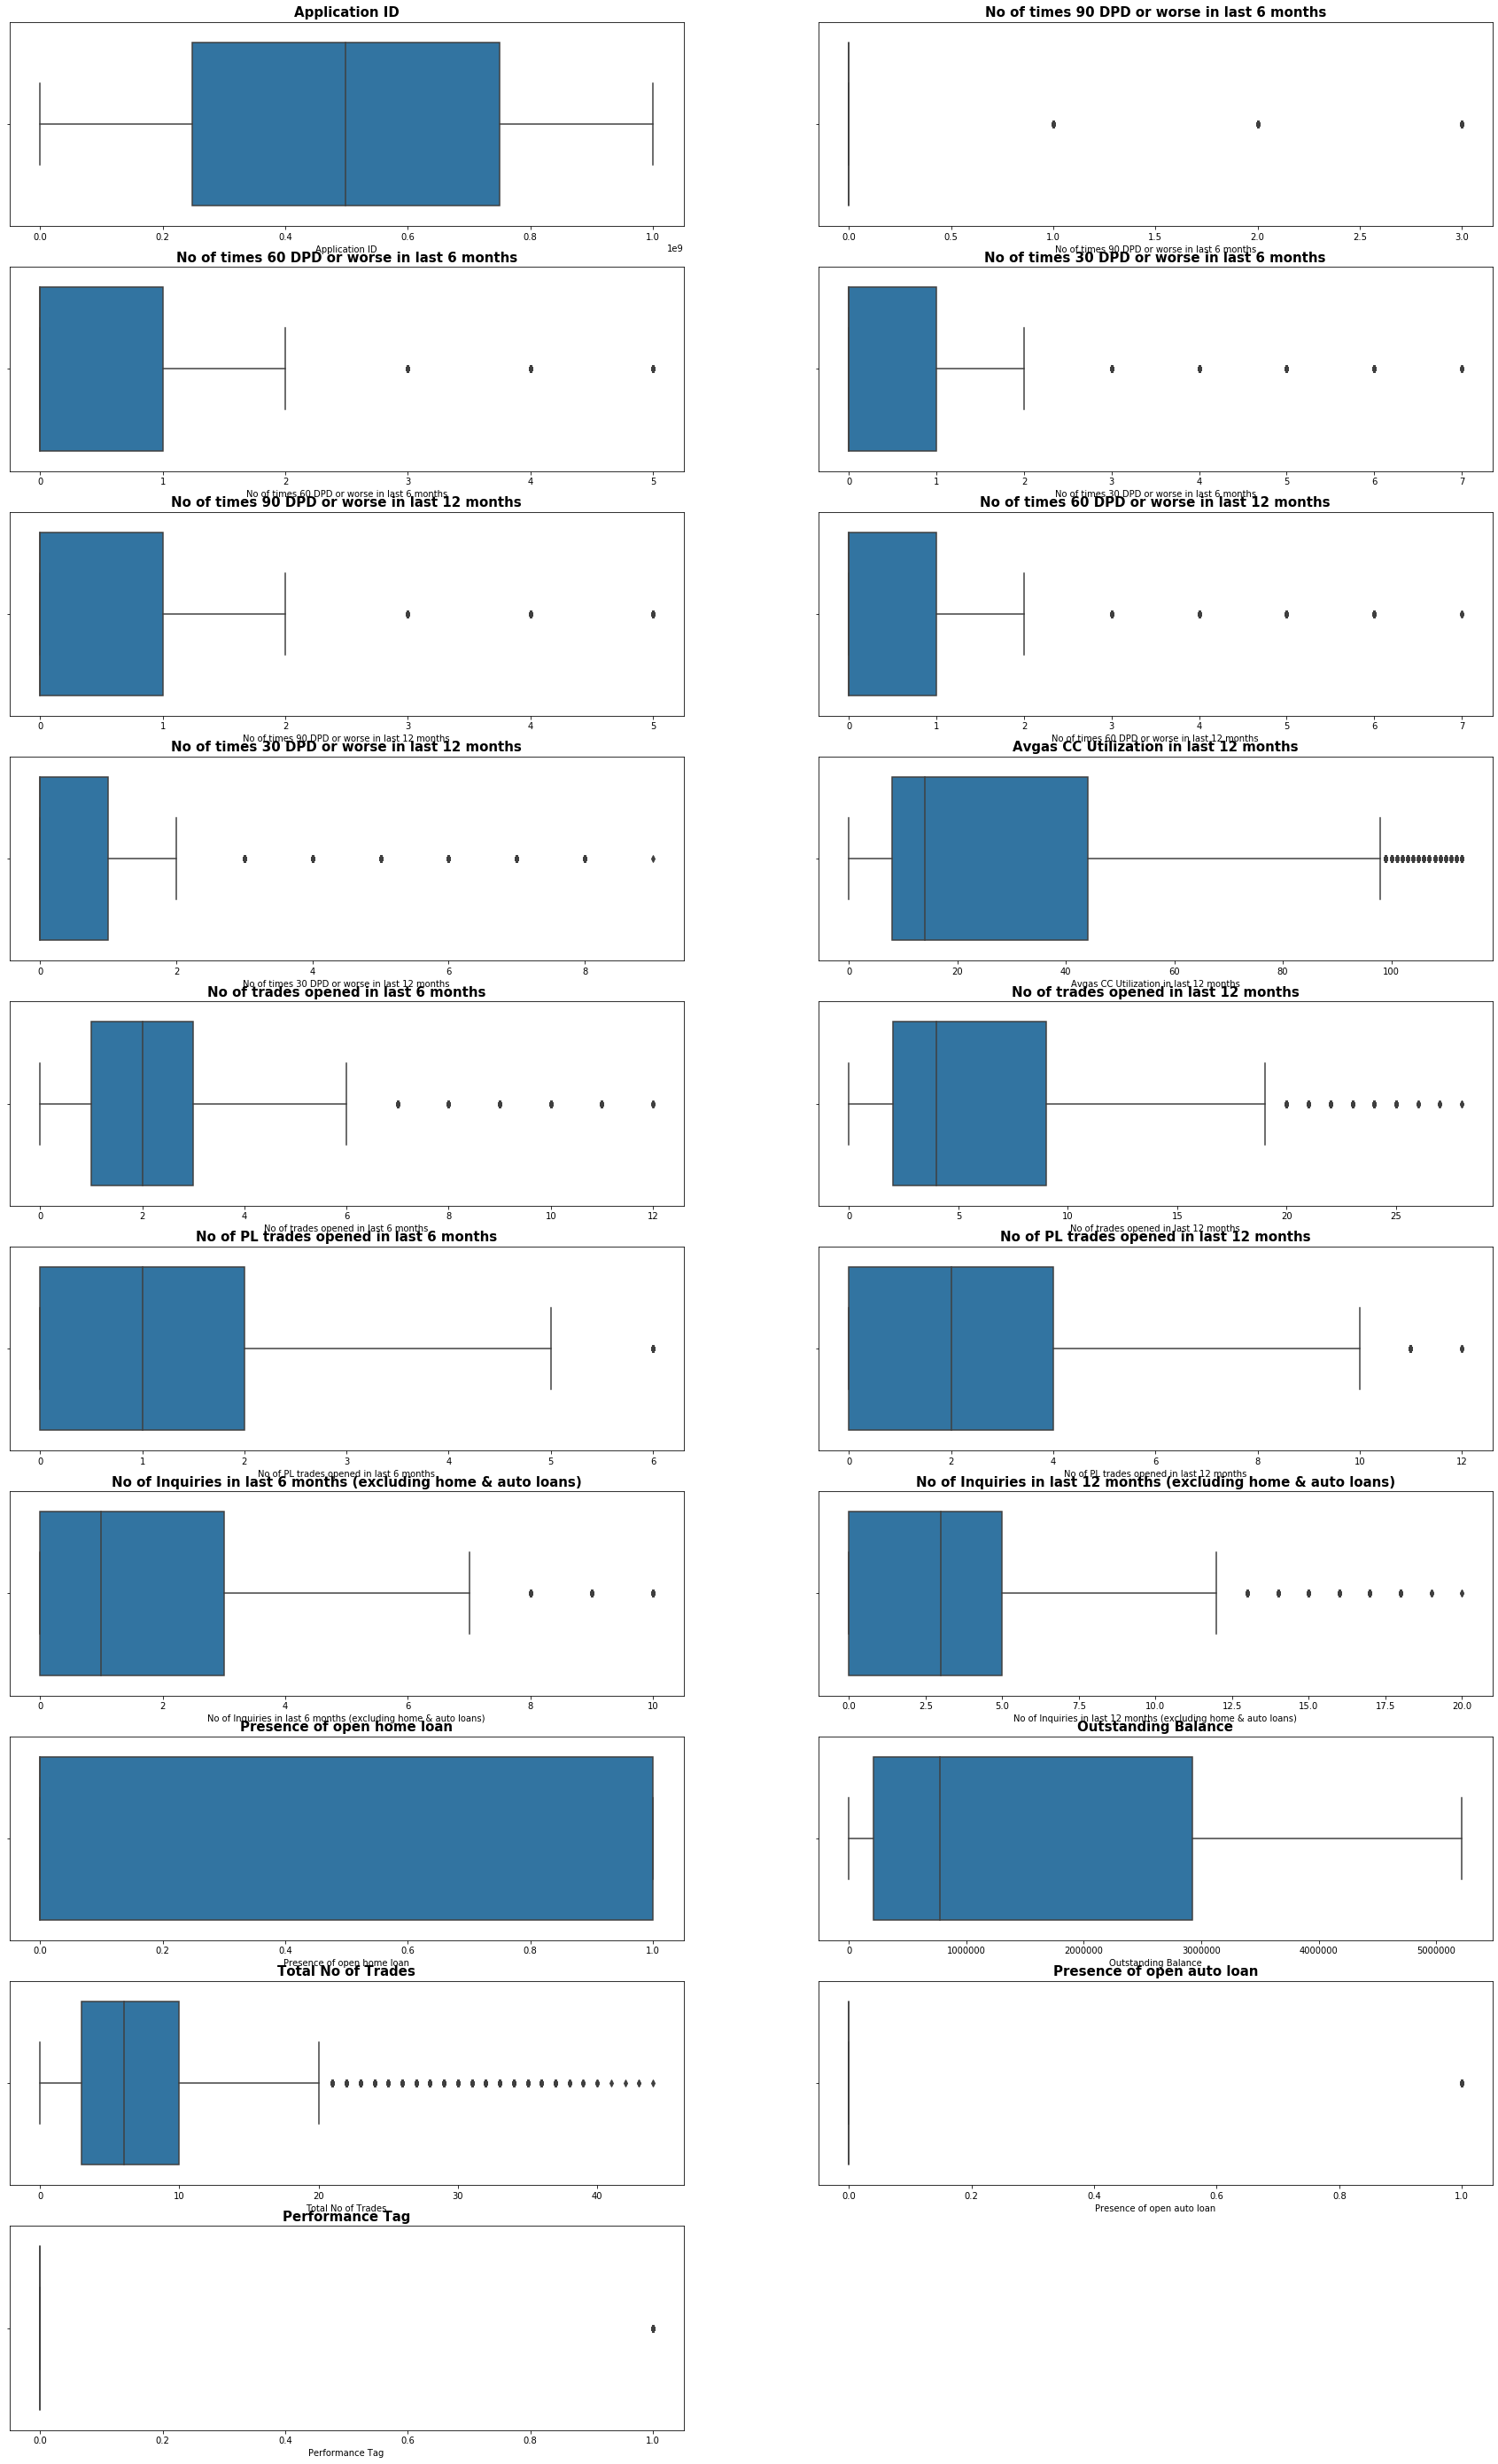

In [69]:
# Let's check for outliers in the "Credit Bureau" dataset
fig= plt.figure(figsize = (30,50))

i = 1
for col in creditbureau_eda.columns:
    plt.subplot(10,2,i)
    sns.boxplot(creditbureau_eda[col])
    plt.title(col,fontsize = 15,fontweight='bold')
    i = i + 1 

plt.show()

In [70]:
# From the above graphs, there is a possibility of some outliers in the dataset, lets deep dive in it

for col in creditbureau.columns:
    print("Describe Variable",col,":\n",creditbureau[col].describe(),"\n")

Describe Variable Application ID :
 count    6.986700e+04
mean     4.992179e+08
std      2.885551e+08
min      1.004500e+05
25%      2.485673e+08
50%      4.980015e+08
75%      7.498625e+08
max      1.000084e+09
Name: Application ID, dtype: float64 

Describe Variable No of times 90 DPD or worse in last 6 months :
 count    69867.000000
mean         0.248973
std          0.505659
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: No of times 90 DPD or worse in last 6 months, dtype: float64 

Describe Variable No of times 60 DPD or worse in last 6 months :
 count    69867.000000
mean         0.391673
std          0.771887
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: No of times 60 DPD or worse in last 6 months, dtype: float64 

Describe Variable No of times 30 DPD or worse in last 6 months :
 count    69867.000000
mean         0.523495
std          1.00

By doing a quick deep dive in the above data, we can conclude that there are no outliers present in the dataset and the data looks more realistic.

### Bivariate Analysis among the target variable "Performance Tag" and the Predictor variables

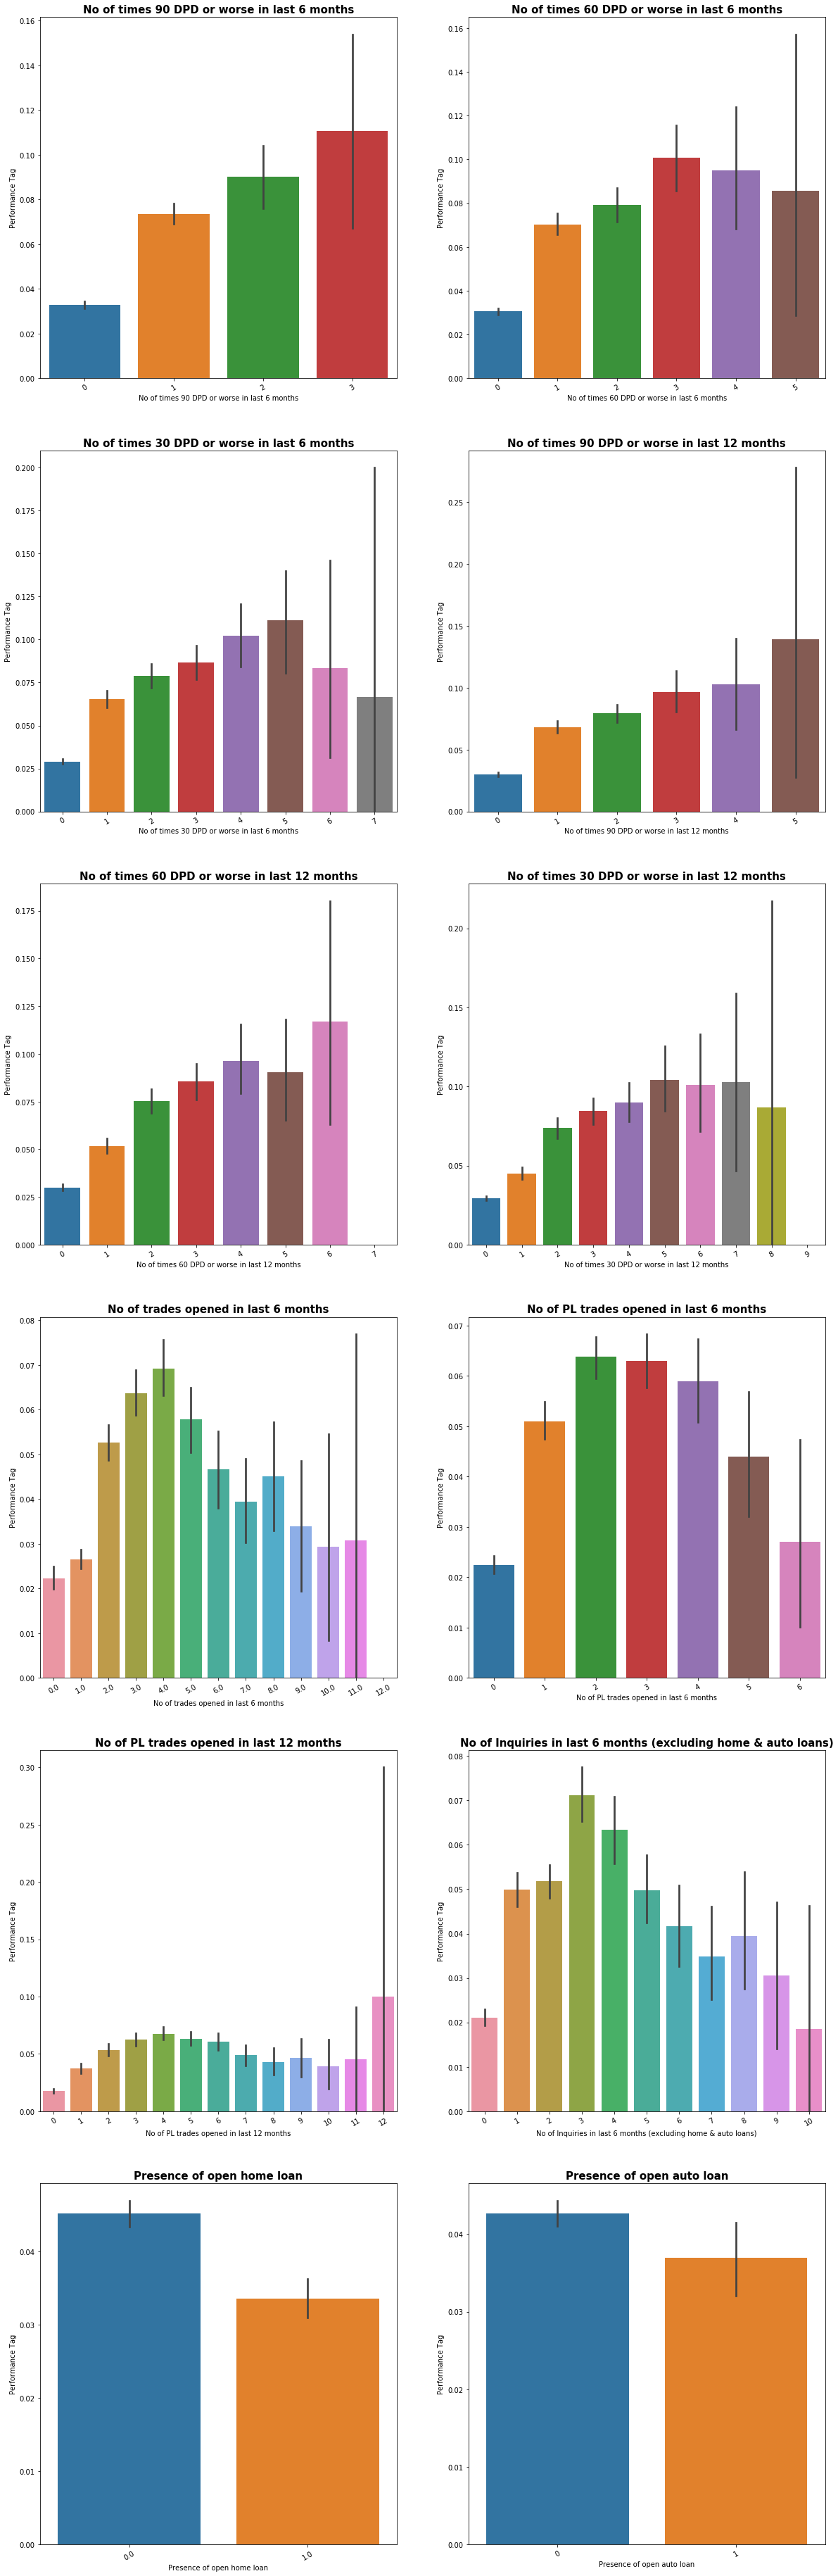

In [71]:
# Let's plot "Performance Tag" against the availabe predictor variables
fig= plt.figure(figsize = (20,100))

# Let's segregate the coulmns and remove few variables for which we have created the variable bins
cols = creditbureau_eda.drop(["Application ID",
                              "Performance Tag",
                              "Avgas CC Utilization in last 12 months",
                              "No of trades opened in last 12 months",
                              "No of Inquiries in last 12 months (excluding home & auto loans)",
                              "Outstanding Balance",
                              "Total No of Trades"], axis = 1)

i = 1
for col in cols:
    plt.subplot(9,2,i)
    bin_col = col + "_bins"
    if creditbureau_eda[col].nunique() > 15:
        sns.barplot(x = bin_col, y = "Performance Tag", data = creditbureau_eda) # plot for binned variables
    else:
        sns.barplot(x = col, y = "Performance Tag", data = creditbureau_eda) # plot for non-binned variables
    plt.title(col,fontsize = 15,fontweight='bold')
    xticks(rotation = 30)
    i = i + 1 

plt.show()

From the above graph plots we see how the target variable is related to the predictor variables

## Master Data Set (Demographic + Credit Bureau)

In [72]:
# Let's remove "Performance Tag" from creditbureau as it's also present in the demographic data set
creditbureau.drop("Performance Tag",axis =1 , inplace = True)

In [73]:
# Let's create master dataset
master = pd.merge(demographic,creditbureau, how="inner", on = "Application ID")
master.head()

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,1.0,2,0,0,0,0,1.0,2999395.0,4,0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,1.0,2,0,0,0,0,0.0,3078.0,5,0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0.0,0,0,0,0,0,1.0,3004972.0,2,0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1.0,1,0,0,0,0,1.0,3355373.0,4,1
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,0.0,1,0,0,0,0,1.0,3014283.0,4,0


In [74]:
# Let's check the dimensions of the master dataset
master.shape

(69867, 29)

In [75]:
# Let's check column wise info of the master datset
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 29 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Application ID                                                   69867 non-null  int64  
 1   Age                                                              69867 non-null  int64  
 2   Gender                                                           69867 non-null  object 
 3   Marital Status                                                   69867 non-null  object 
 4   No of dependents                                                 69867 non-null  float64
 5   Income                                                           69867 non-null  float64
 6   Education                                                        69867 non-null  object 
 7   Profession                              

### Let's do a sanity check of our Master Data Set

In [76]:
# let's check the column wise null values 
(round(100*(master.isnull().sum()/len(master.index)), 2)).sort_values(ascending = False)

Presence of open auto loan                                         0.0
No of times 60 DPD or worse in last 6 months                       0.0
Age                                                                0.0
Gender                                                             0.0
Marital Status                                                     0.0
No of dependents                                                   0.0
Income                                                             0.0
Education                                                          0.0
Profession                                                         0.0
Type of residence                                                  0.0
No of months in current residence                                  0.0
No of months in current company                                    0.0
Performance Tag                                                    0.0
No of times 90 DPD or worse in last 6 months                       0.0
No of 

From the above result, our Master Data Set is not having any missing values and henace we can move forward

In [77]:
# Let's create a dataset for the rejected applicants from the credit bureau dataset
rejected_creditb = rejected_creditb.drop("Performance Tag",axis = 1)

In [78]:
# Finally, let's merge rejected applicants from demographics and creditbureau to create rejected_master
rejected_master = pd.merge(rejected_demo,rejected_creditb, how="inner", on = "Application ID")
rejected_master.head()

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,...,4.0,12,3,7,2,4,0.0,1309623.0,13,0
1,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,...,3.0,7,3,4,3,5,0.0,775626.0,7,0
2,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,...,2.0,7,2,4,0,3,0.0,732602.0,8,0
3,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,...,2.0,7,1,4,4,5,0.0,842057.0,8,0
4,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,...,3.0,7,2,3,3,6,0.0,786997.0,7,1


### Demographic Data Set

### Lets create the weight of evidence (WOE) and analyse the information value

In [79]:
# Let's make a copy of our cleaned demographic dataset, also drop "Application ID"
demographic_copy = demographic.drop('Application ID',axis = 1)

# Let's check the dimensions of the dataset
demographic_copy.shape

(69867, 11)

In [80]:
#Let's consider those Columns which have more than 15 unique values for binning
demo_bins = []

demo_cols = demographic_copy.columns
for i in demo_cols:
    if demographic_copy[i].nunique() > 15:
        demo_bins.append(i)
        
demo_bins

['Age',
 'Income',
 'No of months in current residence',
 'No of months in current company']

In [81]:
# Let's look at Non-binned variables

demo_vars = demographic_copy.columns.difference(demo_bins)
demo_vars

Index(['Education', 'Gender', 'Marital Status', 'No of dependents',
       'Performance Tag', 'Profession', 'Type of residence'],
      dtype='object')

In [82]:
# Let's use "cut" in place of "qcut" as qcut considers to disribute same number of records into bins

#Defining WOE,IV function

def iv_woe(data, target, bins, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>15):
            
            binned_x = pd.cut(data[ivars], bins, include_lowest=False)
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events'] - d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [83]:
# Let's call the functions
iv_d, woe_d = iv_woe(data = demographic_copy, target = 'Performance Tag', bins=8, show_woe = True)

Information value of Age is 0.00382
  Variable            Cutoff      N  Events  % of Events  Non-Events  \
0      Age  (17.953, 23.875]    214     4.0     0.001357       210.0   
1      Age   (23.875, 29.75]   4346   179.0     0.060740      4167.0   
2      Age   (29.75, 35.625]   8315   360.0     0.122158      7955.0   
3      Age    (35.625, 41.5]  14053   633.0     0.214795     13420.0   
4      Age    (41.5, 47.375]  13837   572.0     0.194096     13265.0   
5      Age   (47.375, 53.25]  13584   534.0     0.181201     13050.0   
6      Age   (53.25, 59.125]   9661   419.0     0.142178      9242.0   
7      Age    (59.125, 65.0]   5857   246.0     0.083475      5611.0   

   % of Non-Events       WoE        IV  
0         0.003138  0.838103  0.001492  
1         0.062268  0.024856  0.000038  
2         0.118873 -0.027258  0.000090  
3         0.200538 -0.068679  0.000979  
4         0.198222  0.021035  0.000087  
5         0.195009  0.073437  0.001014  
6         0.138105 -0.029068

In [84]:
# Let's look at the WOE table
woe_d.head()

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Age,"(17.953, 23.875]",214,4.0,0.001357,210.0,0.003138,0.838103,0.001492
1,Age,"(23.875, 29.75]",4346,179.0,0.060740,4167.0,0.062268,0.024856,0.000038
2,Age,"(29.75, 35.625]",8315,360.0,0.122158,7955.0,0.118873,-0.027258,0.000090
3,Age,"(35.625, 41.5]",14053,633.0,0.214795,13420.0,0.200538,-0.068679,0.000979
4,Age,"(41.5, 47.375]",13837,572.0,0.194096,13265.0,0.198222,0.021035,0.000087


In [85]:
# Let's look at the importance of the variables
iv_d.sort_values(by = 'IV',ascending = False)

,Variable,IV
0,Income,0.041686
0,No of months in current residence,0.038477
0,No of months in current company,0.019374
0,Age,0.003820
0,No of dependents,0.002649
0,Profession,0.002231
0,Type of residence,0.000921
0,Education,0.000783
0,Gender,0.000326
0,Marital Status,0.000095


In [86]:
# As known, IV value of less than 0.02 is not useful, so lets filter the dataframe for features having IV value greater 
# than 0.02
demo_imp = iv_d[iv_d["IV"] > 0.02]
demo_imp.sort_values(by="IV",ascending = False)

,Variable,IV
0,Income,0.041686
0,No of months in current residence,0.038477


Note : We can see that only "Income" & ""No of months in current residence seems to be the useful predictor variables

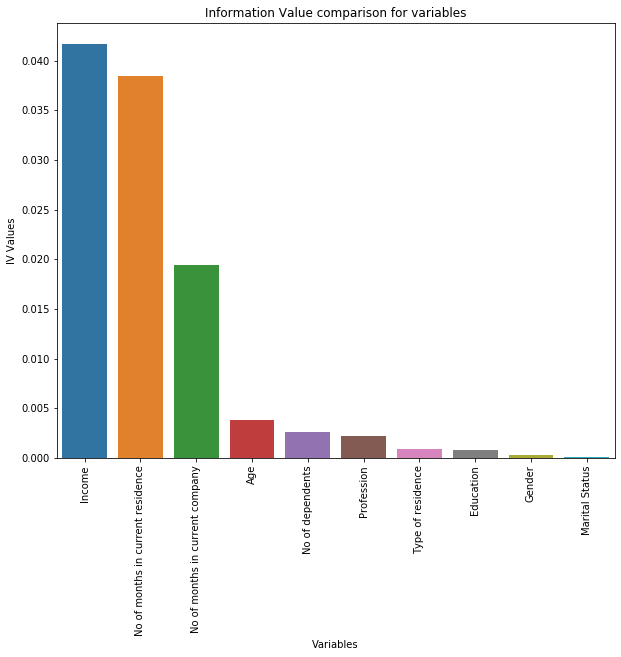

In [87]:
# Let's plot the IV values of the variables in the demographics dataframe
# The below graphs demonstrate Variables and their Information Values
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Variable', y='IV', data=iv_d.sort_values(by='IV', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Information Value comparison for variables')
plt.xlabel('Variables')
plt.ylabel('IV Values')
plt.show()

In [88]:
#Let's create a new dataset with WOE values as demographic_woe

#copy of demographic data
demographic_woe = pd.DataFrame(demographic_copy).copy()

In [89]:
# Let's replace actual values with WOE variables and create the woe transformed demographic dataset

#Binned dataframe
for var in demo_bins:
    small_df = woe_d[woe_d['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0)) 
        right = int(round(row.Cutoff.right,0))
        demographic_woe[var] = demographic_woe[var].replace(range(left,right),row.WoE)
        

In [90]:
#Non-Binned data
for var in demo_vars:
    small_df = woe_d[woe_d['Variable'] == var]
    for index, row in small_df.iterrows():
        demographic_woe[var] = demographic_woe[var].replace(row.Cutoff,row.WoE)

In [91]:
# woe transformed dataset
demographic_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,0.073437,-0.032174,0.004092,0.085222,0.239199,-0.017314,0.028409,0.004454,-0.032002,0.204217,0.0
1,-0.027258,0.010147,0.004092,0.025204,0.391202,0.017931,0.013298,0.004454,-0.032002,0.083311,0.0
2,-0.027258,0.010147,-0.023327,0.085222,0.230548,-0.017314,0.013298,0.004454,0.125663,0.083311,0.0
3,0.021035,0.010147,0.004092,-0.040085,0.391202,-0.017314,-0.091424,0.004454,-0.049460,0.204217,0.0
4,-0.027258,-0.032174,0.004092,-0.004391,0.239199,0.017931,0.028409,0.004454,-0.032002,0.083311,0.0


In [92]:
# Sanity Check for our woe transformed dataframe

demographic_woe.isnull().sum()

Age                                  0
Gender                               0
Marital Status                       0
No of dependents                     0
Income                               0
Education                            0
Profession                           0
Type of residence                    0
No of months in current residence    0
No of months in current company      0
Performance Tag                      0
dtype: int64

### Master Data Set

### Lets create the weight of evidence (WOE) and analyse the information value

In [93]:
# Let's take the copy of our cleaned master dataset and drop the Application ID
master_copy = master.drop('Application ID',axis = 1)

In [94]:
# Let's consider the columns which have more than 15 unique values for binning

master_bins = []

master_cols = master_copy.columns
for i in master_cols:
    if master_copy[i].nunique() > 15:
        master_bins.append(i)
        
master_bins

['Age',
 'Income',
 'No of months in current residence',
 'No of months in current company',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 12 months',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Outstanding Balance',
 'Total No of Trades']

In [95]:
# Non-binned variables
master_vars = master_copy.columns.difference(demo_bins)
master_vars

Index(['Avgas CC Utilization in last 12 months', 'Education', 'Gender',
       'Marital Status',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Outstanding Balance',
       'Performance Tag', 'Presence of open auto loan',
       'Presence of open home loan', 'Profession', 'Total No of Trades',
       'Type of residence'],
      dtype='object')

In [96]:
# Let's call the function
iv_m, woe_m = iv_woe(data = master_copy, target = 'Performance Tag', bins=8, show_woe = True)

Information value of Age is 0.00382
  Variable            Cutoff      N  Events  % of Events  Non-Events  \
0      Age  (17.953, 23.875]    214     4.0     0.001357       210.0   
1      Age   (23.875, 29.75]   4346   179.0     0.060740      4167.0   
2      Age   (29.75, 35.625]   8315   360.0     0.122158      7955.0   
3      Age    (35.625, 41.5]  14053   633.0     0.214795     13420.0   
4      Age    (41.5, 47.375]  13837   572.0     0.194096     13265.0   
5      Age   (47.375, 53.25]  13584   534.0     0.181201     13050.0   
6      Age   (53.25, 59.125]   9661   419.0     0.142178      9242.0   
7      Age    (59.125, 65.0]   5857   246.0     0.083475      5611.0   

   % of Non-Events       WoE        IV  
0         0.003138  0.838103  0.001492  
1         0.062268  0.024856  0.000038  
2         0.118873 -0.027258  0.000090  
3         0.200538 -0.068679  0.000979  
4         0.198222  0.021035  0.000087  
5         0.195009  0.073437  0.001014  
6         0.138105 -0.029068

Information value of No of times 90 DPD or worse in last 6 months is 0.16265
                                       Variable  Cutoff      N  Events  \
0  No of times 90 DPD or worse in last 6 months       0  54664  1794.0   
1  No of times 90 DPD or worse in last 6 months       1  13219   970.0   
2  No of times 90 DPD or worse in last 6 months       2   1776   160.0   
3  No of times 90 DPD or worse in last 6 months       3    208    23.0   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.608755     52870.0         0.790048  0.260678  0.047259  
1     0.329148     12249.0         0.183039 -0.586807  0.085738  
2     0.054293      1616.0         0.024148 -0.810175  0.024422  
3     0.007805       185.0         0.002764 -1.037849  0.005231  
Information value of No of times 60 DPD or worse in last 6 months is 0.211263
                                       Variable  Cutoff      N  Events  \
0  No of times 60 DPD or worse in last 6 months       0  51870  1582.0

6     0.002715       288.0         0.004304  0.460809  0.000732  
Information value of No of PL trades opened in last 12 months is 0.298981
                                    Variable  Cutoff      N  Events  \
0   No of PL trades opened in last 12 months       0  25824   457.0   
1   No of PL trades opened in last 12 months       1   6641   247.0   
2   No of PL trades opened in last 12 months       2   6830   366.0   
3   No of PL trades opened in last 12 months       3   8130   507.0   
4   No of PL trades opened in last 12 months       4   7903   535.0   
5   No of PL trades opened in last 12 months       5   6189   391.0   
6   No of PL trades opened in last 12 months       6   4023   243.0   
7   No of PL trades opened in last 12 months       7   2223   109.0   
8   No of PL trades opened in last 12 months       8   1172    50.0   
9   No of PL trades opened in last 12 months       9    601    28.0   
10  No of PL trades opened in last 12 months      10    255    10.0   
11  No o

In [97]:
# Let's look at "woe_m"
woe_m.head()

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Age,"(17.953, 23.875]",214,4.0,0.001357,210.0,0.003138,0.838103,0.001492
1,Age,"(23.875, 29.75]",4346,179.0,0.060740,4167.0,0.062268,0.024856,0.000038
2,Age,"(29.75, 35.625]",8315,360.0,0.122158,7955.0,0.118873,-0.027258,0.000090
3,Age,"(35.625, 41.5]",14053,633.0,0.214795,13420.0,0.200538,-0.068679,0.000979
4,Age,"(41.5, 47.375]",13837,572.0,0.194096,13265.0,0.198222,0.021035,0.000087


In [98]:
# Let's look the importance of the variables
iv_m.sort_values(by = 'IV',ascending = False)

,Variable,IV
0,No of PL trades opened in last 12 months,0.298981
0,Avgas CC Utilization in last 12 months,0.292840
0,No of times 30 DPD or worse in last 6 months,0.244237
0,No of trades opened in last 12 months,0.243495
0,No of PL trades opened in last 6 months,0.224242
0,No of times 30 DPD or worse in last 12 months,0.218599
0,No of times 90 DPD or worse in last 12 months,0.215644
0,No of times 60 DPD or worse in last 6 months,0.211263
0,No of Inquiries in last 6 months (excluding ho...,0.209320
0,Total No of Trades,0.203444


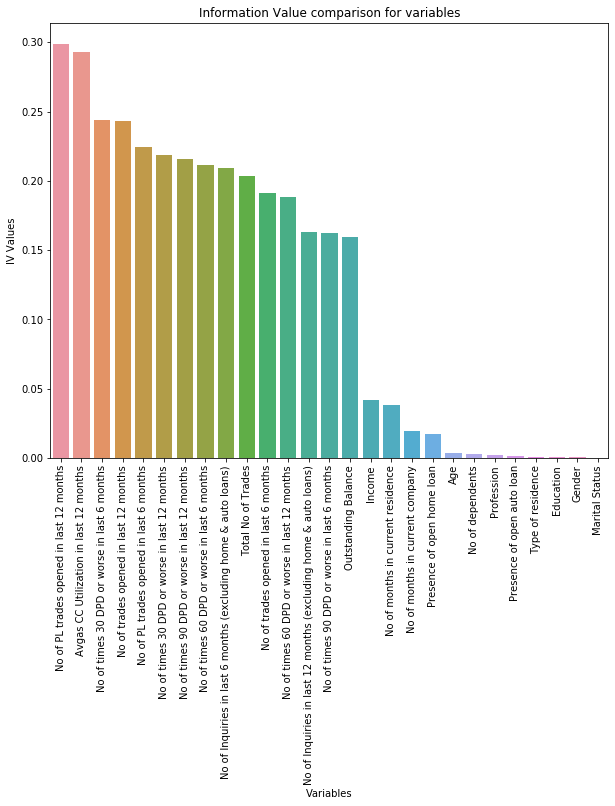

In [99]:
## Let's plot the IV values of the master dataset variables

# The below graph represents the variables and their Information Values for the master dataframe.
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Variable', y='IV', data=iv_m.sort_values(by='IV', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Information Value comparison for variables')
plt.xlabel('Variables')
plt.ylabel('IV Values')
plt.show()

In [100]:
# as mentioned before, IV value of less than 0.02 is not useful, lets filter the dataframe for features having IV value greater 
# than 0.02
master_imp = iv_m[iv_m["IV"] > 0.02]
master_imp.sort_values(by="IV",ascending = False)

,Variable,IV
0,No of PL trades opened in last 12 months,0.298981
0,Avgas CC Utilization in last 12 months,0.292840
0,No of times 30 DPD or worse in last 6 months,0.244237
0,No of trades opened in last 12 months,0.243495
0,No of PL trades opened in last 6 months,0.224242
0,No of times 30 DPD or worse in last 12 months,0.218599
0,No of times 90 DPD or worse in last 12 months,0.215644
0,No of times 60 DPD or worse in last 6 months,0.211263
0,No of Inquiries in last 6 months (excluding ho...,0.209320
0,Total No of Trades,0.203444


In [101]:
# Let's create a new dataset with WOE values called master_woe

master_woe = pd.DataFrame(master_copy).copy()

In [102]:
# Also, let's replace the actual values with WOE variables by creating woe transformed master dataset

#Binned data
for var in master_bins:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0)) 
        right = int(round(row.Cutoff.right,0))
        master_woe[var] = master_woe[var].replace(range(left,right),row.WoE)

In [103]:
#Non-Binned data
for var in master_vars:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        master_woe[var] = master_woe[var].replace(row.Cutoff,row.WoE)

In [104]:
# Let's look at "master_woe"
master_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,0.073437,-0.032174,0.004092,0.085222,0.239199,-0.017314,0.028409,0.004454,-0.032002,0.204217,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985
1,-0.027258,0.010147,0.004092,0.025204,0.391202,0.017931,0.013298,0.004454,-0.032002,0.083311,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,-0.071778,0.186740,0.542715,-0.011985
2,-0.027258,0.010147,-0.023327,0.085222,0.230548,-0.017314,0.013298,0.004454,0.125663,0.083311,...,0.657628,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985
3,0.021035,0.010147,0.004092,-0.040085,0.391202,-0.017314,-0.091424,0.004454,-0.049460,0.204217,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,-0.340984,0.542715,0.138368
4,-0.027258,-0.032174,0.004092,-0.004391,0.239199,0.017931,0.028409,0.004454,-0.032002,0.083311,...,0.657628,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985


In [105]:
# Let's do a sanity check
master_woe.isnull().sum()

Age                                                                0
Gender                                                             0
Marital Status                                                     0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag                                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in las

### WOE transformation for Rejected applicants from Demographic Dataset



In [106]:
# We saved rejected applicants data in rejected_demo earlier, let's check that
rejected_demo.head()

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
69603,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,18,NaN
69604,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,25,NaN
69605,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,31,NaN
69606,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,47,NaN
69607,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,49,NaN


In [107]:
# Let's take a look at null values
rejected_demo.isnull().sum().sort_values(ascending = False)

Performance Tag                      1425
No of months in current company         0
No of months in current residence       0
Type of residence                       0
Profession                              0
Education                               0
Income                                  0
No of dependents                        0
Marital Status                          0
Gender                                  0
Age                                     0
Application ID                          0
dtype: int64

In [108]:
# Marking "Performance Tag" as 1 as all these records are assumed to be defaulters 
rejected_demo["Performance Tag"] = rejected_demo["Performance Tag"].replace(np.nan,1)

In [109]:
rejected_demo.isnull().sum().sort_values(ascending = False)

Performance Tag                      0
No of months in current company      0
No of months in current residence    0
Type of residence                    0
Profession                           0
Education                            0
Income                               0
No of dependents                     0
Marital Status                       0
Gender                               0
Age                                  0
Application ID                       0
dtype: int64

In [110]:
# droping Application ID
rejected_demo_2 = rejected_demo.drop('Application ID',axis = 1)

In [111]:
# we will consider only those Columns which have more than 15 unique values for binning
#demographic data
rejected_demo_bins = []

rejected_demo_cols =rejected_demo_2.columns
for i in rejected_demo_cols:
    if rejected_demo_2[i].nunique() > 15:
        rejected_demo_bins.append(i)
        
rejected_demo_bins

['Age',
 'Income',
 'No of months in current residence',
 'No of months in current company']

In [112]:
#Non-binned variables
rejected_demo_vars = rejected_demo_2.columns.difference(rejected_demo_bins)
rejected_demo_vars

Index(['Education', 'Gender', 'Marital Status', 'No of dependents',
       'Performance Tag', 'Profession', 'Type of residence'],
      dtype='object')

In [113]:
# Let's build a new dataset with WOE values called rejected_demo_woe
rejected_demo_woe = pd.DataFrame(rejected_demo_2).copy()

In [114]:
#Replacing actual values with WOE variables
#Binned data
for var in rejected_demo_bins:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0)) 
        right = int(round(row.Cutoff.right,0))
        rejected_demo_woe[var] = rejected_demo_woe[var].replace(range(left,right),row.WoE)

In [115]:
#Non-Binned data
for var in rejected_demo_vars:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        rejected_demo_woe[var] = rejected_demo_woe[var].replace(row.Cutoff,row.WoE)

In [116]:
# Assign feature variable to X and response variable to y

X_test = rejected_demo.drop(['Performance Tag'],axis=1)
y_test = rejected_demo['Performance Tag']

In [117]:
# woe transformed dataset
rejected_demo_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
69603,-0.027258,0.010147,-0.023327,-0.040085,-0.337170,-0.017314,0.028409,0.004454,-0.421595,-0.161652,1.0
69604,0.073437,-0.032174,0.004092,0.025204,-0.117647,-0.007949,-0.091424,0.004454,-0.032002,0.016569,1.0
69605,0.021035,0.010147,0.004092,-0.053955,-0.337170,0.017931,-0.091424,0.004454,0.148090,0.016569,1.0
69606,-0.068679,0.010147,0.004092,-0.053955,-0.089365,-0.007949,0.028409,0.004454,0.148090,0.083311,1.0
69607,0.021035,-0.032174,0.004092,0.025204,-0.089365,0.029512,0.028409,0.004454,0.148090,0.083311,1.0


### WOE transformation for Rejected applicants from Master Dataset

In [118]:
# Let's check the dataset
rejected_master.head()

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,...,4.0,12,3,7,2,4,0.0,1309623.0,13,0
1,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,...,3.0,7,3,4,3,5,0.0,775626.0,7,0
2,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,...,2.0,7,2,4,0,3,0.0,732602.0,8,0
3,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,...,2.0,7,1,4,4,5,0.0,842057.0,8,0
4,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,...,3.0,7,2,3,3,6,0.0,786997.0,7,1


In [119]:
# Let's check null values
rejected_master.isnull().sum().sort_values(ascending = False)

Performance Tag                                                    1425
Avgas CC Utilization in last 12 months                               35
Presence of open auto loan                                            0
No of times 60 DPD or worse in last 6 months                          0
Age                                                                   0
Gender                                                                0
Marital Status                                                        0
No of dependents                                                      0
Income                                                                0
Education                                                             0
Profession                                                            0
Type of residence                                                     0
No of months in current residence                                     0
No of months in current company                                 

In [120]:
# Marking "Performance Tag" as 1 as all these records are assumed to be defaulters 
rejected_master["Performance Tag"] = rejected_master["Performance Tag"].replace(np.nan,1)

In [121]:
# since these are rejected applicants Avg CC util should be 0.
rejected_master.loc[rejected_master["Avgas CC Utilization in last 12 months"].isnull(),
                    "Avgas CC Utilization in last 12 months"] = 0

In [122]:
rejected_master.isnull().sum().sort_values(ascending = False)

Presence of open auto loan                                         0
No of times 60 DPD or worse in last 6 months                       0
Age                                                                0
Gender                                                             0
Marital Status                                                     0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag                                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in las

In [123]:
#droping Application ID
rejected_master_2 = rejected_master.drop('Application ID',axis = 1)

In [124]:
# We will consider only those Columns which have more than 15 unique values for binning
# Demographic data
rejected_master_bins = []

rejected_master_cols =rejected_master_2.columns
for i in rejected_master_cols:
    if rejected_master_2[i].nunique() > 15:
        rejected_master_bins.append(i)
        
rejected_master_bins

['Age',
 'Income',
 'No of months in current residence',
 'No of months in current company',
 'Avgas CC Utilization in last 12 months',
 'Outstanding Balance',
 'Total No of Trades']

In [125]:
#Non-binned variables

rejected_master_vars = rejected_master_2.columns.difference(rejected_master_bins)
rejected_master_vars

Index(['Education', 'Gender', 'Marital Status',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Performance Tag',
       'Presence of open auto loan', 'Presence of open home loan',
       'Profession', 'Type of residence'],
      dtype='object')

In [126]:
#Building a new dataset with WOE values called master_woe

rejected_master_woe = pd.DataFrame(rejected_master_2).copy()

In [127]:
#Replacing actual values with WOE variables
#Binned data
for var in rejected_master_bins:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        left = int(round(row.Cutoff.left,0)) 
        right = int(round(row.Cutoff.right,0))
        rejected_master_woe[var] = rejected_master_woe[var].replace(range(left,right),row.WoE)

In [128]:
#Non-Binned data
for var in rejected_master_vars:
    small_df = woe_m[woe_m['Variable'] == var]
    for index, row in small_df.iterrows():
        rejected_master_woe[var] = rejected_master_woe[var].replace(row.Cutoff,row.WoE)

In [129]:
# Putting feature variable to X
X_test = rejected_master.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_master['Performance Tag']

In [130]:
# woe transformed dataset
rejected_master_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,-0.027258,0.010147,-0.023327,-0.040085,-0.337170,-0.017314,0.028409,0.004454,-0.421595,-0.161652,...,-0.524277,12,-0.423615,-0.157721,-0.216097,4,-0.071778,-0.039272,-0.566631,-0.011985
1,0.073437,-0.032174,0.004092,0.025204,-0.117647,-0.007949,-0.091424,0.004454,-0.032002,0.016569,...,-0.435124,7,-0.423615,-0.500075,-0.554789,5,-0.071778,-0.449431,-0.394043,-0.011985
2,0.021035,0.010147,0.004092,-0.053955,-0.337170,0.017931,-0.091424,0.004454,0.148090,0.016569,...,-0.232861,7,-0.438436,-0.500075,0.718230,3,-0.071778,-0.449431,-0.394043,-0.011985
3,-0.068679,0.010147,0.004092,-0.053955,-0.089365,-0.007949,0.028409,0.004454,0.148090,0.083311,...,-0.232861,7,-0.199362,-0.500075,-0.428636,5,-0.071778,-0.449431,-0.394043,-0.011985
4,0.021035,-0.032174,0.004092,0.025204,-0.089365,0.029512,0.028409,0.004454,0.148090,0.083311,...,-0.435124,7,-0.438436,-0.412296,-0.554789,6,-0.071778,-0.449431,-0.394043,0.138368


## Model Building

### Logistic Regression on Demographic Data

In [131]:
# Create a function to print confusion metrics, sensitivity, specificity
def classification_metrics(actual,predicted):    
    confusion = metrics.confusion_matrix(actual, predicted)
    print("Confusion Metrics:\n",confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("\nAccuracy:{}".format(round((TP+TN)/(TP+TN+FP+FN),3)))
    print("Recall/Sensitivity:",recall_score(actual,predicted)) 
    print("Precision:",precision_score(actual,predicted))
    print("Specificity:{}".format(round(TN/float(TN+FP),3)))    

In [132]:
# Create function to draw the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
# let's check the shape of the woe transformed demographic dataset
demographic_woe.shape

(69867, 11)

In [134]:
# let's take a look at the woe transformed demographic dataset
demographic_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,0.073437,-0.032174,0.004092,0.085222,0.239199,-0.017314,0.028409,0.004454,-0.032002,0.204217,0.0
1,-0.027258,0.010147,0.004092,0.025204,0.391202,0.017931,0.013298,0.004454,-0.032002,0.083311,0.0
2,-0.027258,0.010147,-0.023327,0.085222,0.230548,-0.017314,0.013298,0.004454,0.125663,0.083311,0.0
3,0.021035,0.010147,0.004092,-0.040085,0.391202,-0.017314,-0.091424,0.004454,-0.049460,0.204217,0.0
4,-0.027258,-0.032174,0.004092,-0.004391,0.239199,0.017931,0.028409,0.004454,-0.032002,0.083311,0.0


In [135]:
# Assigning feature variable to X
X = demographic_woe.drop(['Performance Tag'],axis=1)

# Assigning response variable to y
y = demographic_woe['Performance Tag']

In [136]:
# let's check the X dataframe
X.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company
0,0.073437,-0.032174,0.004092,0.085222,0.239199,-0.017314,0.028409,0.004454,-0.032002,0.204217
1,-0.027258,0.010147,0.004092,0.025204,0.391202,0.017931,0.013298,0.004454,-0.032002,0.083311
2,-0.027258,0.010147,-0.023327,0.085222,0.230548,-0.017314,0.013298,0.004454,0.125663,0.083311
3,0.021035,0.010147,0.004092,-0.040085,0.391202,-0.017314,-0.091424,0.004454,-0.049460,0.204217
4,-0.027258,-0.032174,0.004092,-0.004391,0.239199,0.017931,0.028409,0.004454,-0.032002,0.083311


In [137]:
# let's check the y dataframe containing the target variable
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Performance Tag, dtype: float64

In [138]:
#we do not need data scaling here as the data is already scaled
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

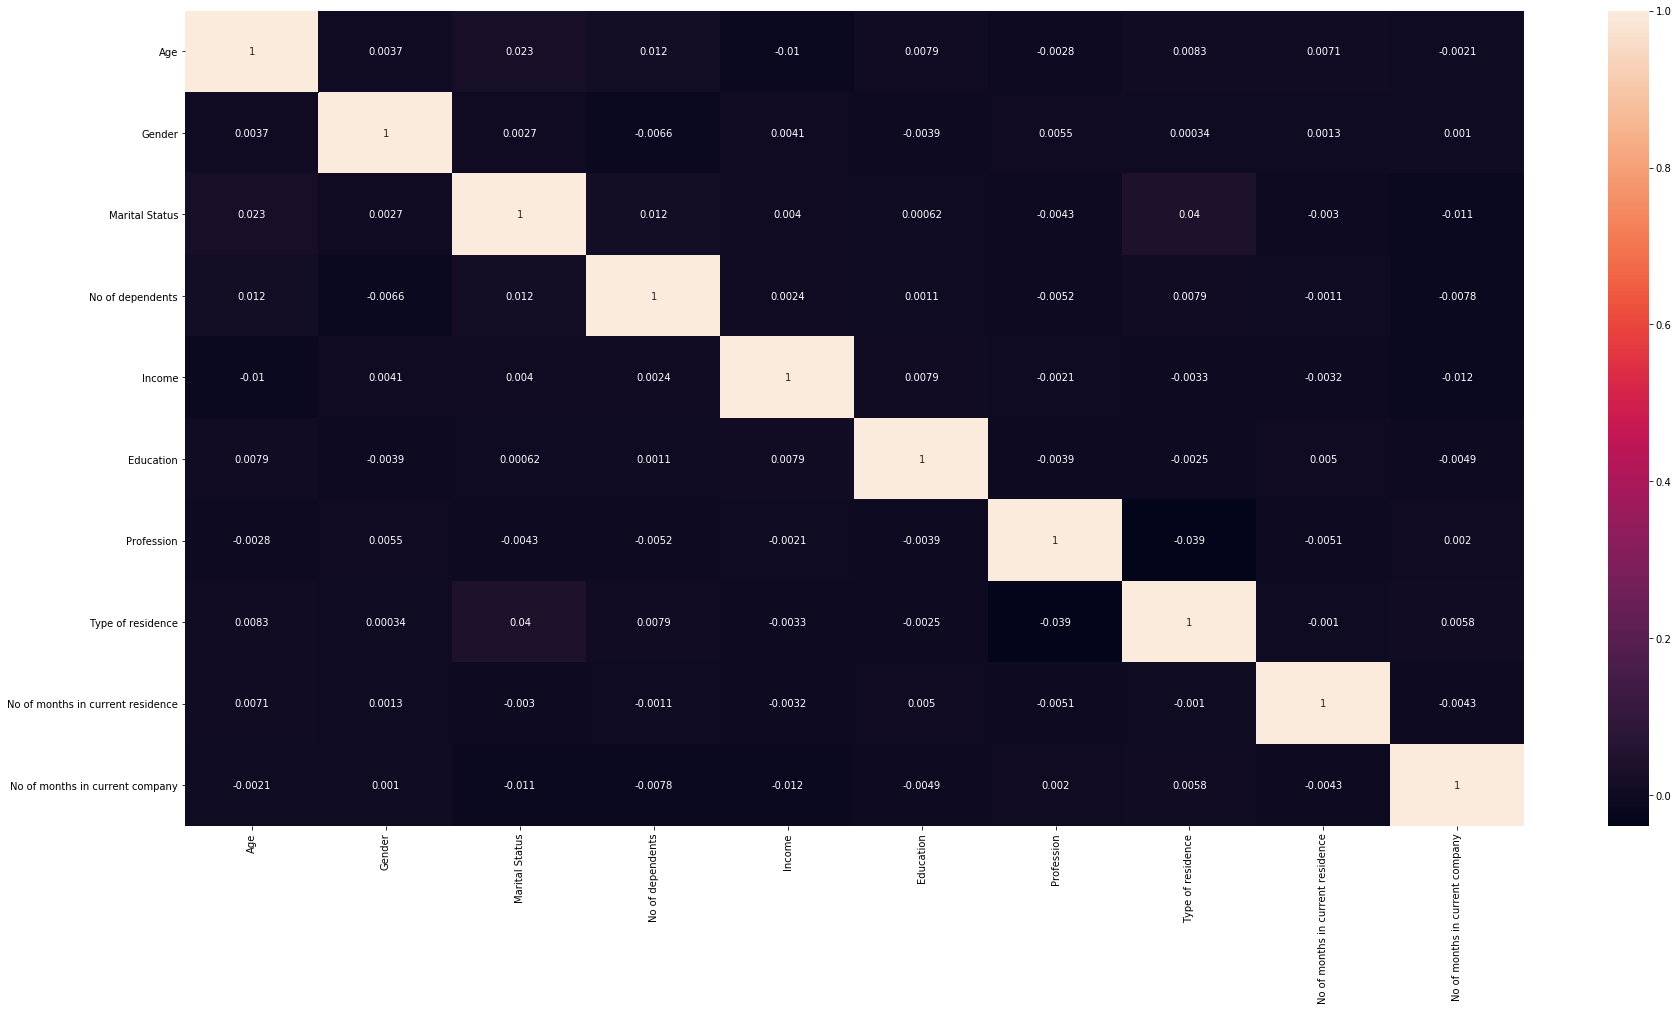

In [139]:
# heat map for the numerical variables 
plt.figure(figsize = (30, 15))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

Above graph shows there is very low correlation between variables.

In [140]:
# Check class imbalance
(y_train.value_counts()/y_train.shape)*100

# Dataset is imbalanced, we will handle it later

0.0    95.826688
1.0     4.173312
Name: Performance Tag, dtype: float64

In [141]:
# let's save all the variable except the target variable
col = demographic_woe.drop("Performance Tag",1).columns

In [142]:
# Default logistic regression model (For handling class imbalance we use class_weight="balanced")
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), class_weight="balanced",family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48895
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8444.9
Date:                Mon, 25 May 2020   Deviance:                       16890.
Time:                        15:05:31   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1394      0.023   -135.325      0.000      -3.185      -3.094
Age                                  -0.0002      0.003     -0.078      0.938      -0.006       0.006
Gender                               -1.1402      1.246     -0.915      0.360      -3.582       1.301
Marital Status                        2.2276      2.369      0.940      0.347      -2.415       6.870
No of dependents                     -1.6783      0.448     -3.748      0.000      -2.556      -0.801
Income                                0.0011      0.004      0.239      0.811      -0.008       0.010
Education                            -1.5902      0.697     -2.282      0.022      -2.956      -0.224
Profession                           -0.9372      0.473     -1.983      0.047      -1.864      -0.011
Type of residence                    -0.8976      0.795     -1.129      0.259      -2.456       0.661
No of months in current residence     0.0076      0.003      2.790      0.005       0.002       0.013
No of months in current company      -1.0495      0.163     -6.427      0.000      -1.370      -0.729
=====================================================================================================
"""

In [143]:
# p-value of the feauture Age is high, lets drop it and re create the model
col = col.drop('Age', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48896
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8444.9
Date:                Mon, 25 May 2020   Deviance:                       16890.
Time:                        15:05:31   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1396      0.023   -136.225      0.000      -3.185      -3.094
Gender                               -1.1405      1.246     -0.916      0.360      -3.582       1.301
Marital Status                        2.2236      2.368      0.939      0.348      -2.418       6.865
No of dependents                     -1.6787      0.448     -3.749      0.000      -2.556      -0.801
Income                                0.0011      0.004      0.240      0.810      -0.008       0.010
Education                            -1.5907      0.697     -2.283      0.022      -2.956      -0.225
Profession                           -0.9372      0.473     -1.983      0.047      -1.864      -0.011
Type of residence                    -0.8980      0.795     -1.129      0.259      -2.457       0.661
No of months in current residence     0.0076      0.003      2.790      0.005       0.002       0.013
No of months in current company      -1.0495      0.163     -6.427      0.000      -1.370      -0.729
=====================================================================================================
"""

In [144]:
# p-value of the feauture Income is high, lets drop it and re create the model
col = col.drop('Income', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48897
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8444.9
Date:                Mon, 25 May 2020   Deviance:                       16890.
Time:                        15:05:31   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1387      0.023   -137.771      0.000      -3.183      -3.094
Gender                               -1.1392      1.246     -0.915      0.360      -3.581       1.302
Marital Status                        2.2259      2.368      0.940      0.347      -2.416       6.868
No of dependents                     -1.6784      0.448     -3.749      0.000      -2.556      -0.801
Education                            -1.5892      0.697     -2.281      0.023      -2.955      -0.223
Profession                           -0.9374      0.473     -1.983      0.047      -1.864      -0.011
Type of residence                    -0.8983      0.795     -1.130      0.259      -2.457       0.660
No of months in current residence     0.0076      0.003      2.789      0.005       0.002       0.013
No of months in current company      -1.0499      0.163     -6.429      0.000      -1.370      -0.730
=====================================================================================================
"""

In [145]:
# p-value of the feauture Gender is high, lets drop it and re create the model
col = col.drop('Gender', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48898
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8445.3
Date:                Mon, 25 May 2020   Deviance:                       16891.
Time:                        15:05:31   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1387      0.023   -137.778      0.000      -3.183      -3.094
Marital Status                        2.2183      2.368      0.937      0.349      -2.423       6.860
No of dependents                     -1.6759      0.448     -3.743      0.000      -2.553      -0.798
Education                            -1.5859      0.697     -2.276      0.023      -2.951      -0.220
Profession                           -0.9400      0.473     -1.989      0.047      -1.866      -0.014
Type of residence                    -0.8990      0.795     -1.130      0.258      -2.458       0.660
No of months in current residence     0.0076      0.003      2.785      0.005       0.002       0.013
No of months in current company      -1.0500      0.163     -6.431      0.000      -1.370      -0.730
=====================================================================================================
"""

In [146]:
# p-value of the feauture Marital Status is high, lets drop it and re create the model
col = col.drop('Marital Status', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48899
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8445.8
Date:                Mon, 25 May 2020   Deviance:                       16892.
Time:                        15:05:32   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1385      0.023   -137.800      0.000      -3.183      -3.094
No of dependents                     -1.6694      0.447     -3.731      0.000      -2.546      -0.792
Education                            -1.5872      0.697     -2.278      0.023      -2.953      -0.222
Profession                           -0.9416      0.473     -1.992      0.046      -1.868      -0.015
Type of residence                    -0.8636      0.790     -1.094      0.274      -2.411       0.684
No of months in current residence     0.0076      0.003      2.781      0.005       0.002       0.013
No of months in current company      -1.0518      0.163     -6.442      0.000      -1.372      -0.732
=====================================================================================================
"""

In [147]:
# p-value of the feauture Type of residence is high, lets drop it and re create the model
col = col.drop('Type of residence', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48900
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8446.4
Date:                Mon, 25 May 2020   Deviance:                       16893.
Time:                        15:05:32   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1386      0.023   -137.812      0.000      -3.183      -3.094
No of dependents                     -1.6746      0.448     -3.741      0.000      -2.552      -0.797
Education                            -1.5862      0.697     -2.276      0.023      -2.953      -0.220
Profession                           -0.9177      0.472     -1.944      0.052      -1.843       0.008
No of months in current residence     0.0076      0.003      2.782      0.005       0.002       0.013
No of months in current company      -1.0530      0.163     -6.449      0.000      -1.373      -0.733
=====================================================================================================
"""

In [148]:
# p-value of the feauture Profession is high, lets drop it and re build the model
col = col.drop('Profession', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48901
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8448.3
Date:                Mon, 25 May 2020   Deviance:                       16897.
Time:                        15:05:32   Pearson chi2:                 4.89e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1385      0.023   -137.844      0.000      -3.183      -3.094
No of dependents                     -1.6710      0.448     -3.733      0.000      -2.548      -0.794
Education                            -1.5795      0.697     -2.266      0.023      -2.945      -0.214
No of months in current residence     0.0077      0.003      2.797      0.005       0.002       0.013
No of months in current company      -1.0546      0.163     -6.456      0.000      -1.375      -0.734
=====================================================================================================
"""

In [149]:
# p-values looks good now, lets check VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,No of dependents,1.0
1,Education,1.0
2,No of months in current residence,1.0
3,No of months in current company,1.0


In [150]:
# VIF also looks good , lets make predictions now on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

45073    0.053455
5295     0.041793
6910     0.042130
32987    0.039673
54702    0.048059
27469    0.033728
25840    0.036099
16415    0.036500
34331    0.035094
32355    0.039755
dtype: float64

In [151]:
# reshape the dataframe to get an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05345476, 0.0417934 , 0.04213042, 0.03967254, 0.04805937,
       0.03372782, 0.03609858, 0.03650044, 0.03509388, 0.03975519])

In [152]:
# Make a dataframe with the actual performance tag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Performance Tag':y_train.values, 'probability':y_train_pred})
y_train_pred_final['Application ID'] = y_train.index
y_train_pred_final.head()

,Performance Tag,probability,Application ID
0,1.0,0.053455,45073
1,0.0,0.041793,5295
2,0.0,0.042130,6910
3,0.0,0.039673,32987
4,0.0,0.048059,54702


In [153]:
# making the predictions based on the probability with the 0.1 cut-off value

y_train_pred_final['predicted'] = y_train_pred_final["probability"].map(lambda x: 1 if x > 0.1 else 0)

# Let's check the head
y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted
0,1.0,0.053455,45073,0
1,0.0,0.041793,5295,0
2,0.0,0.042130,6910,0
3,0.0,0.039673,32987,0
4,0.0,0.048059,54702,0


In [154]:
# let's check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model
classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["predicted"] )

print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[46797    68]
 [ 2036     5]]

Accuracy:0.957
Recall/Sensitivity: 0.002449779519843214
Precision: 0.0684931506849315
Specificity:0.999
AUC: 0.5508852373562705


Accuracy is good, but the sensitivity is too low on the training dataset.

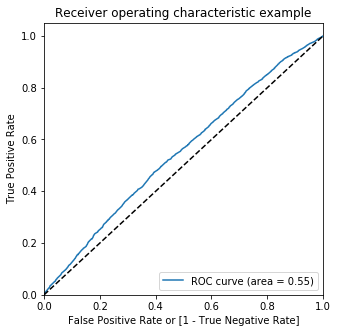

In [155]:
# using roc_cuve from the matrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Performance Tag"], y_train_pred_final.predicted, 
                                         drop_intermediate = False )
# draw ROC curve based on the probability values generated by the model
draw_roc(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"])

In [156]:
#let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.053455,45073,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.041793,5295,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.042130,6910,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.039673,32987,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.048059,54702,0,1,0,0,0,0,0,0,0,0,0


In [157]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Performance Tag"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy    sensi     speci
0.0   0.0  0.041733  1.00000  0.000000
0.1   0.1  0.956979  0.00245  0.998549
0.2   0.2  0.958246  0.00000  0.999979
0.3   0.3  0.958246  0.00000  0.999979
0.4   0.4  0.958267  0.00000  1.000000
0.5   0.5  0.958267  0.00000  1.000000
0.6   0.6  0.958267  0.00000  1.000000
0.7   0.7  0.958267  0.00000  1.000000
0.8   0.8  0.958267  0.00000  1.000000
0.9   0.9  0.958267  0.00000  1.000000


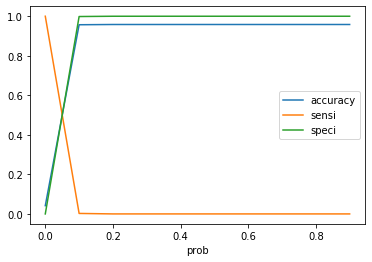

In [158]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From above plot we can conclude that optimal cutoff is 0.05

In [159]:
# let's make prediction using cut off point equal to 0.05 on train data set

y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.05 else 0)
y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.053455,45073,0,1,0,0,0,0,0,0,0,0,0,1
1,0.0,0.041793,5295,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.042130,6910,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.039673,32987,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.048059,54702,0,1,0,0,0,0,0,0,0,0,0,0


In [160]:
# let's check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model
classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["final_predicted"] )

print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[39391  7474]
 [ 1624   417]]

Accuracy:0.814
Recall/Sensitivity: 0.20431161195492406
Precision: 0.052845013306298316
Specificity:0.841
AUC: 0.5508852373562705


After finding the cutoff probabilty, even though accuracy dropped a bit but sensitivity improved. Sensitivity is still low.

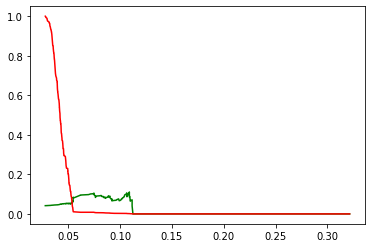

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Performance Tag"], y_train_pred_final.probability)
# precision and recall trade off plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Even though we have a good accuracy from the model built, but Sensitivity is very, which shows that predictive power of this model is not good.

### Predictions on test data set

In [162]:
# adding a constant to the test dataset
X_test_sm = sm.add_constant(X_test[col])

# making the prediction probabilities
y_test_pred = res.predict(X_test_sm)
# checking values
y_test_pred[:10]

37032    0.047942
58018    0.052780
5851     0.035666
5330     0.034942
35398    0.039755
18983    0.037859
36426    0.037324
11256    0.044764
4614     0.036444
14509    0.032852
dtype: float64

In [163]:
# Reshape to create an array
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.04794194, 0.05278016, 0.03566647, 0.0349423 , 0.03975519,
       0.03785947, 0.0373243 , 0.04476384, 0.03644385, 0.0328518 ])

In [164]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application ID'] = y_test.index
y_test_pred_final.head()

,Performance Tag,probability,Application ID
0,0.0,0.047942,37032
1,0.0,0.052780,58018
2,0.0,0.035666,5851
3,0.0,0.034942,5330
4,0.0,0.039755,35398


In [165]:
# Create new column 'predicted' with 1 if probability > 0.05 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.05 else 0)

# Let's see the head
y_test_pred_final.head()

,Performance Tag,probability,Application ID,predicted
0,0.0,0.047942,37032,0
1,0.0,0.052780,58018,1
2,0.0,0.035666,5851,0
3,0.0,0.034942,5330,0
4,0.0,0.039755,35398,0


In [166]:
classification_metrics(y_test_pred_final["Performance Tag"], y_test_pred_final["predicted"] )

Confusion Metrics:
 [[16742  3313]
 [  740   166]]

Accuracy:0.807
Recall/Sensitivity: 0.18322295805739514
Precision: 0.047714860592124174
Specificity:0.835


Sensitivity and Precision dropped even further on the test dataset.

#### Additional predictions on rejected applicants

In [167]:
# we had saved all the records with null values for perfromance tag to dataframe called rejected_demo_woe
rejected_demo_woe.shape

(1425, 11)

In [168]:
rejected_demo_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
69603,-0.027258,0.010147,-0.023327,-0.040085,-0.337170,-0.017314,0.028409,0.004454,-0.421595,-0.161652,1.0
69604,0.073437,-0.032174,0.004092,0.025204,-0.117647,-0.007949,-0.091424,0.004454,-0.032002,0.016569,1.0
69605,0.021035,0.010147,0.004092,-0.053955,-0.337170,0.017931,-0.091424,0.004454,0.148090,0.016569,1.0
69606,-0.068679,0.010147,0.004092,-0.053955,-0.089365,-0.007949,0.028409,0.004454,0.148090,0.083311,1.0
69607,0.021035,-0.032174,0.004092,0.025204,-0.089365,0.029512,0.028409,0.004454,0.148090,0.083311,1.0


In [169]:
# Putting feature variable to X
X_test = rejected_demo_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_demo_woe['Performance Tag']

In [170]:
# adding constant to the test dataset
X_test_sm = sm.add_constant(X_test[col])

# making prediction probabilities
y_test_pred = res.predict(X_test_sm)
# checking values
y_test_pred[:10]

69603    0.053304
69604    0.039703
69605    0.043395
69606    0.042186
69607    0.035094
69608    0.050816
69609    0.041459
69610    0.035779
69611    0.054628
69612    0.048259
dtype: float64

In [171]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.05330393, 0.03970255, 0.04339475, 0.04218614, 0.03509388,
       0.05081562, 0.04145899, 0.03577902, 0.05462768, 0.04825945])

In [172]:
# Create a dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application ID'] = y_test.index
y_test_pred_final.head()

,Performance Tag,probability,Application ID
0,1.0,0.053304,69603
1,1.0,0.039703,69604
2,1.0,0.043395,69605
3,1.0,0.042186,69606
4,1.0,0.035094,69607


In [173]:
# Create new column 'predicted' with 1 if probability > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.05 else 0)

# Let's see the head
y_test_pred_final.head()

,Performance Tag,probability,Application ID,predicted
0,1.0,0.053304,69603,1
1,1.0,0.039703,69604,0
2,1.0,0.043395,69605,0
3,1.0,0.042186,69606,0
4,1.0,0.035094,69607,0


In [174]:
classification_metrics(y_test_pred_final["Performance Tag"], y_test_pred_final["predicted"] )

Confusion Metrics:
 [[  0   0]
 [889 536]]

Accuracy:0.376
Recall/Sensitivity: 0.376140350877193
Precision: 1.0
Specificity:nan


Accuracy dropped significantly on the test data, sensitivity has improved but its still very low. we can conclude that the model built above has weak predictive power.

### Model Building on WOE Transformed Master DataSet

In [175]:
# let's check the dimensions of the woe transformed master dataset
master_woe.shape

(69867, 28)

In [176]:
master_woe.describe()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
count,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,...,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,69867.000000,6.986700e+04,69867.000000,69867.000000
mean,0.884496,0.000149,0.000044,0.001219,0.746114,0.000337,0.001009,0.000448,0.268321,0.010352,...,0.089828,0.117933,0.107487,0.148135,0.101243,-0.022702,0.007999,7.477195e+01,0.093272,0.000777
std,7.528041,0.017977,0.009728,0.051822,4.887136,0.026011,0.046524,0.032852,5.637050,0.521206,...,0.447985,0.549044,0.495493,0.595471,0.486060,0.424549,0.135063,1.974398e+04,0.490721,0.041903
min,-0.068679,-0.032174,-0.023327,-0.053955,-0.337170,-0.492622,-0.091424,-0.080147,-0.421595,-2.429563,...,-0.524277,-0.564318,-0.438436,-0.925486,-0.554789,-0.520996,-0.071778,-4.494312e-01,-0.566631,-0.011985
25%,-0.029068,0.010147,0.004092,-0.040085,-0.089365,-0.007949,0.013298,0.004454,-0.062112,-0.161652,...,-0.332298,-0.351122,-0.423615,-0.412296,-0.216097,-0.305106,-0.071778,-3.409836e-01,-0.394043,-0.011985
50%,0.004443,0.010147,0.004092,-0.004391,0.120508,-0.007949,0.028409,0.004454,0.148090,0.016569,...,-0.069072,0.080607,-0.199362,-0.157721,-0.177072,-0.305106,-0.071778,1.867400e-01,0.243045,-0.011985
75%,0.024856,0.010147,0.004092,0.025204,0.239199,0.017931,0.028409,0.004454,0.148090,0.083311,...,0.479566,0.675361,0.649212,0.893811,0.718230,0.498244,0.236658,1.867400e-01,0.542715,-0.011985
max,65.000000,0.010147,0.004092,0.085222,60.000000,0.029512,0.028409,0.530542,126.000000,133.000000,...,0.657628,28.000000,0.649212,0.893811,0.847582,20.000000,0.236658,5.218801e+06,44.000000,0.138368


In [177]:
# let's display the woe transformed demographic dataset
master_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,0.073437,-0.032174,0.004092,0.085222,0.239199,-0.017314,0.028409,0.004454,-0.032002,0.204217,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985
1,-0.027258,0.010147,0.004092,0.025204,0.391202,0.017931,0.013298,0.004454,-0.032002,0.083311,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,-0.071778,0.186740,0.542715,-0.011985
2,-0.027258,0.010147,-0.023327,0.085222,0.230548,-0.017314,0.013298,0.004454,0.125663,0.083311,...,0.657628,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985
3,0.021035,0.010147,0.004092,-0.040085,0.391202,-0.017314,-0.091424,0.004454,-0.049460,0.204217,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,-0.340984,0.542715,0.138368
4,-0.027258,-0.032174,0.004092,-0.004391,0.239199,0.017931,0.028409,0.004454,-0.032002,0.083311,...,0.657628,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985


In [178]:
master_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Age                                                              69867 non-null  float64
 1   Gender                                                           69867 non-null  float64
 2   Marital Status                                                   69867 non-null  float64
 3   No of dependents                                                 69867 non-null  float64
 4   Income                                                           69867 non-null  float64
 5   Education                                                        69867 non-null  float64
 6   Profession                                                       69867 non-null  float64
 7   Type of residence                       

In [179]:
# Assigning feature variable to X
X = master_woe.drop(['Performance Tag'],axis=1)

# Assigning response variable to y
y = master_woe['Performance Tag']

In [180]:
# lets check the X dataframe
X.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,0.073437,-0.032174,0.004092,0.085222,0.239199,-0.017314,0.028409,0.004454,-0.032002,0.204217,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985
1,-0.027258,0.010147,0.004092,0.025204,0.391202,0.017931,0.013298,0.004454,-0.032002,0.083311,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,-0.071778,0.186740,0.542715,-0.011985
2,-0.027258,0.010147,-0.023327,0.085222,0.230548,-0.017314,0.013298,0.004454,0.125663,0.083311,...,0.657628,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985
3,0.021035,0.010147,0.004092,-0.040085,0.391202,-0.017314,-0.091424,0.004454,-0.049460,0.204217,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,-0.340984,0.542715,0.138368
4,-0.027258,-0.032174,0.004092,-0.004391,0.239199,0.017931,0.028409,0.004454,-0.032002,0.083311,...,0.657628,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985


In [181]:
# let's check the y dataframe which contains the target variable
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Performance Tag, dtype: float64

In [182]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [183]:
X_train.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
45071,-0.029068,-0.032174,0.004092,-0.040085,-0.117647,-0.017314,-0.091424,-0.004149,-0.032002,-0.161652,...,0.479566,0.675361,-0.199362,-0.251340,-0.177072,0.498244,-0.071778,0.186740,0.542715,-0.011985
5295,-0.027258,0.010147,-0.023327,-0.040085,-0.117647,-0.017314,0.028409,0.004454,-0.032002,0.083311,...,0.479566,0.675361,0.649212,0.893811,0.718230,0.498244,-0.071778,0.186740,0.542715,-0.011985
6910,-0.029068,-0.032174,0.004092,-0.053955,-0.117647,-0.007949,-0.091424,0.004454,-0.032002,0.083311,...,0.657628,0.675361,0.649212,0.893811,0.718230,0.498244,-0.071778,0.186740,0.542715,-0.011985
32986,-0.027258,-0.032174,0.004092,-0.040085,-0.089365,0.017931,0.013298,0.004454,0.148090,0.083311,...,-0.069072,-0.351122,-0.423615,-0.500075,-0.171627,0.169477,-0.071778,-0.449431,0.018415,-0.011985
54700,-0.029068,0.010147,0.004092,0.025204,0.239199,-0.017314,-0.091424,0.004454,-0.421595,-0.161652,...,-0.524277,-0.351122,-0.423615,-0.378292,-0.554789,-0.305106,0.236658,-0.072432,-0.566631,-0.011985


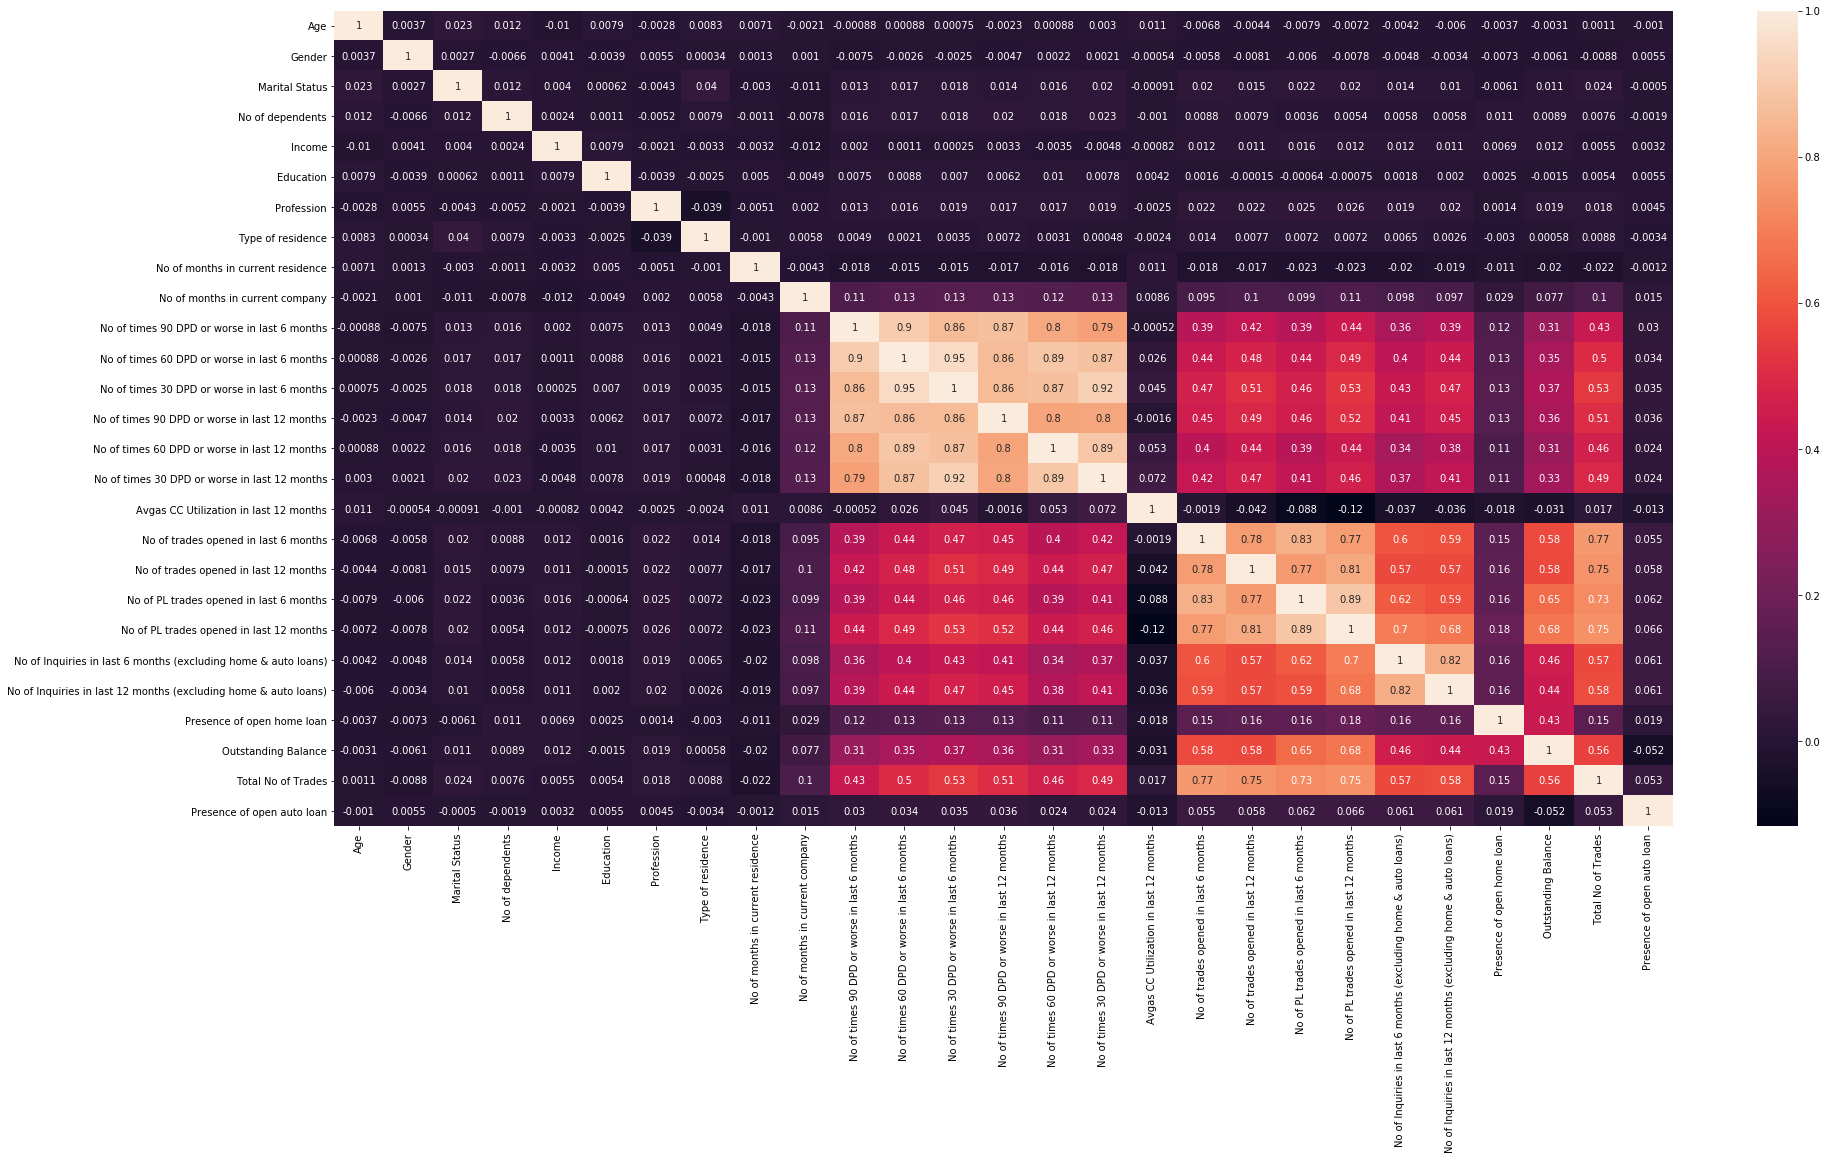

In [184]:
# heat map for the numerical variables 
plt.figure(figsize = (30, 15))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

There seems to be high correlation between certain variables.

In [185]:
# check class imbalance
(y_train.value_counts()/y_train.shape)*100

0.0    95.826688
1.0     4.173312
Name: Performance Tag, dtype: float64

#### Here we can see that data in highly imbalanced. We will handle it at the time of model building

In [186]:
# lets save all the variable except the target variable
col = master_woe.drop("Performance Tag",1).columns
col

Index(['Age', 'Gender', 'Marital Status', 'No of dependents', 'Income',
       'Education', 'Profession', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'T

In [187]:
# Default logistic regression model with class_weight="balanced" to handle class imbalance
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), class_weight="balanced",family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48878
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 25 May 2020   Deviance:                       16211.
Time:                        15:05:39   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1956      0.029   -111.416      0.000      -3.252      -3.139
Age                                                                -0.0004      0.003     -0.132      0.895      -0.006       0.006
Gender                                                             -1.2889      1.256     -1.027      0.305      -3.750       1.172
Marital Status                                                      3.6470      2.386      1.529      0.126      -1.029       8.323
No of dependents                                                   -1.4885      0.450     -3.311      0.001      -2.370      -0.607
Income                                                              0.0026      0.005      0.532      0.595      -0.007       0.012
Education                                                          -1.5059      0.703     -2.143      0.032      -2.883      -0.129
Profession                                                         -0.6320      0.476     -1.327      0.185      -1.566       0.302
Type of residence                                                  -0.8071      0.786     -1.027      0.304      -2.347       0.733
No of months in current residence                                   0.0051      0.003      1.900      0.057      -0.000       0.010
No of months in current company                                    -0.4394      0.169     -2.607      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2041      0.124      1.646      0.100      -0.039       0.447
No of times 60 DPD or worse in last 6 months                       -0.1160      0.181     -0.641      0.522      -0.471       0.239
No of times 30 DPD or worse in last 6 months                       -0.1128      0.177     -0.636      0.525      -0.460       0.235
No of times 90 DPD or worse in last 12 months                      -0.2192      0.103     -2.122      0.034      -0.422      -0.017
No of times 60 DPD or worse in last 12 months                       0.0399      0.135      0.295      0.768      -0.225       0.305
No of times 30 DPD or worse in last 12 months                      -0.3176      0.138     -2.296      0.022      -0.589      -0.046
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.973      0.330      -0.001       0.003
No of trades opened in last 6 months                               -0.0096      0.102     -0.094      0.925      -0.209       0.190
No of trades opened in last 12 months                               0.0398      0.062      0.642      0.521      -0.082       0.161
No of PL trades opened in last 6 months        

In [188]:
# p-value of the feauture presence of home loan is high, lets drop it and re create the model
col = col.drop('Presence of open home loan', 1)

X_train_sm = sm.add_constant(X_train[col])
# class_weight="balanced" will take care of the class imbalance in the dataset
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48879
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 25 May 2020   Deviance:                       16211.
Time:                        15:05:39   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1956      0.029   -111.432      0.000      -3.252      -3.139
Age                                                                -0.0004      0.003     -0.132      0.895      -0.006       0.006
Gender                                                             -1.2894      1.256     -1.027      0.304      -3.750       1.171
Marital Status                                                      3.6463      2.386      1.528      0.126      -1.030       8.322
No of dependents                                                   -1.4883      0.449     -3.311      0.001      -2.369      -0.607
Income                                                              0.0026      0.005      0.532      0.594      -0.007       0.012
Education                                                          -1.5059      0.703     -2.143      0.032      -2.883      -0.128
Profession                                                         -0.6320      0.476     -1.327      0.185      -1.566       0.302
Type of residence                                                  -0.8071      0.786     -1.027      0.304      -2.347       0.733
No of months in current residence                                   0.0051      0.003      1.900      0.057      -0.000       0.010
No of months in current company                                    -0.4394      0.169     -2.607      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2041      0.124      1.646      0.100      -0.039       0.447
No of times 60 DPD or worse in last 6 months                       -0.1159      0.181     -0.641      0.522      -0.471       0.239
No of times 30 DPD or worse in last 6 months                       -0.1128      0.177     -0.636      0.525      -0.460       0.235
No of times 90 DPD or worse in last 12 months                      -0.2192      0.103     -2.121      0.034      -0.422      -0.017
No of times 60 DPD or worse in last 12 months                       0.0399      0.135      0.295      0.768      -0.225       0.305
No of times 30 DPD or worse in last 12 months                      -0.3176      0.138     -2.296      0.022      -0.589      -0.046
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.973      0.331      -0.001       0.003
No of trades opened in last 6 months                               -0.0096      0.102     -0.095      0.925      -0.209       0.190
No of trades opened in last 12 months                               0.0398      0.062      0.643      0.520      -0.082       0.161
No of PL trades opened in last 6 months        

In [189]:
# p-value of the feauture "No of trades opened in last 6 months" is high, lets drop it and re create the model
col = col.drop('No of trades opened in last 6 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48880
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 25 May 2020   Deviance:                       16211.
Time:                        15:05:40   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1956      0.029   -111.432      0.000      -3.252      -3.139
Age                                                                -0.0004      0.003     -0.131      0.895      -0.006       0.006
Gender                                                             -1.2900      1.256     -1.028      0.304      -3.751       1.171
Marital Status                                                      3.6469      2.386      1.529      0.126      -1.029       8.323
No of dependents                                                   -1.4887      0.449     -3.312      0.001      -2.370      -0.608
Income                                                              0.0026      0.005      0.532      0.595      -0.007       0.012
Education                                                          -1.5055      0.703     -2.143      0.032      -2.883      -0.128
Profession                                                         -0.6319      0.476     -1.327      0.185      -1.566       0.302
Type of residence                                                  -0.8083      0.785     -1.029      0.303      -2.348       0.731
No of months in current residence                                   0.0051      0.003      1.900      0.057      -0.000       0.010
No of months in current company                                    -0.4393      0.169     -2.607      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2041      0.124      1.645      0.100      -0.039       0.447
No of times 60 DPD or worse in last 6 months                       -0.1158      0.181     -0.640      0.522      -0.470       0.239
No of times 30 DPD or worse in last 6 months                       -0.1129      0.177     -0.636      0.525      -0.460       0.235
No of times 90 DPD or worse in last 12 months                      -0.2192      0.103     -2.122      0.034      -0.422      -0.017
No of times 60 DPD or worse in last 12 months                       0.0399      0.135      0.295      0.768      -0.225       0.305
No of times 30 DPD or worse in last 12 months                      -0.3177      0.138     -2.297      0.022      -0.589      -0.047
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.968      0.333      -0.001       0.003
No of trades opened in last 12 months                               0.0386      0.061      0.631      0.528      -0.081       0.158
No of PL trades opened in last 6 months                            -0.0284      0.098     -0.291      0.771      -0.220       0.163
No of PL trades opened in last 12 months       

In [190]:
# p-value of the feauture "Total No of Trades" is high, lets drop it and re create the model
col = col.drop('Total No of Trades', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48881
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 25 May 2020   Deviance:                       16211.
Time:                        15:05:40   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1956      0.029   -111.433      0.000      -3.252      -3.139
Age                                                                -0.0004      0.003     -0.131      0.896      -0.006       0.006
Gender                                                             -1.2908      1.255     -1.028      0.304      -3.752       1.170
Marital Status                                                      3.6508      2.386      1.530      0.126      -1.025       8.326
No of dependents                                                   -1.4888      0.449     -3.312      0.001      -2.370      -0.608
Income                                                              0.0026      0.005      0.531      0.595      -0.007       0.012
Education                                                          -1.5047      0.703     -2.141      0.032      -2.882      -0.128
Profession                                                         -0.6325      0.476     -1.328      0.184      -1.566       0.301
Type of residence                                                  -0.8079      0.785     -1.029      0.304      -2.347       0.732
No of months in current residence                                   0.0051      0.003      1.899      0.058      -0.000       0.010
No of months in current company                                    -0.4394      0.169     -2.607      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2032      0.124      1.641      0.101      -0.040       0.446
No of times 60 DPD or worse in last 6 months                       -0.1164      0.181     -0.644      0.520      -0.471       0.238
No of times 30 DPD or worse in last 6 months                       -0.1118      0.177     -0.631      0.528      -0.459       0.235
No of times 90 DPD or worse in last 12 months                      -0.2185      0.103     -2.118      0.034      -0.421      -0.016
No of times 60 DPD or worse in last 12 months                       0.0406      0.135      0.300      0.764      -0.224       0.305
No of times 30 DPD or worse in last 12 months                      -0.3172      0.138     -2.294      0.022      -0.588      -0.046
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.987      0.324      -0.001       0.003
No of trades opened in last 12 months                               0.0405      0.058      0.695      0.487      -0.074       0.155
No of PL trades opened in last 6 months                            -0.0257      0.095     -0.269      0.788      -0.212       0.161
No of PL trades opened in last 12 months       

In [191]:
# p-value of the feauture "Age" is high, lets drop it and re create the model
col = col.drop('Age', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48882
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 25 May 2020   Deviance:                       16211.
Time:                        15:05:41   Pearson chi2:                 4.84e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1959      0.029   -111.911      0.000      -3.252      -3.140
Gender                                                             -1.2912      1.255     -1.028      0.304      -3.752       1.169
Marital Status                                                      3.6444      2.385      1.528      0.127      -1.030       8.319
No of dependents                                                   -1.4894      0.449     -3.314      0.001      -2.370      -0.609
Income                                                              0.0026      0.005      0.533      0.594      -0.007       0.012
Education                                                          -1.5054      0.703     -2.142      0.032      -2.883      -0.128
Profession                                                         -0.6324      0.476     -1.328      0.184      -1.566       0.301
Type of residence                                                  -0.8085      0.785     -1.029      0.303      -2.348       0.731
No of months in current residence                                   0.0051      0.003      1.897      0.058      -0.000       0.010
No of months in current company                                    -0.4394      0.169     -2.608      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2032      0.124      1.641      0.101      -0.040       0.446
No of times 60 DPD or worse in last 6 months                       -0.1165      0.181     -0.644      0.519      -0.471       0.238
No of times 30 DPD or worse in last 6 months                       -0.1116      0.177     -0.630      0.529      -0.459       0.236
No of times 90 DPD or worse in last 12 months                      -0.2184      0.103     -2.117      0.034      -0.421      -0.016
No of times 60 DPD or worse in last 12 months                       0.0406      0.135      0.300      0.764      -0.224       0.305
No of times 30 DPD or worse in last 12 months                      -0.3173      0.138     -2.295      0.022      -0.588      -0.046
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.986      0.324      -0.001       0.003
No of trades opened in last 12 months                               0.0405      0.058      0.694      0.488      -0.074       0.155
No of PL trades opened in last 6 months                            -0.0256      0.095     -0.268      0.788      -0.212       0.161
No of PL trades opened in last 12 months                           -0.4131      0.106     -3.905      0.000      -0.620      -0.206
No of Inquiries in last 6 months (excluding hom

In [192]:
# p-value of the feauture "No of PL trades opened in last 6 months" is high, lets drop it and re create the model
col = col.drop('No of PL trades opened in last 6 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48883
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.5
Date:                Mon, 25 May 2020   Deviance:                       16211.
Time:                        15:05:41   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1958      0.029   -111.930      0.000      -3.252      -3.140
Gender                                                             -1.2925      1.255     -1.030      0.303      -3.753       1.168
Marital Status                                                      3.6384      2.385      1.526      0.127      -1.036       8.313
No of dependents                                                   -1.4888      0.449     -3.313      0.001      -2.370      -0.608
Income                                                              0.0026      0.005      0.530      0.596      -0.007       0.012
Education                                                          -1.5050      0.703     -2.142      0.032      -2.882      -0.128
Profession                                                         -0.6328      0.476     -1.328      0.184      -1.566       0.301
Type of residence                                                  -0.8101      0.786     -1.031      0.302      -2.350       0.730
No of months in current residence                                   0.0051      0.003      1.899      0.058      -0.000       0.010
No of months in current company                                    -0.4394      0.169     -2.607      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2032      0.124      1.641      0.101      -0.040       0.446
No of times 60 DPD or worse in last 6 months                       -0.1170      0.181     -0.647      0.518      -0.472       0.237
No of times 30 DPD or worse in last 6 months                       -0.1107      0.177     -0.625      0.532      -0.458       0.236
No of times 90 DPD or worse in last 12 months                      -0.2182      0.103     -2.116      0.034      -0.420      -0.016
No of times 60 DPD or worse in last 12 months                       0.0407      0.135      0.302      0.763      -0.224       0.306
No of times 30 DPD or worse in last 12 months                      -0.3176      0.138     -2.298      0.022      -0.589      -0.047
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.984      0.325      -0.001       0.003
No of trades opened in last 12 months                               0.0378      0.059      0.645      0.519      -0.077       0.153
No of PL trades opened in last 12 months                           -0.4284      0.089     -4.797      0.000      -0.603      -0.253
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0973      0.087     -1.117      0.264      -0.268       0.073
No of Inquiries in last 12 months (excluding ho

In [193]:
# p-value of the feauture "Presence of open auto loan" is high, lets drop it and re create the model
col = col.drop('Presence of open auto loan', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48884
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.6
Date:                Mon, 25 May 2020   Deviance:                       16211.
Time:                        15:05:42   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1959      0.029   -111.933      0.000      -3.252      -3.140
Gender                                                             -1.2940      1.255     -1.031      0.303      -3.755       1.167
Marital Status                                                      3.6385      2.385      1.526      0.127      -1.036       8.313
No of dependents                                                   -1.4887      0.449     -3.312      0.001      -2.370      -0.608
Income                                                              0.0026      0.005      0.530      0.596      -0.007       0.012
Education                                                          -1.5064      0.702     -2.144      0.032      -2.883      -0.130
Profession                                                         -0.6338      0.476     -1.330      0.183      -1.567       0.300
Type of residence                                                  -0.8094      0.786     -1.030      0.303      -2.349       0.730
No of months in current residence                                   0.0051      0.003      1.900      0.057      -0.000       0.010
No of months in current company                                    -0.4396      0.169     -2.609      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.2033      0.124      1.642      0.101      -0.039       0.446
No of times 60 DPD or worse in last 6 months                       -0.1173      0.181     -0.649      0.517      -0.472       0.237
No of times 30 DPD or worse in last 6 months                       -0.1109      0.177     -0.626      0.531      -0.458       0.236
No of times 90 DPD or worse in last 12 months                      -0.2182      0.103     -2.116      0.034      -0.420      -0.016
No of times 60 DPD or worse in last 12 months                       0.0408      0.135      0.302      0.763      -0.224       0.306
No of times 30 DPD or worse in last 12 months                      -0.3173      0.138     -2.295      0.022      -0.588      -0.046
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.983      0.326      -0.001       0.003
No of trades opened in last 12 months                               0.0374      0.059      0.638      0.523      -0.077       0.152
No of PL trades opened in last 12 months                           -0.4301      0.089     -4.825      0.000      -0.605      -0.255
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0974      0.087     -1.118      0.264      -0.268       0.073
No of Inquiries in last 12 months (excluding ho

In [194]:
# p-value of the feauture "No of times 60 DPD or worse in last 12 months" is high, let's drop it
col = col.drop('No of times 60 DPD or worse in last 12 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48885
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.6
Date:                Mon, 25 May 2020   Deviance:                       16211.
Time:                        15:05:42   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1959      0.029   -111.930      0.000      -3.252      -3.140
Gender                                                             -1.2929      1.255     -1.030      0.303      -3.754       1.168
Marital Status                                                      3.6344      2.385      1.524      0.128      -1.040       8.309
No of dependents                                                   -1.4890      0.449     -3.313      0.001      -2.370      -0.608
Income                                                              0.0026      0.005      0.530      0.596      -0.007       0.012
Education                                                          -1.5047      0.703     -2.142      0.032      -2.882      -0.128
Profession                                                         -0.6332      0.476     -1.329      0.184      -1.567       0.300
Type of residence                                                  -0.8080      0.785     -1.029      0.304      -2.347       0.731
No of months in current residence                                   0.0051      0.003      1.900      0.057      -0.000       0.010
No of months in current company                                    -0.4384      0.168     -2.602      0.009      -0.769      -0.108
No of times 90 DPD or worse in last 6 months                        0.2026      0.124      1.636      0.102      -0.040       0.445
No of times 60 DPD or worse in last 6 months                       -0.0938      0.163     -0.575      0.565      -0.414       0.226
No of times 30 DPD or worse in last 6 months                       -0.1147      0.177     -0.650      0.516      -0.461       0.231
No of times 90 DPD or worse in last 12 months                      -0.2153      0.103     -2.097      0.036      -0.417      -0.014
No of times 30 DPD or worse in last 12 months                      -0.3022      0.129     -2.345      0.019      -0.555      -0.050
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.997      0.319      -0.001       0.003
No of trades opened in last 12 months                               0.0379      0.058      0.649      0.516      -0.077       0.152
No of PL trades opened in last 12 months                           -0.4307      0.089     -4.836      0.000      -0.605      -0.256
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0979      0.087     -1.124      0.261      -0.269       0.073
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4406      0.110     -3.989      0.000      -0.657      -0.224
Outstanding Balance                            

In [195]:
#p-value of the feauture "Income" is high, let's drop it
col = col.drop('Income', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48886
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.7
Date:                Mon, 25 May 2020   Deviance:                       16211.
Time:                        15:05:42   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1939      0.028   -112.927      0.000      -3.249      -3.138
Gender                                                             -1.2895      1.255     -1.027      0.304      -3.750       1.171
Marital Status                                                      3.6386      2.385      1.526      0.127      -1.036       8.313
No of dependents                                                   -1.4885      0.449     -3.312      0.001      -2.369      -0.608
Education                                                          -1.5013      0.703     -2.137      0.033      -2.878      -0.124
Profession                                                         -0.6340      0.476     -1.331      0.183      -1.568       0.300
Type of residence                                                  -0.8092      0.785     -1.031      0.303      -2.348       0.730
No of months in current residence                                   0.0051      0.003      1.896      0.058      -0.000       0.010
No of months in current company                                    -0.4389      0.168     -2.605      0.009      -0.769      -0.109
No of times 90 DPD or worse in last 6 months                        0.2026      0.124      1.636      0.102      -0.040       0.445
No of times 60 DPD or worse in last 6 months                       -0.0935      0.163     -0.573      0.567      -0.413       0.226
No of times 30 DPD or worse in last 6 months                       -0.1148      0.177     -0.650      0.515      -0.461       0.231
No of times 90 DPD or worse in last 12 months                      -0.2152      0.103     -2.096      0.036      -0.416      -0.014
No of times 30 DPD or worse in last 12 months                      -0.3028      0.129     -2.350      0.019      -0.555      -0.050
Avgas CC Utilization in last 12 months                              0.0009      0.001      0.997      0.319      -0.001       0.003
No of trades opened in last 12 months                               0.0380      0.058      0.652      0.515      -0.076       0.152
No of PL trades opened in last 12 months                           -0.4306      0.089     -4.836      0.000      -0.605      -0.256
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0978      0.087     -1.122      0.262      -0.268       0.073
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4404      0.110     -3.987      0.000      -0.657      -0.224
Outstanding Balance                                                -0.1488      0.079     -1.888      0.059      -0.303       0.006
===============================================

In [196]:
# p-value of the feauture "No of times 60 DPD or worse in last 6 months" is high, lets drop it
col = col.drop('No of times 60 DPD or worse in last 6 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48887
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8105.9
Date:                Mon, 25 May 2020   Deviance:                       16212.
Time:                        15:05:43   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1938      0.028   -112.927      0.000      -3.249      -3.138
Gender                                                             -1.2961      1.255     -1.032      0.302      -3.757       1.164
Marital Status                                                      3.6391      2.385      1.526      0.127      -1.035       8.313
No of dependents                                                   -1.4874      0.449     -3.310      0.001      -2.368      -0.607
Education                                                          -1.5049      0.703     -2.142      0.032      -2.882      -0.128
Profession                                                         -0.6325      0.476     -1.328      0.184      -1.566       0.301
Type of residence                                                  -0.8057      0.785     -1.026      0.305      -2.345       0.733
No of months in current residence                                   0.0051      0.003      1.894      0.058      -0.000       0.010
No of months in current company                                    -0.4383      0.169     -2.601      0.009      -0.769      -0.108
No of times 90 DPD or worse in last 6 months                        0.1694      0.110      1.539      0.124      -0.046       0.385
No of times 30 DPD or worse in last 6 months                       -0.1730      0.143     -1.206      0.228      -0.454       0.108
No of times 90 DPD or worse in last 12 months                      -0.2160      0.103     -2.105      0.035      -0.417      -0.015
No of times 30 DPD or worse in last 12 months                      -0.3041      0.129     -2.361      0.018      -0.557      -0.052
Avgas CC Utilization in last 12 months                              0.0010      0.001      1.010      0.313      -0.001       0.003
No of trades opened in last 12 months                               0.0382      0.058      0.656      0.512      -0.076       0.152
No of PL trades opened in last 12 months                           -0.4305      0.089     -4.836      0.000      -0.605      -0.256
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0976      0.087     -1.121      0.262      -0.268       0.073
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4401      0.110     -3.984      0.000      -0.657      -0.224
Outstanding Balance                                                -0.1487      0.079     -1.888      0.059      -0.303       0.006
===================================================================================================================================
"""

In [197]:
# p-value of the feauture "No of trades opened in last 12 months" is high, lets drop it
col = col.drop('No of trades opened in last 12 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm,class_weight="balanced", family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48888
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8106.1
Date:                Mon, 25 May 2020   Deviance:                       16212.
Time:                        15:05:43   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1938      0.028   -112.926      0.000      -3.249      -3.138
Gender                                                             -1.2985      1.255     -1.034      0.301      -3.759       1.162
Marital Status                                                      3.6339      2.385      1.524      0.128      -1.040       8.308
No of dependents                                                   -1.4868      0.449     -3.308      0.001      -2.368      -0.606
Education                                                          -1.5048      0.702     -2.142      0.032      -2.882      -0.128
Profession                                                         -0.6322      0.476     -1.327      0.184      -1.566       0.301
Type of residence                                                  -0.8033      0.785     -1.023      0.306      -2.343       0.736
No of months in current residence                                   0.0051      0.003      1.896      0.058      -0.000       0.010
No of months in current company                                    -0.4377      0.169     -2.597      0.009      -0.768      -0.107
No of times 90 DPD or worse in last 6 months                        0.1669      0.110      1.517      0.129      -0.049       0.382
No of times 30 DPD or worse in last 6 months                       -0.1714      0.143     -1.195      0.232      -0.452       0.110
No of times 90 DPD or worse in last 12 months                      -0.2135      0.103     -2.082      0.037      -0.414      -0.012
No of times 30 DPD or worse in last 12 months                      -0.3007      0.129     -2.337      0.019      -0.553      -0.049
Avgas CC Utilization in last 12 months                              0.0010      0.001      1.046      0.296      -0.001       0.003
No of PL trades opened in last 12 months                           -0.4039      0.079     -5.092      0.000      -0.559      -0.248
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0985      0.087     -1.131      0.258      -0.269       0.072
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4386      0.110     -3.971      0.000      -0.655      -0.222
Outstanding Balance                                                -0.1459      0.079     -1.855      0.064      -0.300       0.008
===================================================================================================================================
"""

In [198]:
# p-value of the feauture "Type of residence" is high, lets drop it
col = col.drop('Type of residence', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48889
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8106.7
Date:                Mon, 25 May 2020   Deviance:                       16213.
Time:                        15:05:43   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1939      0.028   -112.930      0.000      -3.249      -3.138
Gender                                                             -1.2968      1.255     -1.033      0.302      -3.757       1.164
Marital Status                                                      3.5316      2.383      1.482      0.138      -1.138       8.202
No of dependents                                                   -1.4893      0.450     -3.313      0.001      -2.370      -0.608
Education                                                          -1.5069      0.703     -2.144      0.032      -2.884      -0.129
Profession                                                         -0.6114      0.476     -1.285      0.199      -1.544       0.321
No of months in current residence                                   0.0051      0.003      1.897      0.058      -0.000       0.010
No of months in current company                                    -0.4396      0.169     -2.609      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.1668      0.110      1.516      0.130      -0.049       0.382
No of times 30 DPD or worse in last 6 months                       -0.1718      0.143     -1.199      0.231      -0.453       0.109
No of times 90 DPD or worse in last 12 months                      -0.2143      0.103     -2.090      0.037      -0.415      -0.013
No of times 30 DPD or worse in last 12 months                      -0.2995      0.129     -2.327      0.020      -0.552      -0.047
Avgas CC Utilization in last 12 months                              0.0010      0.001      1.046      0.296      -0.001       0.003
No of PL trades opened in last 12 months                           -0.4043      0.079     -5.097      0.000      -0.560      -0.249
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0985      0.087     -1.131      0.258      -0.269       0.072
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4384      0.110     -3.969      0.000      -0.655      -0.222
Outstanding Balance                                                -0.1457      0.079     -1.853      0.064      -0.300       0.008
===================================================================================================================================
"""

In [199]:
# p-value of the feauture "Gender" is high, lets drop it
col = col.drop('Gender', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48890
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8107.2
Date:                Mon, 25 May 2020   Deviance:                       16214.
Time:                        15:05:44   Pearson chi2:                 4.84e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1939      0.028   -112.936      0.000      -3.249      -3.138
Marital Status                                                      3.5204      2.383      1.478      0.140      -1.150       8.190
No of dependents                                                   -1.4855      0.450     -3.305      0.001      -2.367      -0.604
Education                                                          -1.5024      0.703     -2.138      0.033      -2.880      -0.125
Profession                                                         -0.6151      0.476     -1.293      0.196      -1.548       0.318
No of months in current residence                                   0.0051      0.003      1.893      0.058      -0.000       0.010
No of months in current company                                    -0.4397      0.169     -2.609      0.009      -0.770      -0.109
No of times 90 DPD or worse in last 6 months                        0.1680      0.110      1.527      0.127      -0.048       0.384
No of times 30 DPD or worse in last 6 months                       -0.1717      0.143     -1.198      0.231      -0.453       0.109
No of times 90 DPD or worse in last 12 months                      -0.2143      0.103     -2.090      0.037      -0.415      -0.013
No of times 30 DPD or worse in last 12 months                      -0.3007      0.129     -2.338      0.019      -0.553      -0.049
Avgas CC Utilization in last 12 months                              0.0010      0.001      1.047      0.295      -0.001       0.003
No of PL trades opened in last 12 months                           -0.4038      0.079     -5.091      0.000      -0.559      -0.248
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0988      0.087     -1.135      0.257      -0.269       0.072
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4383      0.110     -3.968      0.000      -0.655      -0.222
Outstanding Balance                                                -0.1456      0.079     -1.852      0.064      -0.300       0.009
===================================================================================================================================
"""

In [200]:
# p-value of the feauture "Avgas CC Utilization in last 12 months" is high, lets drop it
col = col.drop('Avgas CC Utilization in last 12 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48891
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8107.7
Date:                Mon, 25 May 2020   Deviance:                       16215.
Time:                        15:05:44   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1881      0.028   -115.116      0.000      -3.242      -3.134
Marital Status                                                      3.5187      2.383      1.477      0.140      -1.151       8.189
No of dependents                                                   -1.4872      0.450     -3.308      0.001      -2.368      -0.606
Education                                                          -1.4989      0.703     -2.132      0.033      -2.877      -0.121
Profession                                                         -0.6158      0.476     -1.294      0.196      -1.549       0.317
No of months in current residence                                   0.0051      0.003      1.906      0.057      -0.000       0.010
No of months in current company                                    -0.4372      0.168     -2.595      0.009      -0.767      -0.107
No of times 90 DPD or worse in last 6 months                        0.1614      0.110      1.469      0.142      -0.054       0.377
No of times 30 DPD or worse in last 6 months                       -0.1687      0.143     -1.177      0.239      -0.450       0.112
No of times 90 DPD or worse in last 12 months                      -0.2161      0.103     -2.107      0.035      -0.417      -0.015
No of times 30 DPD or worse in last 12 months                      -0.2890      0.128     -2.253      0.024      -0.540      -0.038
No of PL trades opened in last 12 months                           -0.4154      0.079     -5.287      0.000      -0.569      -0.261
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0952      0.087     -1.094      0.274      -0.266       0.075
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4368      0.111     -3.952      0.000      -0.653      -0.220
Outstanding Balance                                                -0.1396      0.078     -1.781      0.075      -0.293       0.014
===================================================================================================================================
"""

In [201]:
# p-value of the feauture "No of Inquiries in last 6 months (excluding home & auto loans)" is high, lets drop it
col = col.drop('No of Inquiries in last 6 months (excluding home & auto loans)', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48892
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8108.3
Date:                Mon, 25 May 2020   Deviance:                       16217.
Time:                        15:05:44   Pearson chi2:                 4.84e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1964      0.027   -119.630      0.000      -3.249      -3.144
Marital Status                                                      3.5216      2.383      1.478      0.139      -1.148       8.192
No of dependents                                                   -1.4884      0.450     -3.311      0.001      -2.370      -0.607
Education                                                          -1.5018      0.703     -2.136      0.033      -2.880      -0.124
Profession                                                         -0.6161      0.476     -1.295      0.195      -1.549       0.317
No of months in current residence                                   0.0051      0.003      1.911      0.056      -0.000       0.010
No of months in current company                                    -0.4390      0.168     -2.605      0.009      -0.769      -0.109
No of times 90 DPD or worse in last 6 months                        0.1608      0.110      1.464      0.143      -0.054       0.376
No of times 30 DPD or worse in last 6 months                       -0.1701      0.143     -1.187      0.235      -0.451       0.111
No of times 90 DPD or worse in last 12 months                      -0.2145      0.103     -2.092      0.036      -0.415      -0.014
No of times 30 DPD or worse in last 12 months                      -0.2874      0.128     -2.242      0.025      -0.539      -0.036
No of PL trades opened in last 12 months                           -0.4328      0.077     -5.618      0.000      -0.584      -0.282
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5102      0.088     -5.781      0.000      -0.683      -0.337
Outstanding Balance                                                -0.1386      0.078     -1.768      0.077      -0.292       0.015
===================================================================================================================================
"""

In [202]:
# p-value of the feauture "No of times 30 DPD or worse in last 6 months" is high, lets drop it
col = col.drop('No of times 30 DPD or worse in last 6 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48893
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8109.0
Date:                Mon, 25 May 2020   Deviance:                       16218.
Time:                        15:05:45   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1976      0.027   -119.716      0.000      -3.250      -3.145
Marital Status                                                      3.5200      2.383      1.477      0.140      -1.150       8.190
No of dependents                                                   -1.4842      0.450     -3.302      0.001      -2.365      -0.603
Education                                                          -1.5010      0.703     -2.135      0.033      -2.879      -0.123
Profession                                                         -0.6173      0.476     -1.297      0.195      -1.550       0.315
No of months in current residence                                   0.0051      0.003      1.888      0.059      -0.000       0.010
No of months in current company                                    -0.4414      0.169     -2.619      0.009      -0.772      -0.111
No of times 90 DPD or worse in last 6 months                        0.1209      0.105      1.150      0.250      -0.085       0.327
No of times 90 DPD or worse in last 12 months                      -0.2345      0.101     -2.321      0.020      -0.433      -0.036
No of times 30 DPD or worse in last 12 months                      -0.4050      0.081     -4.987      0.000      -0.564      -0.246
No of PL trades opened in last 12 months                           -0.4414      0.077     -5.753      0.000      -0.592      -0.291
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5177      0.088     -5.877      0.000      -0.690      -0.345
Outstanding Balance                                                -0.1382      0.078     -1.763      0.078      -0.292       0.015
===================================================================================================================================
"""

In [203]:
# p-value of the feauture "No of times 90 DPD or worse in last 6 months" is high, lets drop it and re create the model
col = col.drop('No of times 90 DPD or worse in last 6 months', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48894
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8109.7
Date:                Mon, 25 May 2020   Deviance:                       16219.
Time:                        15:05:45   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1981      0.027   -119.723      0.000      -3.250      -3.146
Marital Status                                                      3.5119      2.383      1.474      0.140      -1.158       8.182
No of dependents                                                   -1.4889      0.449     -3.313      0.001      -2.370      -0.608
Education                                                          -1.4980      0.703     -2.130      0.033      -2.876      -0.120
Profession                                                         -0.6217      0.476     -1.307      0.191      -1.554       0.311
No of months in current residence                                   0.0050      0.003      1.878      0.060      -0.000       0.010
No of months in current company                                    -0.4434      0.169     -2.631      0.009      -0.774      -0.113
No of times 90 DPD or worse in last 12 months                      -0.1623      0.080     -2.026      0.043      -0.319      -0.005
No of times 30 DPD or worse in last 12 months                      -0.3774      0.078     -4.838      0.000      -0.530      -0.224
No of PL trades opened in last 12 months                           -0.4433      0.077     -5.781      0.000      -0.594      -0.293
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5220      0.088     -5.934      0.000      -0.694      -0.350
Outstanding Balance                                                -0.1389      0.078     -1.772      0.076      -0.293       0.015
===================================================================================================================================
"""

In [204]:
# p-value of the feauture "Profession" is high, lets drop it
col = col.drop('Profession', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48895
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8110.5
Date:                Mon, 25 May 2020   Deviance:                       16221.
Time:                        15:05:45   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1980      0.027   -119.731      0.000      -3.250      -3.146
Marital Status                                                      3.5292      2.382      1.481      0.139      -1.140       8.199
No of dependents                                                   -1.4853      0.449     -3.305      0.001      -2.366      -0.604
Education                                                          -1.4926      0.703     -2.122      0.034      -2.871      -0.114
No of months in current residence                                   0.0051      0.003      1.887      0.059      -0.000       0.010
No of months in current company                                    -0.4426      0.169     -2.626      0.009      -0.773      -0.112
No of times 90 DPD or worse in last 12 months                      -0.1619      0.080     -2.021      0.043      -0.319      -0.005
No of times 30 DPD or worse in last 12 months                      -0.3782      0.078     -4.850      0.000      -0.531      -0.225
No of PL trades opened in last 12 months                           -0.4441      0.077     -5.791      0.000      -0.594      -0.294
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5221      0.088     -5.933      0.000      -0.695      -0.350
Outstanding Balance                                                -0.1393      0.078     -1.777      0.076      -0.293       0.014
===================================================================================================================================
"""

In [205]:
# p-value of the feauture "Marital Status" is high, lets drop it and
col = col.drop('Marital Status', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48896
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8111.6
Date:                Mon, 25 May 2020   Deviance:                       16223.
Time:                        15:05:45   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1977      0.027   -119.751      0.000      -3.250      -3.145
No of dependents                                                   -1.4750      0.449     -3.285      0.001      -2.355      -0.595
Education                                                          -1.4916      0.703     -2.121      0.034      -2.870      -0.113
No of months in current residence                                   0.0050      0.003      1.880      0.060      -0.000       0.010
No of months in current company                                    -0.4452      0.169     -2.641      0.008      -0.776      -0.115
No of times 90 DPD or worse in last 12 months                      -0.1626      0.080     -2.030      0.042      -0.320      -0.006
No of times 30 DPD or worse in last 12 months                      -0.3766      0.078     -4.829      0.000      -0.529      -0.224
No of PL trades opened in last 12 months                           -0.4429      0.077     -5.775      0.000      -0.593      -0.293
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5225      0.088     -5.939      0.000      -0.695      -0.350
Outstanding Balance                                                -0.1394      0.078     -1.778      0.075      -0.293       0.014
===================================================================================================================================
"""

In [206]:
# p-value of the feauture "Outstanding Balance" is high, lets drop it
col = col.drop('Outstanding Balance', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48897
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8113.2
Date:                Mon, 25 May 2020   Deviance:                       16226.
Time:                        15:05:45   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1964      0.027   -119.831      0.000      -3.249      -3.144
No of dependents                                                   -1.4804      0.449     -3.297      0.001      -2.360      -0.600
Education                                                          -1.4843      0.703     -2.111      0.035      -2.862      -0.106
No of months in current residence                                   0.0051      0.003      1.893      0.058      -0.000       0.010
No of months in current company                                    -0.4446      0.169     -2.637      0.008      -0.775      -0.114
No of times 90 DPD or worse in last 12 months                      -0.1591      0.080     -1.988      0.047      -0.316      -0.002
No of times 30 DPD or worse in last 12 months                      -0.3828      0.078     -4.916      0.000      -0.535      -0.230
No of PL trades opened in last 12 months                           -0.5203      0.064     -8.188      0.000      -0.645      -0.396
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5110      0.088     -5.827      0.000      -0.683      -0.339
===================================================================================================================================
"""

In [207]:
# p-value of the feauture "No of months in current residence" is high, lets drop it
col = col.drop('No of months in current residence', 1)

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, class_weight="balanced",family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48906
Model:                            GLM   Df Residuals:                    48898
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8114.8
Date:                Mon, 25 May 2020   Deviance:                       16230.
Time:                        15:05:46   Pearson chi2:                 4.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1944      0.027   -119.913      0.000      -3.247      -3.142
No of dependents                                                   -1.4806      0.449     -3.298      0.001      -2.361      -0.601
Education                                                          -1.4740      0.704     -2.095      0.036      -2.853      -0.095
No of months in current company                                    -0.4435      0.169     -2.631      0.009      -0.774      -0.113
No of times 90 DPD or worse in last 12 months                      -0.1590      0.080     -1.987      0.047      -0.316      -0.002
No of times 30 DPD or worse in last 12 months                      -0.3837      0.078     -4.928      0.000      -0.536      -0.231
No of PL trades opened in last 12 months                           -0.5217      0.064     -8.212      0.000      -0.646      -0.397
No of Inquiries in last 12 months (excluding home & auto loans)    -0.5111      0.088     -5.830      0.000      -0.683      -0.339
===================================================================================================================================
"""

In [208]:
# p-values of the model are in good range, Now let's check VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,No of times 90 DPD or worse in last 12 months,3.15
4,No of times 30 DPD or worse in last 12 months,2.93
5,No of PL trades opened in last 12 months,2.02
6,No of Inquiries in last 12 months (excluding h...,1.74
2,No of months in current company,1.02
0,No of dependents,1.00
1,Education,1.00


In [209]:
# VIF also looks good, Now let's make predictions on the train dataset
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

45071    0.038238
5295     0.016814
6910     0.020033
32986    0.038224
54700    0.077759
27469    0.030491
25840    0.021296
16415    0.015735
34330    0.035341
32354    0.044142
dtype: float64

In [210]:
# Reshape the dataframe to get an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03823769, 0.01681448, 0.02003262, 0.03822408, 0.07775858,
       0.03049086, 0.02129637, 0.01573534, 0.03534115, 0.04414173])

In [211]:
# Creating dataframe with the actual performance tag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Performance Tag':y_train.values, 'probability':y_train_pred})
y_train_pred_final['Application ID'] = y_train.index
y_train_pred_final.head()

,Performance Tag,probability,Application ID
0,1.0,0.038238,45071
1,0.0,0.016814,5295
2,0.0,0.020033,6910
3,0.0,0.038224,32986
4,0.0,0.077759,54700


In [212]:
# making the predictions based on the probability with the cut-off value as 0.1

y_train_pred_final['predicted'] = y_train_pred_final["probability"].map(lambda x: 1 if x > 0.1 else 0)

# Let's check the head
y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted
0,1.0,0.038238,45071,0
1,0.0,0.016814,5295,0
2,0.0,0.020033,6910,0
3,0.0,0.038224,32986,0
4,0.0,0.077759,54700,0


In [213]:
# let's check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model

classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["predicted"] )
print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[46276   589]
 [ 1971    70]]

Accuracy:0.948
Recall/Sensitivity: 0.034296913277805
Precision: 0.1062215477996965
Specificity:0.987
AUC: 0.6724847183469693


 - As we can see that model has Low Accuracy and Low Senstivity which shows that model has weak predictive power.

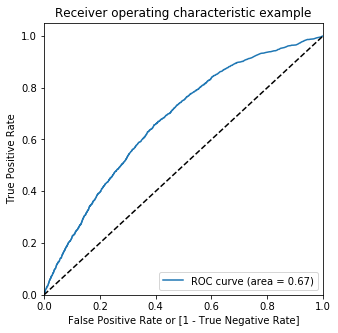

In [214]:
# using roc_cuve from the matrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Performance Tag"], y_train_pred_final.predicted, 
                                         drop_intermediate = False )
# drawing ROC curve based on the probability values generated by the model
draw_roc(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"])

In [215]:
#let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.038238,45071,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.016814,5295,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.020033,6910,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.038224,32986,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.077759,54700,0,1,0,0,0,0,0,0,0,0,0


In [216]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Performance Tag"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.041733  1.000000  0.000000
0.1   0.1  0.947655  0.034297  0.987432
0.2   0.2  0.958246  0.000000  0.999979
0.3   0.3  0.958267  0.000000  1.000000
0.4   0.4  0.958267  0.000000  1.000000
0.5   0.5  0.958267  0.000000  1.000000
0.6   0.6  0.958267  0.000000  1.000000
0.7   0.7  0.958267  0.000000  1.000000
0.8   0.8  0.958267  0.000000  1.000000
0.9   0.9  0.958267  0.000000  1.000000


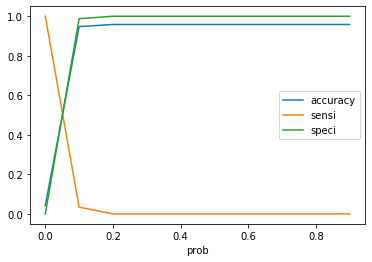

In [217]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From above graph we can conclude that optimal cutoff is 0.5

In [218]:
# let's make prediction using cut off point as 0.05 on train data set

y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.05 else 0)
y_train_pred_final.head()

,Performance Tag,probability,Application ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.038238,45071,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.016814,5295,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.020033,6910,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.038224,32986,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.077759,54700,0,1,0,0,0,0,0,0,0,0,0,1


In [219]:
# lets check confusion metrics and other important metrics
classification_metrics(y_train_pred_final["Performance Tag"], y_train_pred_final["final_predicted"] )
print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[32341 14524]
 [  916  1125]]

Accuracy:0.684
Recall/Sensitivity: 0.5512003919647231
Precision: 0.07188957760879289
Specificity:0.69
AUC: 0.6724847183469693


Observatiosn:
1. Model built above with the identified cutoff probability has improved the Accuracy as well as the Sensitivity. 
2. Recall is better than that of the LR model built on the demographic dataset.

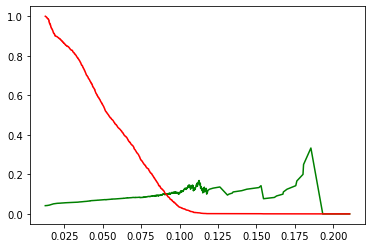

In [220]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Performance Tag"], y_train_pred_final.probability)
# precision and recall trade off plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on test data set

In [221]:
# adding constant to the test dataset
X_test_sm = sm.add_constant(X_test[col])

# making prediction probabilities
y_test_pred = res.predict(X_test_sm)
# checking values
y_test_pred[:10]

37031    0.054293
58016    0.082934
5851     0.014526
5330     0.015155
35397    0.034967
18983    0.016276
36425    0.044734
11256    0.017311
4614     0.015735
14509    0.014306
dtype: float64

In [222]:
# Reshape to create an array
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.05429261, 0.08293404, 0.01452606, 0.01515531, 0.03496661,
       0.01627613, 0.04473416, 0.01731091, 0.01573534, 0.01430615])

In [223]:
# Creating dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application ID'] = y_test.index
y_test_pred_final.head()

,Performance Tag,probability,Application ID
0,0.0,0.054293,37031
1,0.0,0.082934,58016
2,0.0,0.014526,5851
3,0.0,0.015155,5330
4,0.0,0.034967,35397


In [224]:
# Create new column 'predicted' with 1 if probability > 0.05 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.05 else 0)

# Let's see the head
y_test_pred_final.head()

,Performance Tag,probability,Application ID,predicted
0,0.0,0.054293,37031,1
1,0.0,0.082934,58016,1
2,0.0,0.014526,5851,0
3,0.0,0.015155,5330,0
4,0.0,0.034967,35397,0


In [225]:
classification_metrics(y_test_pred_final["Performance Tag"], y_test_pred_final["predicted"] )
print("AUC:", metrics.roc_auc_score(y_test_pred_final["Performance Tag"], y_test_pred_final["probability"]))

Confusion Metrics:
 [[13814  6241]
 [  397   509]]

Accuracy:0.683
Recall/Sensitivity: 0.5618101545253863
Precision: 0.07540740740740741
Specificity:0.689
AUC: 0.6655982472042941


 Accuracy and Sensivity is almost the same on the test dataset.

### Additional predictions on rejected applicants

In [226]:
# we saved all the records with null values for perfromance tag to dataframe called rejected_master
rejected_master_woe.shape

(1425, 28)

In [227]:
rejected_master.head()

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,...,4.0,12,3,7,2,4,0.0,1309623.0,13,0
1,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,...,3.0,7,3,4,3,5,0.0,775626.0,7,0
2,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,...,2.0,7,2,4,0,3,0.0,732602.0,8,0
3,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,...,2.0,7,1,4,4,5,0.0,842057.0,8,0
4,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,...,3.0,7,2,3,3,6,0.0,786997.0,7,1


In [228]:
# Putting feature variable to X
X_test = rejected_master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_master_woe['Performance Tag']

In [229]:
# adding constant to the test dataset
X_test_sm = sm.add_constant(X_test[col])

# making prediction probabilities
y_test_pred = res.predict(X_test_sm)
# checking values
y_test_pred[:10]

0    0.009605
1    0.005742
2    0.019447
3    0.007243
4    0.003459
5    0.012233
6    0.023761
7    0.026187
8    0.012551
9    0.006408
dtype: float64

In [230]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.00960479, 0.00574229, 0.01944677, 0.00724276, 0.00345855,
       0.01223299, 0.0237607 , 0.02618681, 0.01255069, 0.00640845])

In [231]:
# Creating dataframe with the actual performance tag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Performance Tag':y_test.values, 'probability':y_test_pred})
y_test_pred_final['Application ID'] = y_test.index
y_test_pred_final.head()

,Performance Tag,probability,Application ID
0,1.0,0.009605,0
1,1.0,0.005742,1
2,1.0,0.019447,2
3,1.0,0.007243,3
4,1.0,0.003459,4


In [232]:
# Create new column 'predicted' with 1 if probability > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.probability.map(lambda x: 1 if x > 0.05 else 0)

# Let's check the head
y_test_pred_final.head()

,Performance Tag,probability,Application ID,predicted
0,1.0,0.009605,0,0
1,1.0,0.005742,1,0
2,1.0,0.019447,2,0
3,1.0,0.007243,3,0
4,1.0,0.003459,4,0


In [233]:
classification_metrics(y_test_pred_final["Performance Tag"], y_test_pred_final["predicted"] )

Confusion Metrics:
 [[   0    0]
 [1410   15]]

Accuracy:0.011
Recall/Sensitivity: 0.010526315789473684
Precision: 1.0
Specificity:nan


Model has very poor results for the rejected applicants.

## 2nd Model
## Logistic Regression - Regularized

In [234]:
# Putting feature variable to X
X = master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = master_woe['Performance Tag']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# set up cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

## using Logistic regression for class imbalance
model = LogisticRegression(class_weight='balanced',solver='liblinear')
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   47.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [235]:
#Let's take a look at the results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.128975,0.012672,0.010106,0.003307,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.733496,0.754902,0.752451,...,0.740817,0.020715,1,0.742647,0.730557,0.753827,0.743417,0.729945,0.740079,0.008946
1,0.247932,0.031819,0.005972,0.003495,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.667482,0.651961,0.651961,...,0.648692,0.017681,14,0.664828,0.645438,0.660135,0.663809,0.641151,0.655072,0.009836
2,0.268381,0.052667,0.005387,0.002721,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.696822,0.671569,0.696078,...,0.677600,0.020089,2,0.696078,0.667483,0.690141,0.682180,0.668708,0.680918,0.011367
3,0.354983,0.007621,0.005187,0.002632,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.689487,0.661765,0.691176,...,0.667309,0.021656,3,0.681985,0.663197,0.666871,0.675444,0.651562,0.667812,0.010444
4,0.445614,0.093600,0.004988,0.002524,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.679707,0.664216,0.696078,...,0.666824,0.021903,4,0.682598,0.668096,0.676056,0.688304,0.656461,0.674303,0.011178
5,0.553679,0.050842,0.006365,0.000492,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.684597,0.661765,0.686275,...,0.662900,0.021666,5,0.685049,0.663197,0.669320,0.684630,0.650337,0.670506,0.013211
6,0.742021,0.087816,0.008497,0.003641,1,l1,"{'C': 1.0, 'penalty': 'l1'}",0.679707,0.656863,0.693627,...,0.659471,0.026197,6,0.678309,0.663197,0.669933,0.679731,0.654011,0.669036,0.009602
7,0.895473,0.116891,0.007104,0.005005,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.679707,0.659314,0.688725,...,0.658490,0.025155,13,0.678309,0.662584,0.672382,0.679731,0.655236,0.669648,0.009400
8,0.721150,0.106233,0.006893,0.005010,10,l1,"{'C': 10.0, 'penalty': 'l1'}",0.679707,0.659314,0.691176,...,0.658981,0.025756,8,0.676471,0.663809,0.671157,0.680343,0.655236,0.669403,0.008997
9,1.050092,0.112945,0.005209,0.002639,10,l2,"{'C': 10.0, 'penalty': 'l2'}",0.679707,0.659314,0.693627,...,0.659471,0.026380,6,0.677083,0.663809,0.670545,0.680343,0.655236,0.669403,0.009077


In [236]:
# segerigating results for L1 and L2 regression and plotting them separately
cv_results_penalty_l1 = cv_results.loc[cv_results['param_penalty']=='l1']
cv_results_penalty_l2 = cv_results.loc[cv_results['param_penalty']=='l2']

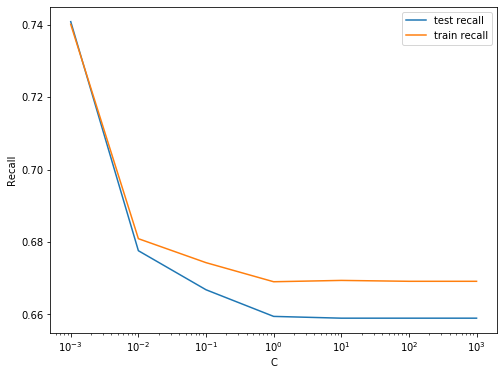

In [237]:
# Let's first plot the results for Logistic regression with L1 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_test_score'])
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

 - Training and Test recall decreases as the value of C indreases

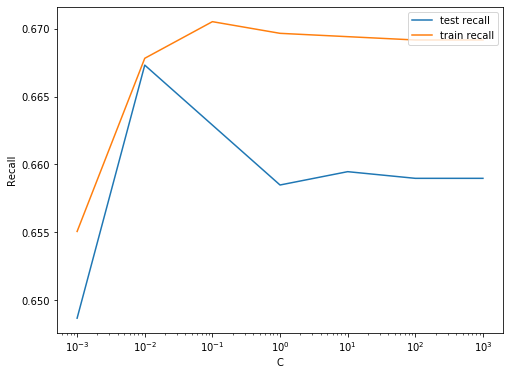

In [238]:
# plotting results for Logistic regression with L2 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_test_score'])
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

Training and test recall increases as the value of C increases

In [239]:
# checking best score
best_score = model_cv.best_score_
best_param = model_cv.best_params_

print(" The highest test recall is {0} at {1}".format(best_score, best_param))

 The highest test recall is 0.740816913562491 at {'C': 0.001, 'penalty': 'l1'}


In [240]:
# lets create model with the best parameter

model=LogisticRegression(C=0.001,penalty="l1",class_weight='balanced', solver='liblinear')
model.fit(X_train,y_train)

# predictions on training data
y_train_pred = model.predict(X_train)

In [241]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model built
# training dataset
classification_metrics(y_train, y_train_pred )
# print("AUC:", metrics.roc_auc_score(y_train_pred_final["Performance Tag"], y_train_pred_final["probability"]))

Confusion Metrics:
 [[24337 22528]
 [  554  1487]]

Accuracy:0.528
Recall/Sensitivity: 0.7285644292013719
Precision: 0.06191963356235686
Specificity:0.519


We have got decent sensitivity on the training dataset from the model built above.

In [242]:
# predictions on test dataset
y_test_pred = model.predict(X_test)

In [243]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model
classification_metrics(y_test, y_test_pred )

Confusion Metrics:
 [[10337  9718]
 [  235   671]]

Accuracy:0.525
Recall/Sensitivity: 0.7406181015452539
Precision: 0.06458754451824045
Specificity:0.515


Accuracy and sensitivity is almost the same on the test dataset.

In [244]:
# lasso model parameters
model_parameters =list(model.coef_[0])
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
list(zip(cols, model_parameters))

[('Age', 0.0),
 ('Gender', 0.0),
 ('Marital Status', 0.0),
 ('No of dependents', 0.0),
 ('Income', 0.0),
 ('Education', 0.0),
 ('Profession', 0.0),
 ('Type of residence', 0.0),
 ('No of months in current residence', 0.004),
 ('No of months in current company', 0.0),
 ('No of times 90 DPD or worse in last 6 months', 0.0),
 ('No of times 60 DPD or worse in last 6 months', 0.0),
 ('No of times 30 DPD or worse in last 6 months', -0.308),
 ('No of times 90 DPD or worse in last 12 months', 0.0),
 ('No of times 60 DPD or worse in last 12 months', 0.0),
 ('No of times 30 DPD or worse in last 12 months', 0.0),
 ('Avgas CC Utilization in last 12 months', 0.0),
 ('No of trades opened in last 6 months', 0.0),
 ('No of trades opened in last 12 months', 0.0),
 ('No of PL trades opened in last 6 months', 0.0),
 ('No of PL trades opened in last 12 months', -0.534),
 ('No of Inquiries in last 6 months (excluding home & auto loans)', -0.056),
 ('No of Inquiries in last 12 months (excluding home & auto l

### Prediction on Additional data (rejected applications)

In [245]:
# let's check the rejected dataset
rejected_master_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,-0.027258,0.010147,-0.023327,-0.040085,-0.337170,-0.017314,0.028409,0.004454,-0.421595,-0.161652,...,-0.524277,12,-0.423615,-0.157721,-0.216097,4,-0.071778,-0.039272,-0.566631,-0.011985
1,0.073437,-0.032174,0.004092,0.025204,-0.117647,-0.007949,-0.091424,0.004454,-0.032002,0.016569,...,-0.435124,7,-0.423615,-0.500075,-0.554789,5,-0.071778,-0.449431,-0.394043,-0.011985
2,0.021035,0.010147,0.004092,-0.053955,-0.337170,0.017931,-0.091424,0.004454,0.148090,0.016569,...,-0.232861,7,-0.438436,-0.500075,0.718230,3,-0.071778,-0.449431,-0.394043,-0.011985
3,-0.068679,0.010147,0.004092,-0.053955,-0.089365,-0.007949,0.028409,0.004454,0.148090,0.083311,...,-0.232861,7,-0.199362,-0.500075,-0.428636,5,-0.071778,-0.449431,-0.394043,-0.011985
4,0.021035,-0.032174,0.004092,0.025204,-0.089365,0.029512,0.028409,0.004454,0.148090,0.083311,...,-0.435124,7,-0.438436,-0.412296,-0.554789,6,-0.071778,-0.449431,-0.394043,0.138368


In [246]:
# Putting feature variable to X
X_test = rejected_master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_master_woe['Performance Tag']

In [247]:
y_test_pred = model.predict(X_test)

In [248]:
# lets check the confusion metrics, accuracy, sensitivity, specificity, precision and recall of the model
classification_metrics(y_test, y_test_pred )

Confusion Metrics:
 [[   0    0]
 [   6 1419]]

Accuracy:0.996
Recall/Sensitivity: 0.9957894736842106
Precision: 1.0
Specificity:nan


Overall we this is the best model so far, with very good accuracy and recall on all the datasets,

### 3rd Model

## Decision Tree Model

In [249]:
#Importing the required librarys
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [250]:
# Assigning feature variable to X
X = master_woe.drop(['Performance Tag'],axis=1)

# Assigning response variable to y
y = master_woe['Performance Tag']

# Splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [251]:
# let's create a decision tree with default hyper parameters.
dt_model = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [252]:
# Let's take a look at the evaluation metrics of this model

# predictions on the training dataset
y_train_pred= dt_model.predict(X_train)

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.58      0.73     46865
         1.0       0.07      0.70      0.12      2041

    accuracy                           0.59     48906
   macro avg       0.52      0.64      0.43     48906
weighted avg       0.94      0.59      0.70     48906



In [253]:
# Confusion metrics on training dataset
classification_metrics(y_train, y_train_pred)

Confusion Metrics:
 [[27264 19601]
 [  620  1421]]

Accuracy:0.587
Recall/Sensitivity: 0.6962273395394415
Precision: 0.0675958519646085
Specificity:0.582


In [254]:
# predictions on the test dataset
y_test_pred= dt_model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.57      0.72     20055
         1.0       0.07      0.69      0.12       906

    accuracy                           0.58     20961
   macro avg       0.52      0.63      0.42     20961
weighted avg       0.94      0.58      0.70     20961



In [255]:
# performance metrics on training dataset
classification_metrics(y_test, y_test_pred)

Confusion Metrics:
 [[11530  8525]
 [  279   627]]

Accuracy:0.58
Recall/Sensitivity: 0.6920529801324503
Precision: 0.06850961538461539
Specificity:0.575


In [256]:
# Putting features
features = list(X_train.columns)
features

['Age',
 'Gender',
 'Marital Status',
 'No of dependents',
 'Income',
 'Education',
 'Profession',
 'Type of residence',
 'No of months in current residence',
 'No of months in current company',
 'No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 30 DPD or worse in last 12 months',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 6 months',
 'No of trades opened in last 12 months',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Presence of open home loan',
 'Outstanding Balance',
 'Total No of Trades',
 'Presence of open auto loan']

### Hyperparameter Tuning

In [257]:
# Tuning the Max Depth parameter

n_folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", 
                               random_state = 101)

# fit the tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   43.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=101,
                                              splitter='best'),
            

In [258]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040311,0.001021,0.006767,0.000743,1,{'max_depth': 1},0.853448,0.821990,0.848101,0.851117,...,0.844704,0.011510,1,0.842739,0.850512,0.844471,0.843712,0.844282,0.845143,0.002751
1,0.051687,0.004502,0.008112,0.003776,2,{'max_depth': 2},0.506466,0.821990,0.848101,0.851117,...,0.775308,0.134842,2,0.511731,0.850512,0.844471,0.843712,0.844282,0.778942,0.133628
2,0.074140,0.003032,0.006402,0.000499,3,{'max_depth': 3},0.646552,0.575916,0.625316,0.560794,...,0.598088,0.032360,7,0.679138,0.590717,0.605103,0.594628,0.598540,0.613625,0.033099
3,0.081051,0.001918,0.004983,0.002521,4,{'max_depth': 4},0.646552,0.583770,0.706329,0.687345,...,0.652759,0.042502,4,0.679772,0.605787,0.712029,0.706960,0.678224,0.676554,0.037958
4,0.101715,0.002499,0.007177,0.000979,5,{'max_depth': 5},0.674569,0.751309,0.696203,0.593052,...,0.674513,0.051567,3,0.717185,0.823388,0.704739,0.628816,0.697080,0.714241,0.062616


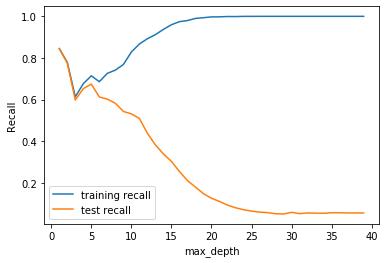

In [259]:
# plotting the accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

Here as we can see that by increasing the value of max_depth, both training and test score increase till about max-depth = 6, after which the test score gradually reduces.

In [260]:
# Now Tuning min_samples_leaf

#number of folds
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}


dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [261]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.216096,0.009358,0.006983,0.000020,5,{'min_samples_leaf': 5},0.163814,0.178922,0.144608,0.181373,...,0.165606,0.013488,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.194646,0.004944,0.007179,0.000396,25,{'min_samples_leaf': 25},0.352078,0.382353,0.321078,0.370098,...,0.360612,0.022280,9,0.897059,0.898347,0.888549,0.891611,0.900796,0.895272,0.004512
2,0.179301,0.005800,0.005909,0.005758,45,{'min_samples_leaf': 45},0.471883,0.492647,0.438725,0.497549,...,0.472318,0.021501,8,0.878676,0.871402,0.864666,0.866503,0.859155,0.868081,0.006590
3,0.172679,0.007175,0.008707,0.003439,65,{'min_samples_leaf': 65},0.440098,0.551471,0.477941,0.544118,...,0.502235,0.041597,7,0.826593,0.851194,0.840784,0.833435,0.816289,0.833659,0.011916
4,0.163369,0.003873,0.006975,0.000031,85,{'min_samples_leaf': 85},0.498778,0.575980,0.512255,0.583333,...,0.535050,0.036745,6,0.802696,0.806491,0.826087,0.807103,0.798530,0.808182,0.009464


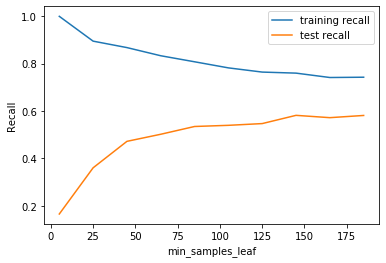

In [262]:
# plotting the accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

Here we can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

In [263]:
# Tuning Min Sample Split
#number of folds
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}


dtree = DecisionTreeClassifier(class_weight='balanced',criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [264]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.223630,0.009377,0.005390,0.002721,5,{'min_samples_split': 5},0.092910,0.075980,0.073529,0.083333,...,0.077896,0.009783,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.213450,0.005409,0.007186,0.000398,25,{'min_samples_split': 25},0.244499,0.232843,0.230392,0.254902,...,0.236645,0.011886,9,0.999387,0.996938,0.993876,0.998163,0.996326,0.996938,0.001857
2,0.203803,0.001476,0.006783,0.000399,45,{'min_samples_split': 45},0.317848,0.328431,0.321078,0.335784,...,0.323864,0.007294,8,0.975490,0.964483,0.968157,0.972443,0.972443,0.970603,0.003850
3,0.200838,0.004390,0.007184,0.000414,65,{'min_samples_split': 65},0.356968,0.382353,0.340686,0.387255,...,0.363060,0.018552,7,0.944853,0.949786,0.935701,0.946111,0.925903,0.940471,0.008634
4,0.195627,0.005371,0.006978,0.000002,85,{'min_samples_split': 85},0.376528,0.431373,0.379902,0.414216,...,0.395894,0.022651,6,0.916667,0.929577,0.915493,0.928353,0.913043,0.920627,0.006919


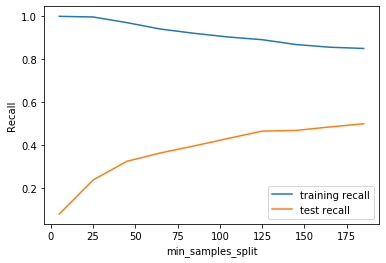

In [265]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

In [266]:
# Grid Search to Find Optimal Hyperparameters

# Create the parameter grid 
param_grid = {
    'max_depth': [4,5,6,7,8],
    'min_samples_leaf': [100,150,200],
    'min_samples_split': [100,150,200],
    'criterion': ["entropy", "gini"]
}

n_folds = 5


dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          scoring="recall", cv = n_folds,
                          return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [267]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.081585,0.002394,0.006204,0.000398,entropy,4,100,100,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.589242,...,0.628143,0.079991,52,0.640319,0.570116,0.608696,0.693815,0.698102,0.642209,0.049216
1,0.080813,0.001531,0.006780,0.000400,entropy,4,100,150,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.589242,...,0.628143,0.079991,52,0.640319,0.570116,0.608696,0.693815,0.698102,0.642209,0.049216
2,0.080290,0.001985,0.006595,0.000487,entropy,4,100,200,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.589242,...,0.628143,0.079991,52,0.640319,0.570116,0.608696,0.693815,0.698102,0.642209,0.049216
3,0.079220,0.000491,0.006186,0.000397,entropy,4,150,100,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.591687,...,0.631083,0.078737,46,0.631740,0.579914,0.617269,0.696877,0.698102,0.644780,0.046242
4,0.076451,0.005223,0.008846,0.005204,entropy,4,150,150,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.591687,...,0.631083,0.078737,46,0.631740,0.579914,0.617269,0.696877,0.698102,0.644780,0.046242


In [268]:
# printing the optimal accuracy score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.6717316266359845
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [269]:
# Now let's build the model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(class_weight='balanced',
                                  criterion='entropy', 
                                  max_depth=6, 
                                  min_samples_leaf=150,
                                  min_samples_split=100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=6, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=150,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [270]:
#Making the prediction on training dataset
y_train_pred = clf_entropy.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.64      0.77     46865
         1.0       0.07      0.65      0.13      2041

    accuracy                           0.64     48906
   macro avg       0.52      0.64      0.45     48906
weighted avg       0.94      0.64      0.75     48906



In [271]:
#Checking the performance metrics on training dataset
classification_metrics(y_train, y_train_pred)

Confusion Metrics:
 [[30005 16860]
 [  717  1324]]

Accuracy:0.641
Recall/Sensitivity: 0.6487016168544831
Precision: 0.07281126264848219
Specificity:0.64


In [272]:
#checking accuracy score
clf_entropy.score(X_test,y_test)

0.6325556986784981

In [273]:
# classification metrics
y_test_pred = clf_entropy.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.63      0.77     20055
         1.0       0.07      0.62      0.13       906

    accuracy                           0.63     20961
   macro avg       0.52      0.63      0.45     20961
weighted avg       0.93      0.63      0.74     20961



In [274]:
# performance metrics on training dataset
classification_metrics(y_test, y_test_pred)

Confusion Metrics:
 [[12695  7360]
 [  342   564]]

Accuracy:0.633
Recall/Sensitivity: 0.6225165562913907
Precision: 0.07117617364967188
Specificity:0.633


### Prediction on Additional data (rejected applications)

In [275]:
rejected_master_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,-0.027258,0.010147,-0.023327,-0.040085,-0.337170,-0.017314,0.028409,0.004454,-0.421595,-0.161652,...,-0.524277,12,-0.423615,-0.157721,-0.216097,4,-0.071778,-0.039272,-0.566631,-0.011985
1,0.073437,-0.032174,0.004092,0.025204,-0.117647,-0.007949,-0.091424,0.004454,-0.032002,0.016569,...,-0.435124,7,-0.423615,-0.500075,-0.554789,5,-0.071778,-0.449431,-0.394043,-0.011985
2,0.021035,0.010147,0.004092,-0.053955,-0.337170,0.017931,-0.091424,0.004454,0.148090,0.016569,...,-0.232861,7,-0.438436,-0.500075,0.718230,3,-0.071778,-0.449431,-0.394043,-0.011985
3,-0.068679,0.010147,0.004092,-0.053955,-0.089365,-0.007949,0.028409,0.004454,0.148090,0.083311,...,-0.232861,7,-0.199362,-0.500075,-0.428636,5,-0.071778,-0.449431,-0.394043,-0.011985
4,0.021035,-0.032174,0.004092,0.025204,-0.089365,0.029512,0.028409,0.004454,0.148090,0.083311,...,-0.435124,7,-0.438436,-0.412296,-0.554789,6,-0.071778,-0.449431,-0.394043,0.138368


In [276]:
# Putting feature variable to X
X_test = rejected_master_woe.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y_test = rejected_master_woe['Performance Tag']

In [277]:
# making predictions
y_test_pred = clf_entropy.predict(X_test)

# checking entropy
print("entropy score:",clf_entropy.score(X_test,y_test))

# performance metrics on training dataset
classification_metrics(y_test, y_test_pred)

entropy score: 0.9887719298245614
Confusion Metrics:
 [[   0    0]
 [  16 1409]]

Accuracy:0.989
Recall/Sensitivity: 0.9887719298245614
Precision: 1.0
Specificity:nan


##### Our Decision tree model has better accuracy but lesser Recall or Sensitivity than the Logistic Regression with Regularization model

# Application Score Card on WOE transformed master dataset

Build an application scorecard with the good to bad odds of 10 to 1 at a score of 400 doubling every 20 points.

•	For the rejected population, calculate the application scores and assess the results. Compare the scores of the rejected population with the approved candidates and comment on the observations.

•	On the basis of the scorecard, identify the cut-off score below which you would not grant credit cards to applicants.

Inputs given:

 -     1.target_score = 400
 -     2.target_odds = 10
 -     3.pts_double_odds = 20

Calculation as follows:

 -   factor = pts_double_odds / log10(2)
 -   offset = target_score - factor X log10(target_odds)

#### Final ScoreCard Forumula:
##### scorecard['score'] = offset - factor X scorecard['logit']

In [278]:
# woe transformed master dataset
master_woe.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,0.073437,-0.032174,0.004092,0.085222,0.239199,-0.017314,0.028409,0.004454,-0.032002,0.204217,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985
1,-0.027258,0.010147,0.004092,0.025204,0.391202,0.017931,0.013298,0.004454,-0.032002,0.083311,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,-0.071778,0.186740,0.542715,-0.011985
2,-0.027258,0.010147,-0.023327,0.085222,0.230548,-0.017314,0.013298,0.004454,0.125663,0.083311,...,0.657628,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985
3,0.021035,0.010147,0.004092,-0.040085,0.391202,-0.017314,-0.091424,0.004454,-0.049460,0.204217,...,0.479566,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,-0.340984,0.542715,0.138368
4,-0.027258,-0.032174,0.004092,-0.004391,0.239199,0.017931,0.028409,0.004454,-0.032002,0.083311,...,0.657628,0.675361,0.649212,0.893811,0.71823,0.498244,0.236658,0.822570,0.542715,-0.011985


#### Note: Our best model was the Regularized Logistic Regression on  Master dataset, we will build score card from the co-efficients from our best model

In [279]:
# Advanced logistic regression model with C=0.001 and penalty ="l1", produced the sensitivity of around 73%

scorecard_model=LogisticRegression(C=0.001,penalty="l1",class_weight='balanced', solver='liblinear')
scorecard_model.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [280]:
# let's check the model co-efficients
scorecard_model.coef_[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.14058087e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.07803495e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.26713018e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.33813744e-01, -5.64369861e-02, -6.59130581e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

Variables with 0 coefficient are not significant, rest all are important predictor variables

In [281]:
# let's put the co-efficients and the respective features in a dataframe
model_params = pd.DataFrame({'cols':X_train.columns,'coeff':scorecard_model.coef_[0]})
model_params_idx = model_params.set_index('cols')
model_params_idx

,coeff
cols,
Age,0.000000
Gender,0.000000
Marital Status,0.000000
No of dependents,0.000000
Income,0.000000
Education,0.000000
Profession,0.000000
Type of residence,0.000000
No of months in current residence,0.004141


In [282]:
# significant features
imp_params = model_params[model_params["coeff"]!=0]
imp_params

,cols,coeff
8,No of months in current residence,0.004141
12,No of times 30 DPD or worse in last 6 months,-0.307803
16,Avgas CC Utilization in last 12 months,0.000427
20,No of PL trades opened in last 12 months,-0.533814
21,No of Inquiries in last 6 months (excluding ho...,-0.056437
22,No of Inquiries in last 12 months (excluding h...,-0.000659


In [283]:
# Model intercept
intercept = scorecard_model.intercept_[0]
intercept

0.0

In [284]:
# let's build the scorecard from the co-efficients by multiplying the co-efficients of the features to their respective woe values

scorecard = master_woe[model_params_idx.index].apply(lambda x: x*model_params_idx['coeff'] ,axis=1)
scorecard.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.000133,0.0,...,0.0,0.0,0.0,-0.477129,-0.040535,-0.000328,0.0,0.0,0.0,-0.0
1,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000133,0.0,...,0.0,0.0,0.0,-0.477129,-0.040535,-0.000328,-0.0,0.0,0.0,-0.0
2,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.000520,0.0,...,0.0,0.0,0.0,-0.477129,-0.040535,-0.000328,0.0,0.0,0.0,-0.0
3,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.000205,0.0,...,0.0,0.0,0.0,-0.477129,-0.040535,-0.000328,0.0,-0.0,0.0,0.0
4,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.000133,0.0,...,0.0,0.0,0.0,-0.477129,-0.040535,-0.000328,0.0,0.0,0.0,-0.0


In [285]:
# Finding the logit Values
scorecard['logit'] = scorecard.sum(axis=1) + intercept
scorecard.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,logit
0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.000133,0.0,...,0.0,0.0,-0.477129,-0.040535,-0.000328,0.0,0.0,0.0,-0.0,-0.636900
1,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000133,0.0,...,0.0,0.0,-0.477129,-0.040535,-0.000328,-0.0,0.0,0.0,-0.0,-0.636900
2,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.000520,0.0,...,0.0,0.0,-0.477129,-0.040535,-0.000328,0.0,0.0,0.0,-0.0,-0.636247
3,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.000205,0.0,...,0.0,0.0,-0.477129,-0.040535,-0.000328,0.0,-0.0,0.0,0.0,-0.636972
4,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.000133,0.0,...,0.0,0.0,-0.477129,-0.040535,-0.000328,0.0,0.0,0.0,-0.0,-0.636900


In [286]:
# Convert Logit to Odds Ratio and Odds Ratio to Probability
scorecard['odds'] = np.exp(-scorecard['logit'])
scorecard['probs'] = scorecard['odds'] / (scorecard['odds'] + 1)

In [287]:
# finally building the scorecard as per the problem statement
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds / np.log10(2)
offset = target_score - factor * np.log10(target_odds)
print("factor =",factor)
print("offset =",offset)

# final scores
scorecard['score'] = offset - factor * scorecard['logit']
scorecard.head()

factor = 66.43856189774725
offset = 333.56143810225274


,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,logit,odds,probs,score
0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.000133,0.0,...,-0.040535,-0.000328,0.0,0.0,0.0,-0.0,-0.636900,1.890610,0.654052,375.876141
1,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000133,0.0,...,-0.040535,-0.000328,-0.0,0.0,0.0,-0.0,-0.636900,1.890610,0.654052,375.876141
2,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.000520,0.0,...,-0.040535,-0.000328,0.0,0.0,0.0,-0.0,-0.636247,1.889377,0.653905,375.832768
3,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.000205,0.0,...,-0.040535,-0.000328,0.0,-0.0,0.0,0.0,-0.636972,1.890747,0.654069,375.880944
4,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.000133,0.0,...,-0.040535,-0.000328,0.0,0.0,0.0,-0.0,-0.636900,1.890610,0.654052,375.876141


In [288]:
#Add Performance Tag
scorecard['Performance Tag'] = master_woe['Performance Tag']
scorecard.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,logit,odds,probs,score,Performance Tag
0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.000133,0.0,...,-0.000328,0.0,0.0,0.0,-0.0,-0.636900,1.890610,0.654052,375.876141,0.0
1,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000133,0.0,...,-0.000328,-0.0,0.0,0.0,-0.0,-0.636900,1.890610,0.654052,375.876141,0.0
2,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.000520,0.0,...,-0.000328,0.0,0.0,0.0,-0.0,-0.636247,1.889377,0.653905,375.832768,0.0
3,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.000205,0.0,...,-0.000328,0.0,-0.0,0.0,0.0,-0.636972,1.890747,0.654069,375.880944,0.0
4,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.000133,0.0,...,-0.000328,0.0,0.0,0.0,-0.0,-0.636900,1.890610,0.654052,375.876141,0.0


In [289]:
# Checking data values in performance tag
print(scorecard.score.min())
print(scorecard.score.max())
print(scorecard.score.mean())
print(scorecard.score.median())

259.6221497172752
376.0185285432818
341.13557560462687
335.0066200067628


In [290]:
# Checking data for the approved cases
print(scorecard[scorecard["Performance Tag"] == 0].score.min())
print(scorecard[scorecard["Performance Tag"] == 0].score.max())
print(scorecard[scorecard["Performance Tag"] == 0].score.mean())
print(scorecard[scorecard["Performance Tag"] == 0].score.median())

259.6221497172752
376.0185285432818
341.83023737136466
335.28571895112884


In [291]:
# Checking data for the defaulters
print(scorecard[scorecard["Performance Tag"] == 1].score.min())
print(scorecard[scorecard["Performance Tag"] == 1].score.max())
print(scorecard[scorecard["Performance Tag"] == 1].score.mean())
print(scorecard[scorecard["Performance Tag"] == 1].score.median())

259.6221497172752
375.983315630956
325.36130840747916
322.8876456143975


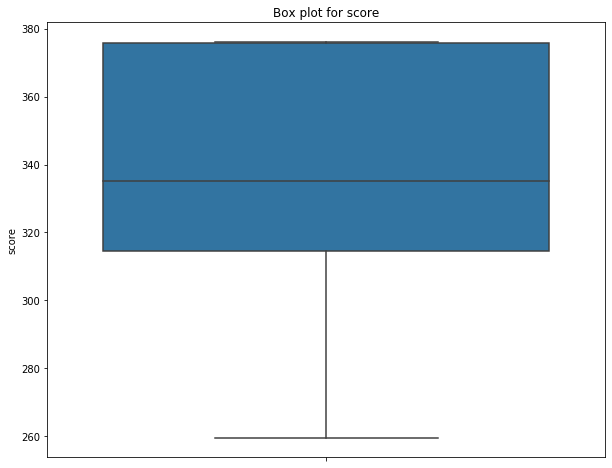

In [292]:
# Box plot for the score card for the whole dataset
plt.figure(figsize=(10,8))
    
plt.title('Box plot for score')
sns.boxplot(y='score', data=scorecard)

No outliers detected in the above graph, scorecard seems to be in good shape

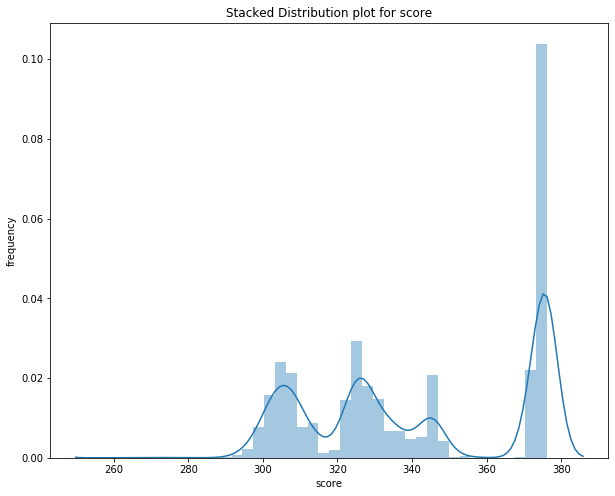

In [293]:
#Stack plot for the whole dataset
plt.figure(figsize=(10,8))
plt.title('Stacked Distribution plot for score')
sns.distplot(scorecard['score'])
plt.ylabel('frequency')
plt.show()

Majority of the customers falls in the range of 290 to 350

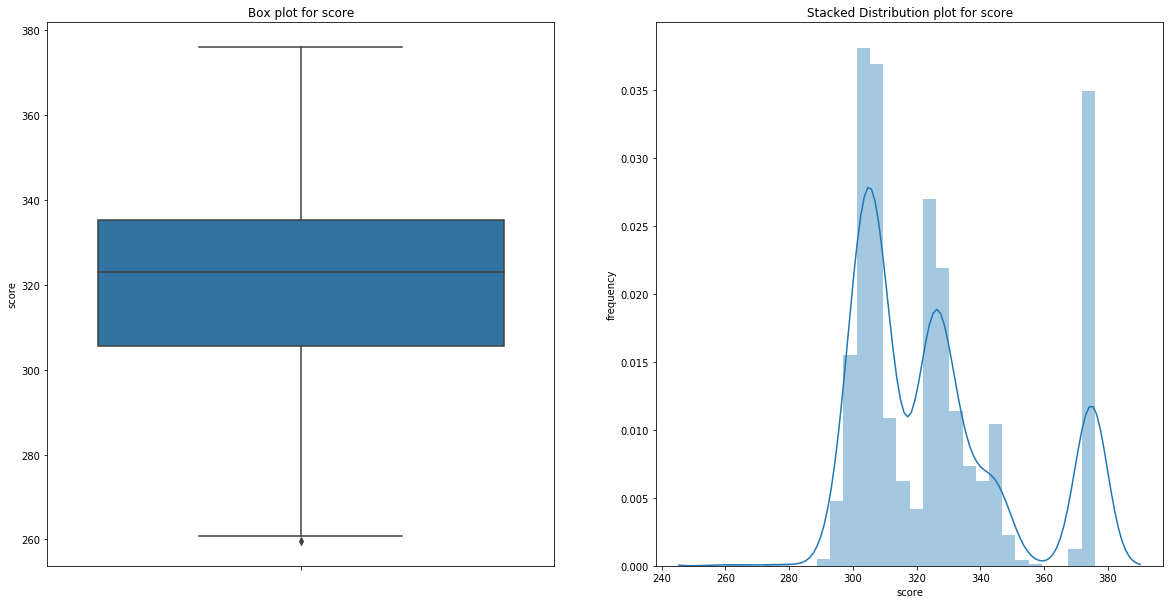

In [294]:
#Plotting the graph for dafault cases
plt.figure(figsize=(20,10))

scorecard_default = scorecard[scorecard["Performance Tag"] == 1]

plt.subplot(1, 2, 1)
plt.title('Box plot for score')
sns.boxplot(y='score', data=scorecard_default)

plt.subplot(1, 2, 2)
plt.title('Stacked Distribution plot for score')
sns.distplot(scorecard_default['score'])
plt.ylabel('frequency')
plt.show()

Above graph shows that majority of the defaulters have score cards randing from from 290 to 350.

Text(0, 0.5, 'Odds(Goods vs Bad)')

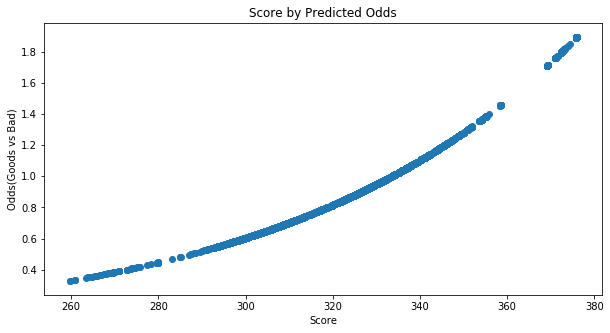

In [295]:
#Ploting the Scores Against Predicted Odds (Exponential Relationship)
plt.figure(figsize=(10,5))

plt.scatter(x='score',
            y='odds',
            data=scorecard)

plt.title('Score by Predicted Odds')
plt.xlabel('Score')
plt.ylabel('Odds(Goods vs Bad)')

Text(0, 0.5, 'Probability (Good)')

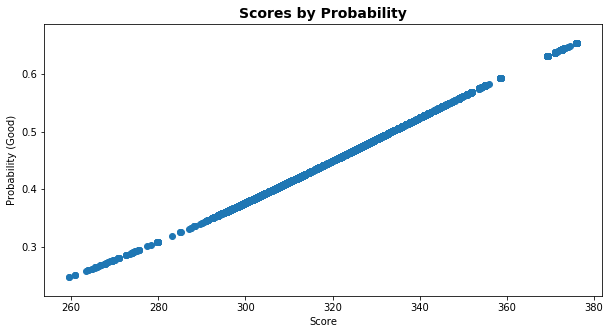

In [296]:
# Plot Scores Against Probabilities
plt.figure(figsize=(10,5))

plt.scatter(x='score',
            y='probs',
            data=scorecard)

plt.title('Scores by Probability', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Probability (Good)')

# Scorecard for rejected applicants

In [297]:
#Now let's build the scorecard from the co-efficients by multiplying the co-efficients of the features to their respective woe values

scorecard_rejected = rejected_master_woe[model_params_idx.index].apply(lambda x: x*model_params_idx['coeff'] ,axis=1)
scorecard_rejected.head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.001746,-0.0,...,-0.0,0.0,-0.0,0.084194,0.012196,-0.002637,-0.0,-0.0,-0.0,-0.0
1,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.000133,0.0,...,-0.0,0.0,-0.0,0.266947,0.031311,-0.003296,-0.0,-0.0,-0.0,-0.0
2,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.000613,0.0,...,-0.0,0.0,-0.0,0.266947,-0.040535,-0.001977,-0.0,-0.0,-0.0,-0.0
3,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.000613,0.0,...,-0.0,0.0,-0.0,0.266947,0.024191,-0.003296,-0.0,-0.0,-0.0,-0.0
4,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.000613,0.0,...,-0.0,0.0,-0.0,0.220089,0.031311,-0.003955,-0.0,-0.0,-0.0,0.0


In [298]:
#Finding Logit Values
scorecard_rejected['logit'] = scorecard_rejected[list(scorecard_rejected.columns)].sum(axis=1) + intercept

In [299]:
# Converting Logit to Odds Ratio and Odds Ratio to Probability
scorecard_rejected['odds'] = np.exp(-scorecard_rejected['logit'])
scorecard_rejected['probs'] = scorecard_rejected['odds'] / (scorecard_rejected['odds'] + 1)

In [300]:
#Scores
scorecard_rejected['score'] = offset - (factor * scorecard_rejected['logit'])

In [301]:
#Adding Performance_Tag
scorecard_rejected['Performance Tag'] = rejected_master_woe['Performance Tag']
scorecard_rejected.head()


,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,logit,odds,probs,score,Performance Tag
0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.001746,-0.0,...,-0.002637,-0.0,-0.0,-0.0,-0.0,0.297079,0.742986,0.426272,313.823960,1.0
1,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.000133,0.0,...,-0.003296,-0.0,-0.0,-0.0,-0.0,0.437706,0.645515,0.392288,304.480867,1.0
2,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.000613,0.0,...,-0.001977,-0.0,-0.0,-0.0,-0.0,0.546817,0.578789,0.366603,297.231694,1.0
3,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.000613,0.0,...,-0.003296,-0.0,-0.0,-0.0,-0.0,0.581178,0.559239,0.358662,294.948810,1.0
4,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.000613,0.0,...,-0.003955,-0.0,-0.0,-0.0,0.0,0.540773,0.582298,0.368008,297.633286,1.0


In [302]:
# checking distribution of scores
print(scorecard_rejected.score.min())
print(scorecard_rejected.score.max())
print(scorecard_rejected.score.mean())
print(scorecard_rejected.score.median())

262.2942455963325
354.44102526267335
303.0535262562701
302.26697630124914


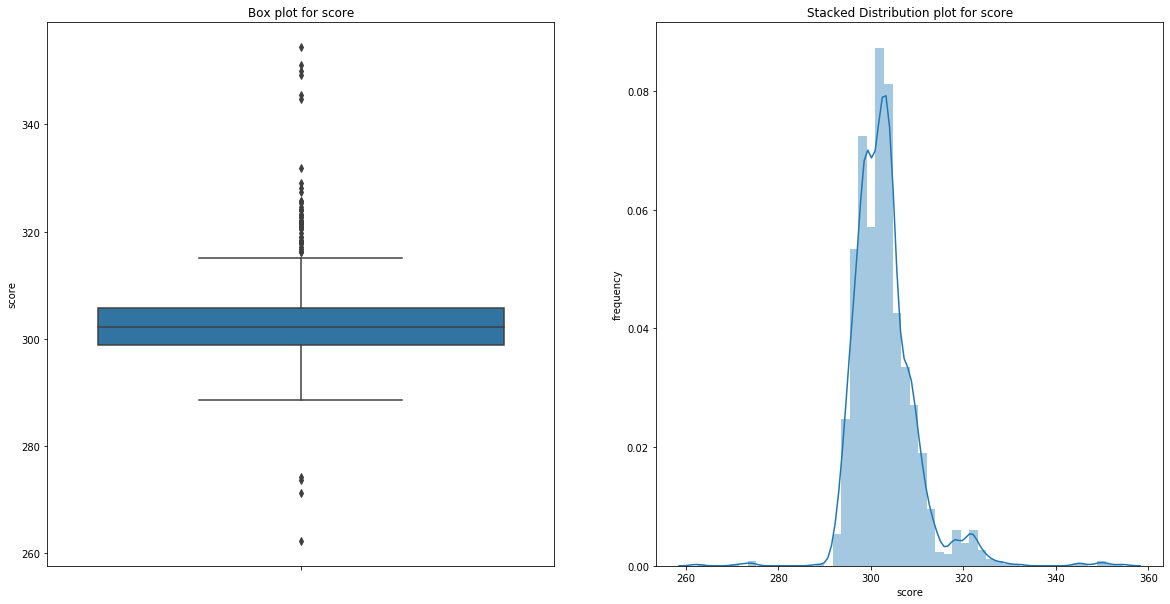

In [303]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.title('Box plot for score')
sns.boxplot(y='score', data=scorecard_rejected)
    
plt.subplot(1, 2, 2)
plt.title('Stacked Distribution plot for score')
sns.distplot(scorecard_rejected['score'])
plt.ylabel('frequency')
plt.show()

Most of the rejected applicants had score card in a range of 295 to 335

In [304]:
# let's keep the cutoff as 310
(len(scorecard_rejected[scorecard_rejected['score'] < 310])/len(scorecard_rejected))*100

89.05263157894737

If cutoff is kept at 310, almost 89% of the defaulters would not get the credit card because only 11% of the applicants have score of more than 310

In [305]:
# lets check the side effect of this cutoff by analysing the approved customers from the master scorecard
(len(scorecard[((scorecard['score'] < 310) & (scorecard["Performance Tag"] == 0))])/len(scorecard[scorecard["Performance Tag"]==0]))*100

21.034070531978482

Cut off of 310 impacts 21% of the approved customers because 21% of the customers who were granted credit card have score of less than 310.

## The recommended cut off point : 310 


### Points to consider
 
 - Customers with a score much less than 310 would no longer be granted credit score card.
 - Cutoff of 310 successfully identifies almost 89% of the bad customers.
 - If we keep in mind the scorecard built for the master dataset (Demographic & Credit Bureau), then nearly 21% of the good customers are not going to get the credit card.
 - If we reduce the cutoff from 310 to a lower number then it will impact the cause of doing this exercise of figuring out the bad cusomers.

# Financial Benefits of the ML model (Regularised Logistic Regression)

As previously mentioned in the problem statement, in the past few years CredX experienced an increase in credit loss. 
So, the primary objective of doing this complete exercise was to mitigate this credit risk by means of acquiring the proper customers.

Another essential factor is, Bank does now not best loose money by giving credit score card to the bad customers, it may additionally loose business(finally money) by means of now not giving credit cart to the good customers. So, the Machine Learning model have to have strong predictive power to discriminate between good and the bad customers. Model needs to be capable to correctly identify majority of the bad customers and simultaneously it must additionally make sure that good customers aren't denied the credit card

An ideal model will have the following benefits:

    1.It should eradicate the manual efforts of assessing each and every application as the ML model can process multiple applications in no time.
    2.It will help in preventing the manual error as the entire process is automated.
    3.There will be no means of taking bribes or doing favouritisim to approve an application, also the model would not be biased towards any cast,religion etc. 

#### Let's look for our data summary

Total number of Customers = 71292 (remember we removed three duplicate reports)

Approved Customers = 69867 (there were 1425 records with null values for performance tag, 71292-1425 = 69867)

Default Customers = 2947 (Customers with Performance Tag 1)

#### Let's make some assumptions in order to calculate the actual profit and the actual loss :

1) Customer Acquisition Cost (including paper work, phone calls cost, service tax etc.) = 50 USD 
2) Credit Card Limit = 49,950 USD (taking odd number so that the money at risk is a round figure) 
3) Money at Risk per customer = 49,950 + 50 = 50,000 USD

Total Money at Risk (For defaulted customers) = 50,000 × 2947 = 14,73,50,000‬ USD

Profit by using the Machine Model can save:
The best Model we built has a recall of 74%, hence it can save 74% of 14,73,50,000‬ USD:

#### Money Saved = (14,73,50,000‬ * 74)/100 = 10,90,39,000‬ USD
#### Money Lost = 14,73,50,000‬ USD - 10,90,39,000‬ USD = 3,83,11,000 USD

#### Model built is saving almost 35% of the Loss.